# Credit Card Fraud Detection

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)
# pd.pandas.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.772925e-15  9.289524e-16 -1.803266e-15  1.674888e-15  1.475621e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.501098e-15  1.392460e-15 -7.466538e-16  4.258754e-16  9.019919e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.126845e-16  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()/len(df.Class)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### Conclusion:
- Total 28 Features are present in the dataset.
- Target variable is class
- No null value is presesnt in the dataset.
- An Imbalanced dataset. 

## Exploratory Data Analysis
##### Let's visualize target column.

In [8]:
df.Class.unique()

array([0, 1], dtype=int64)

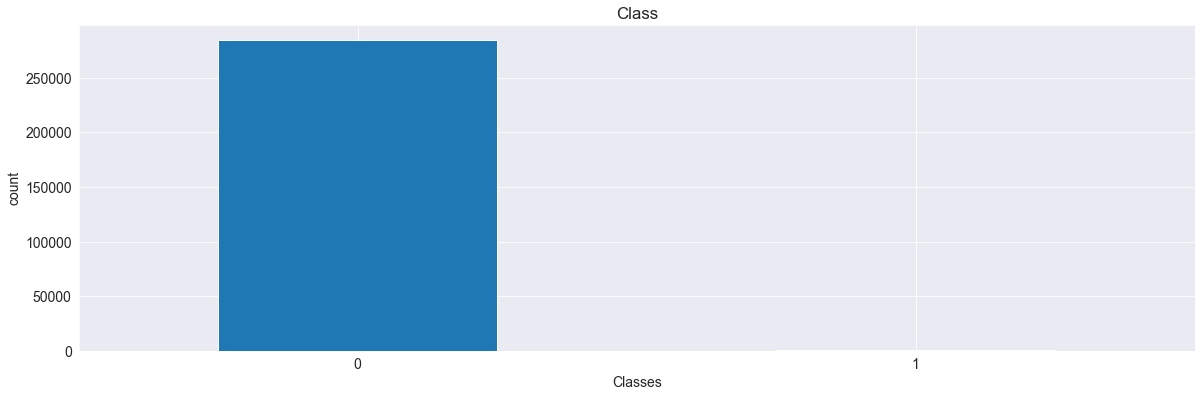

In [9]:
df.Class.value_counts().plot.bar()
plt.title('Class')
plt.xticks([0,1],rotation=0)
plt.xlabel('Classes')
plt.ylabel('count')
plt.show()

We can see that, the dataset is imbalance.

## Numerical features

In [10]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
continuous_feature = df.drop('Class', axis=1)

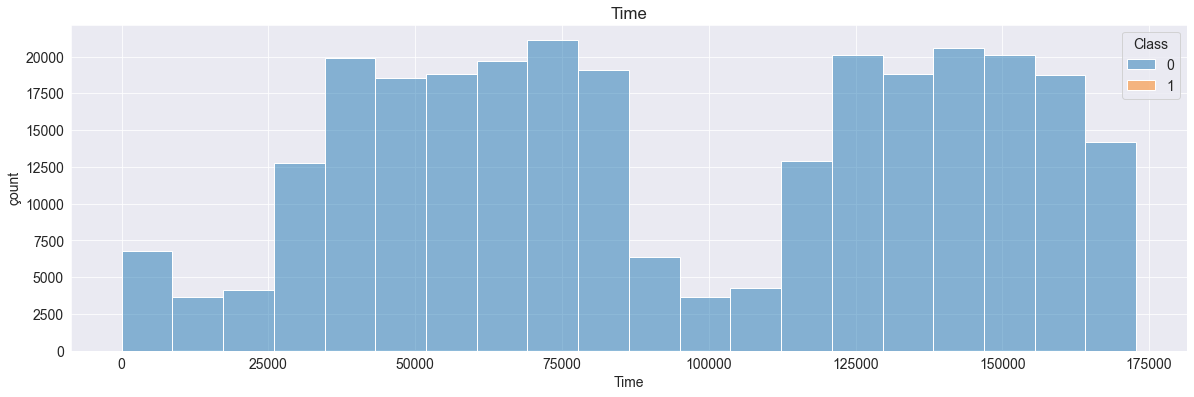

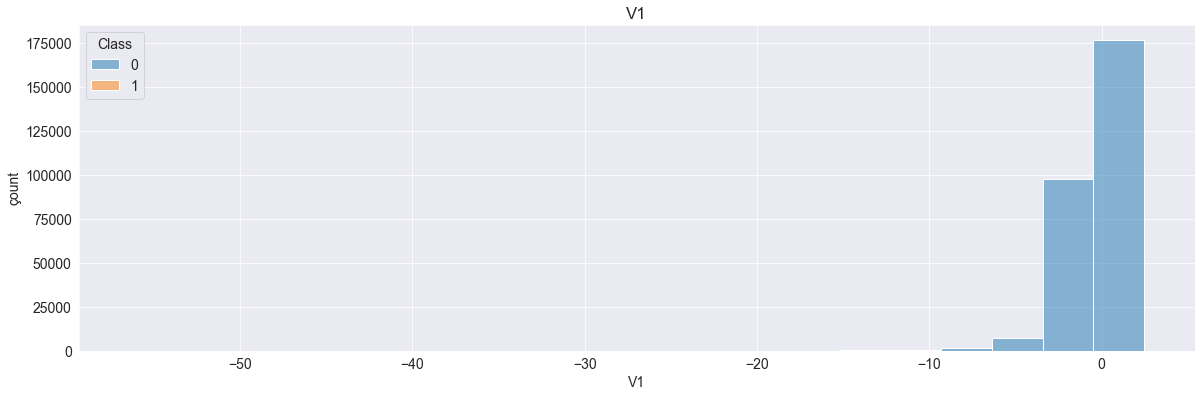

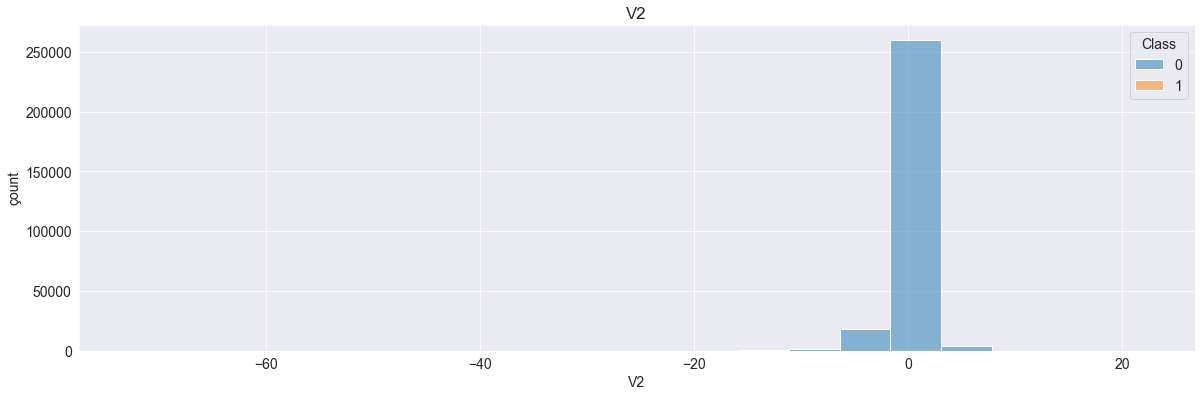

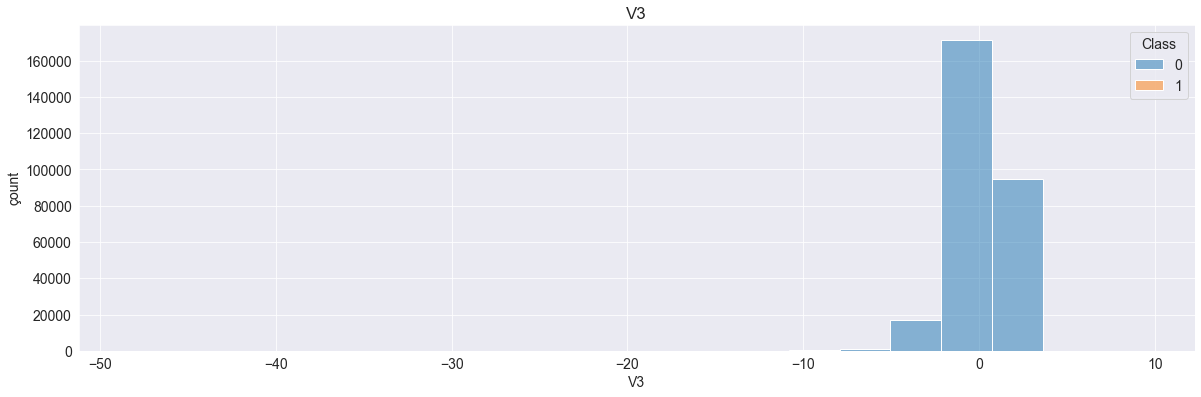

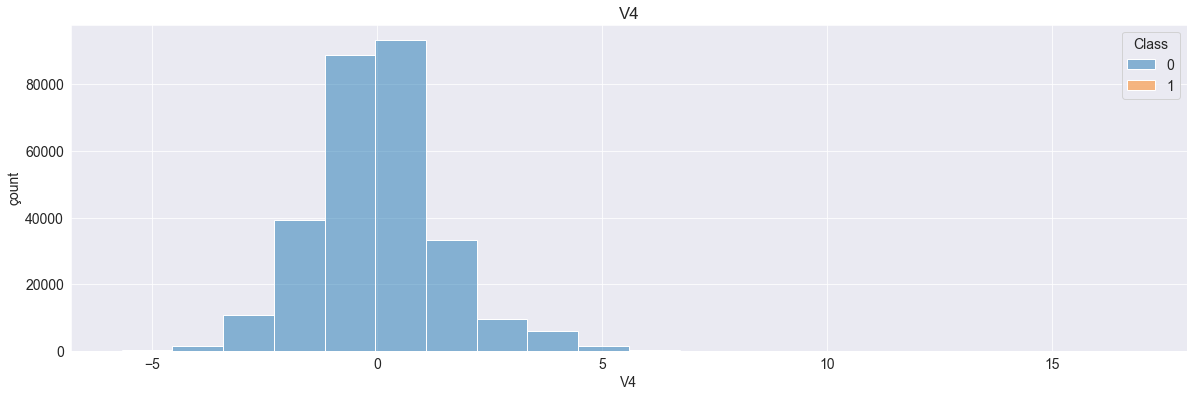

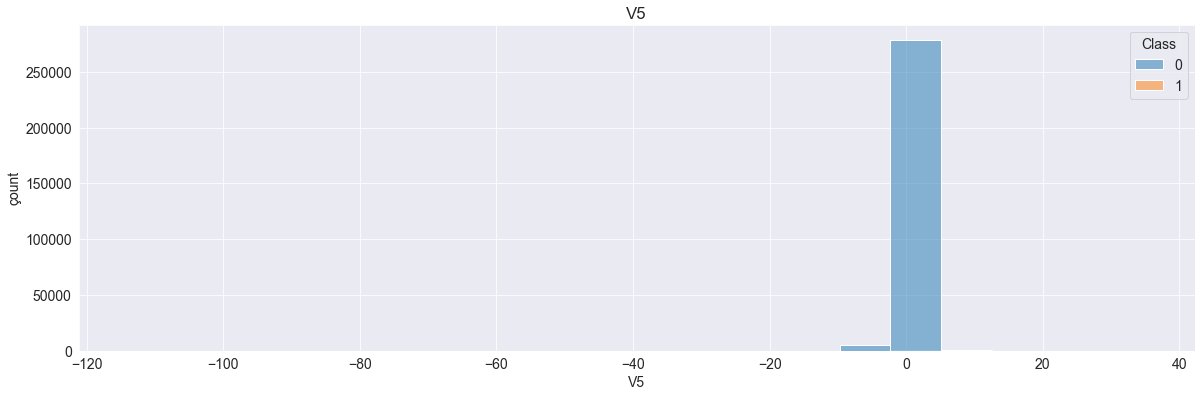

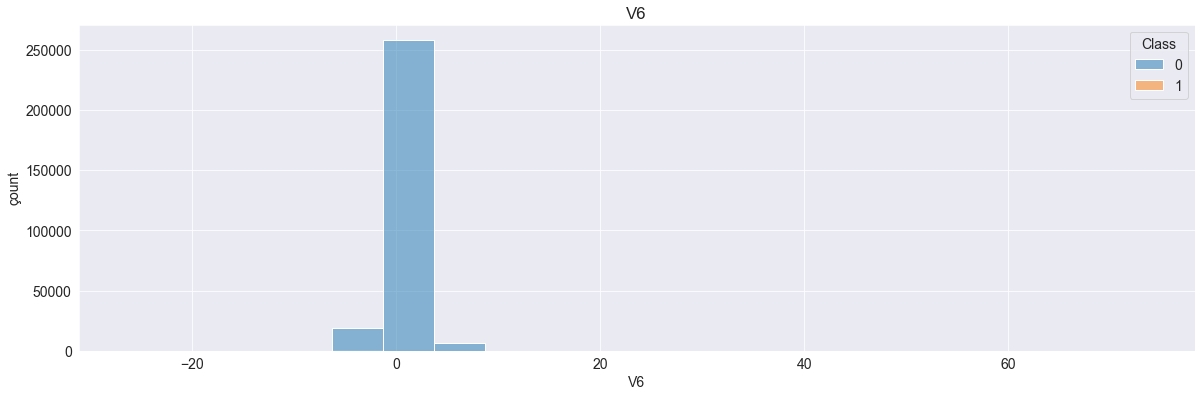

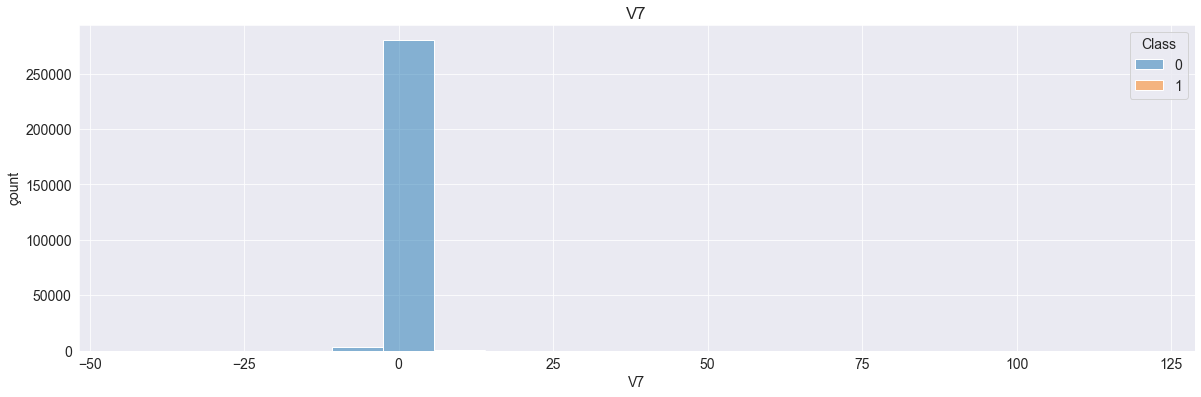

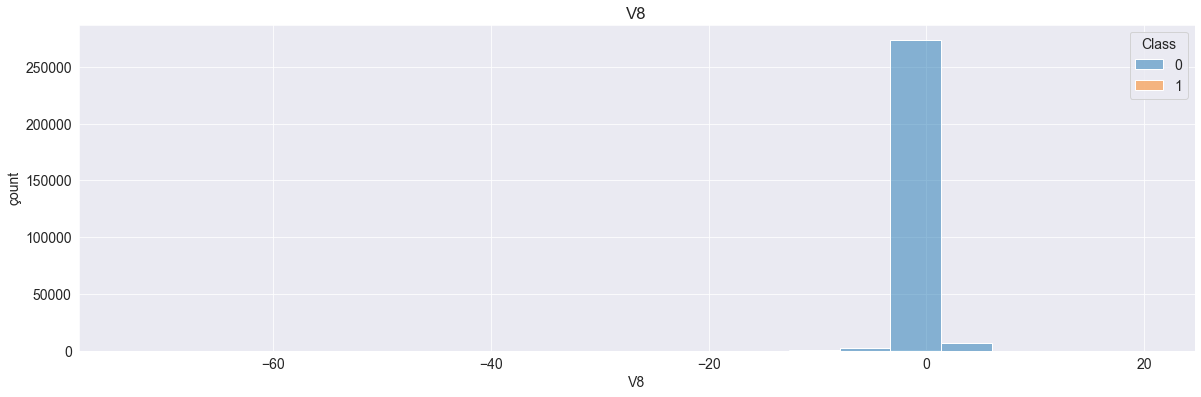

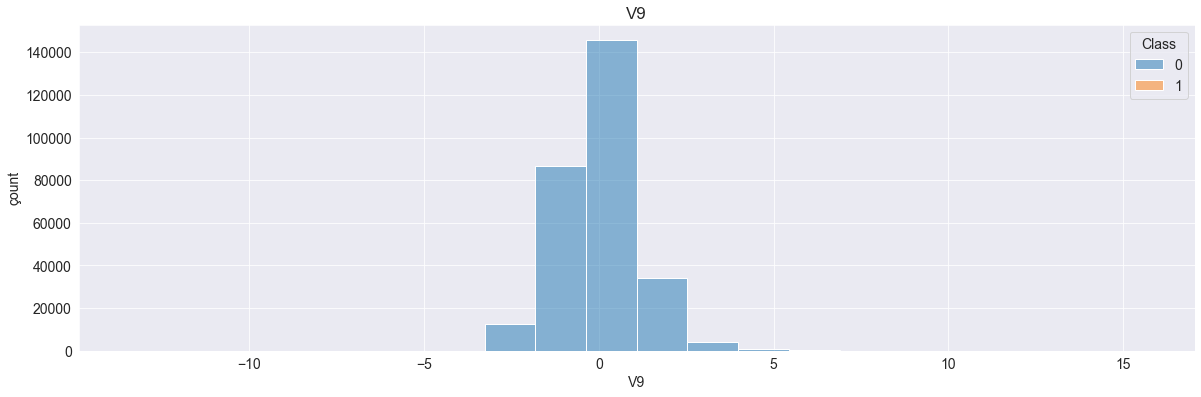

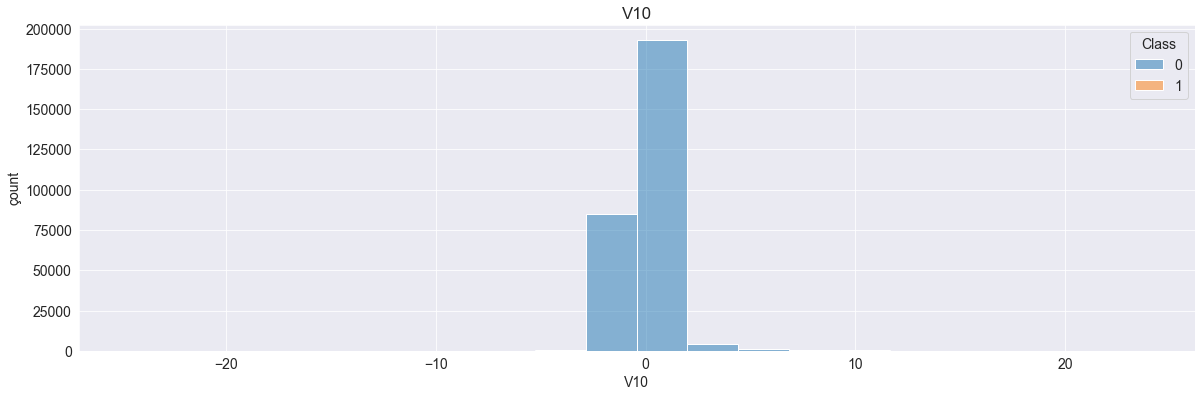

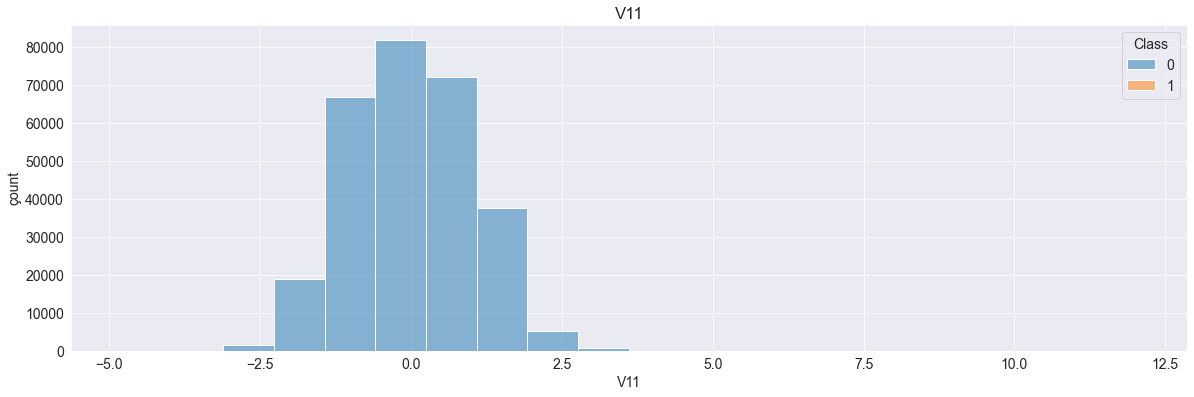

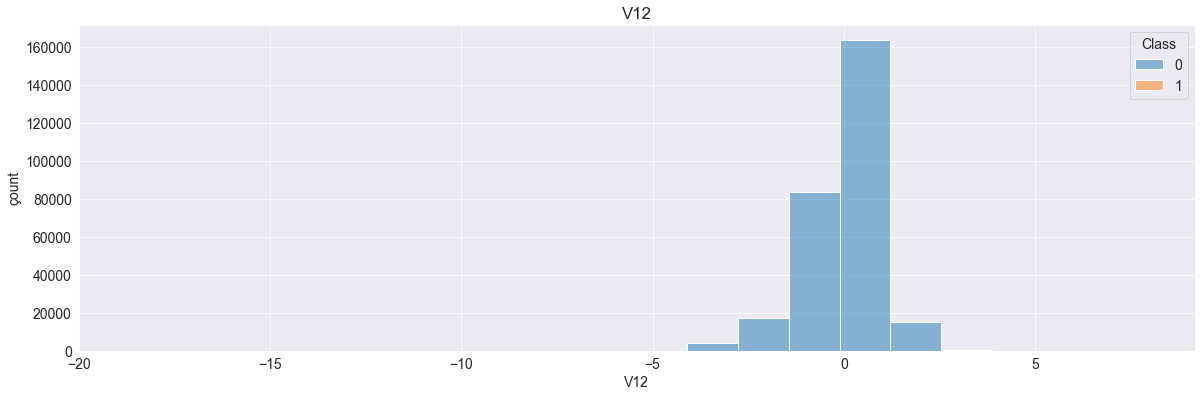

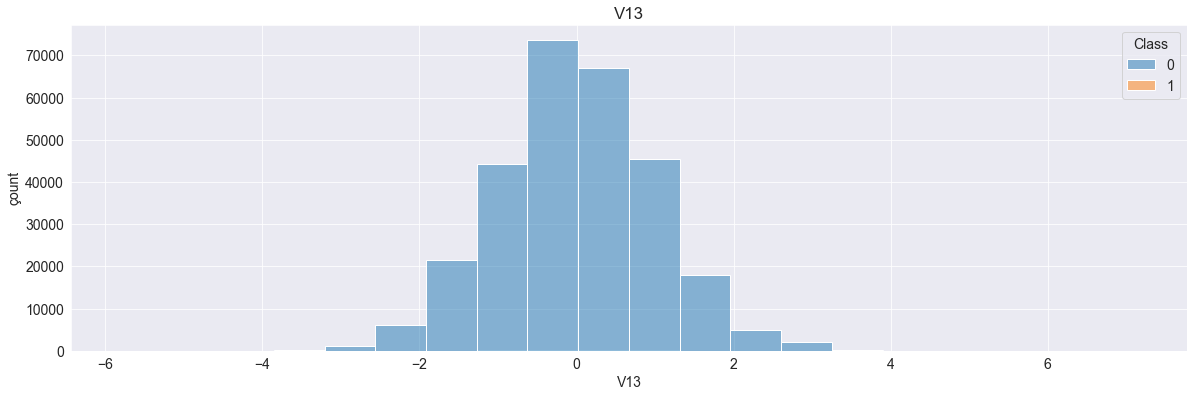

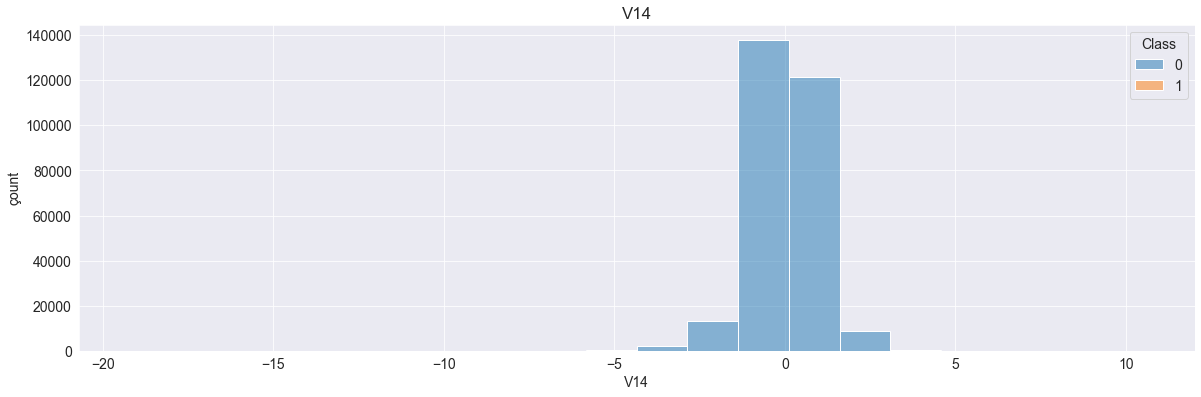

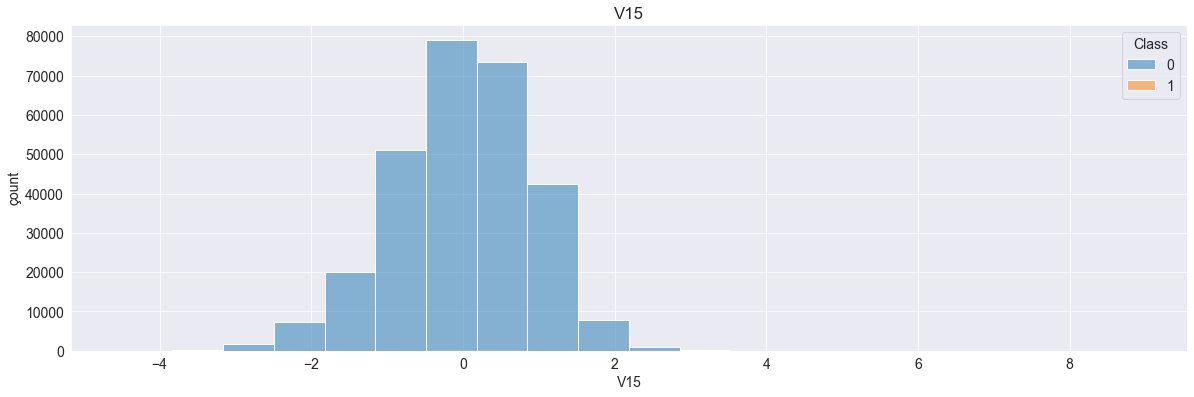

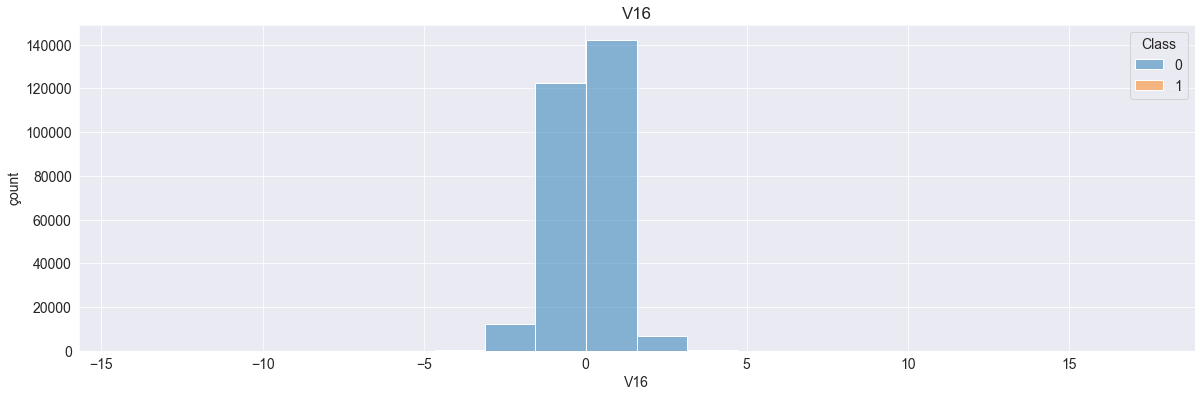

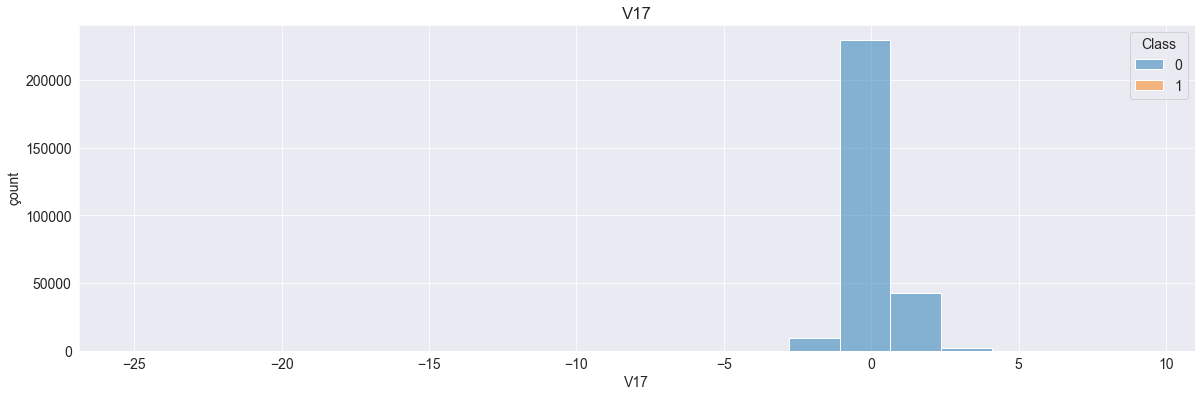

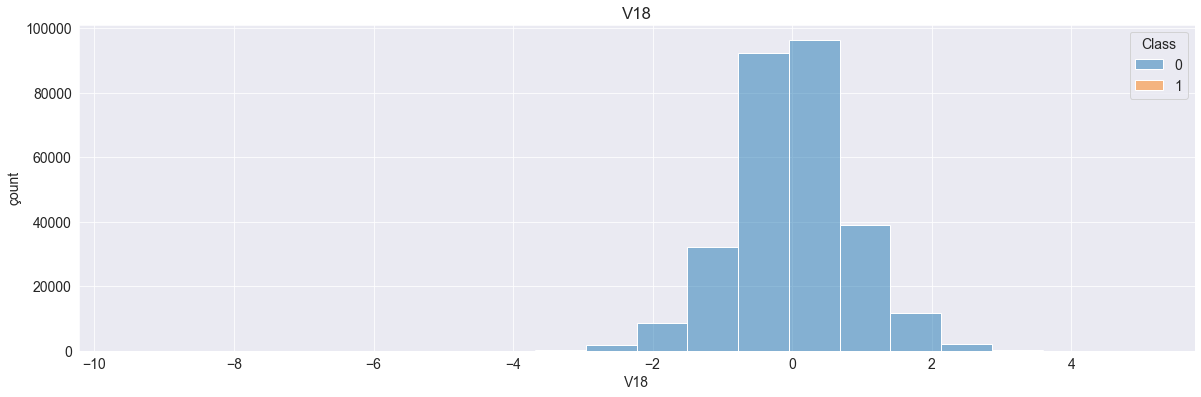

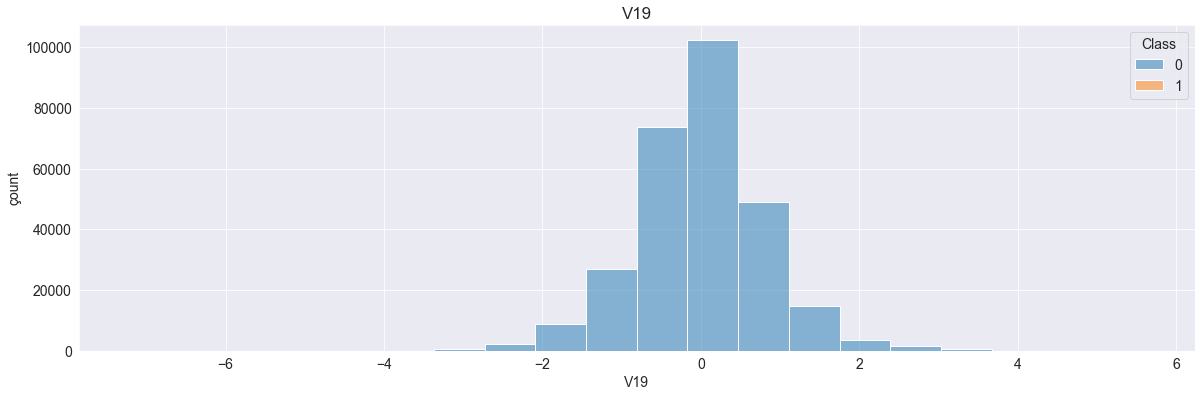

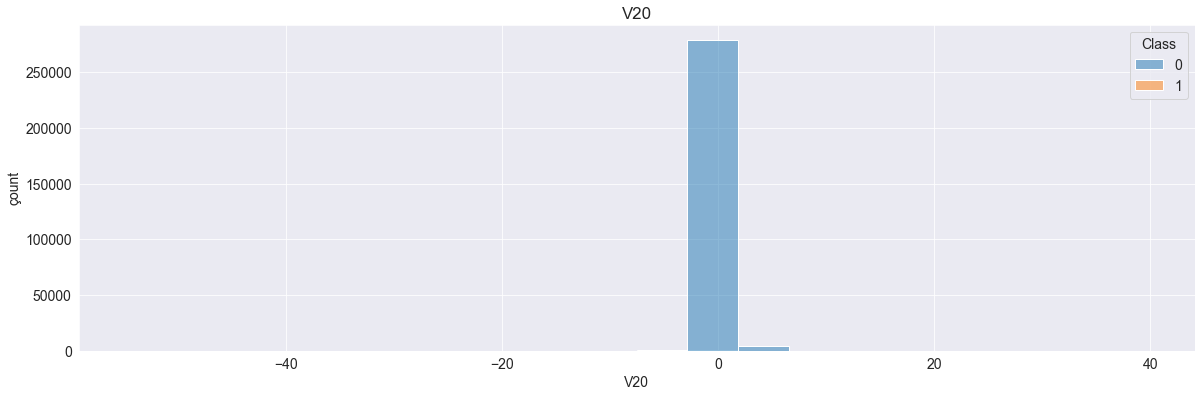

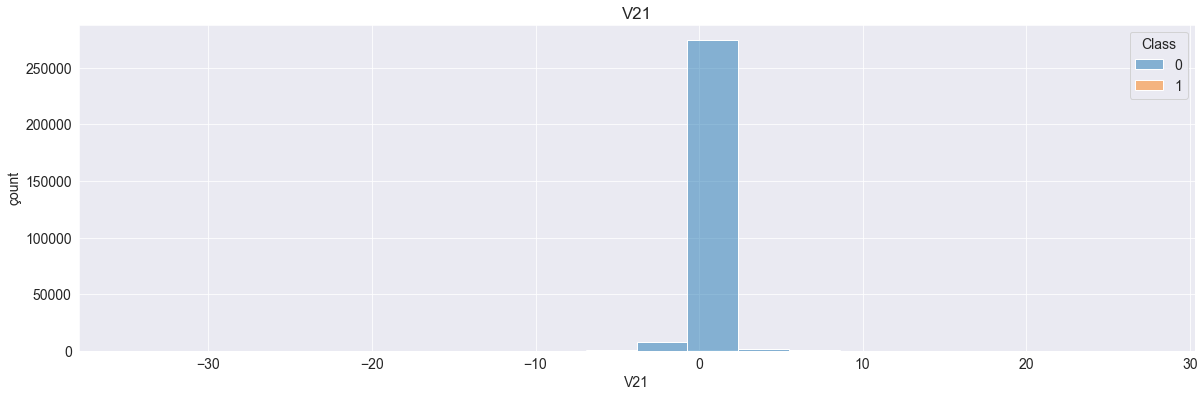

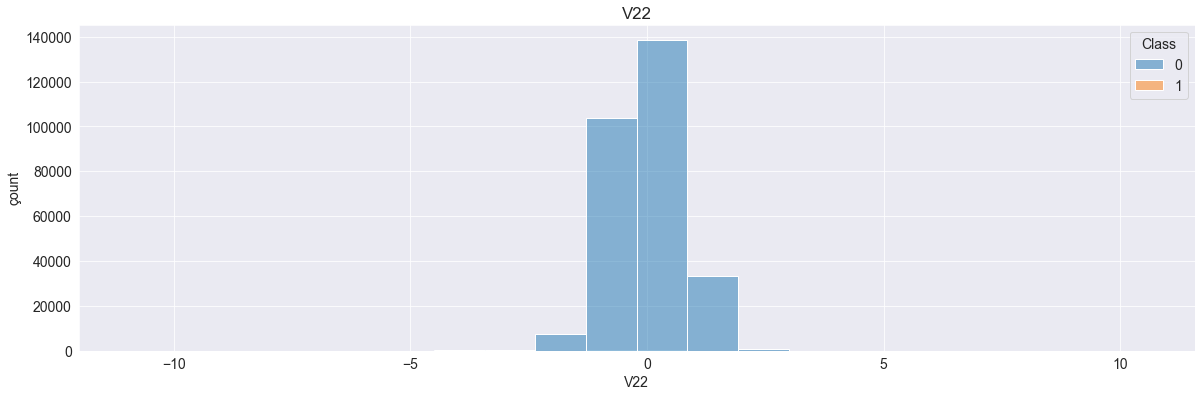

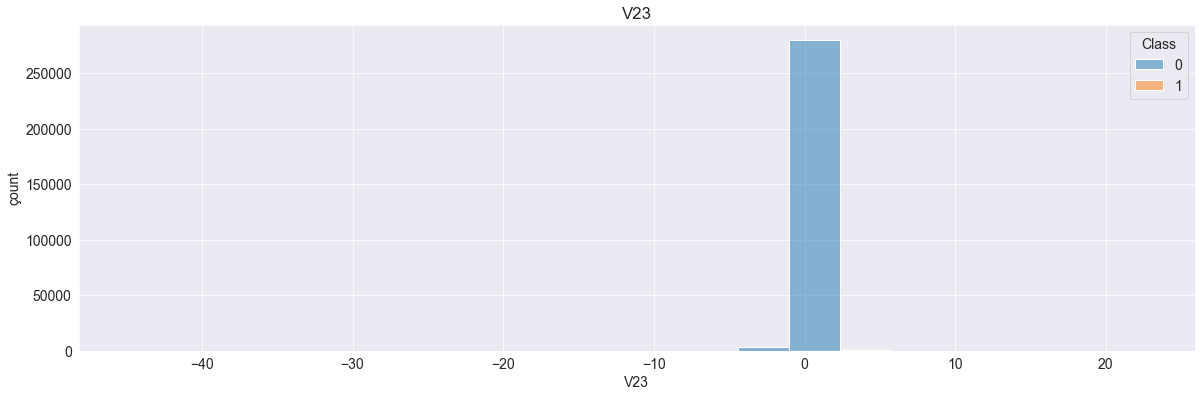

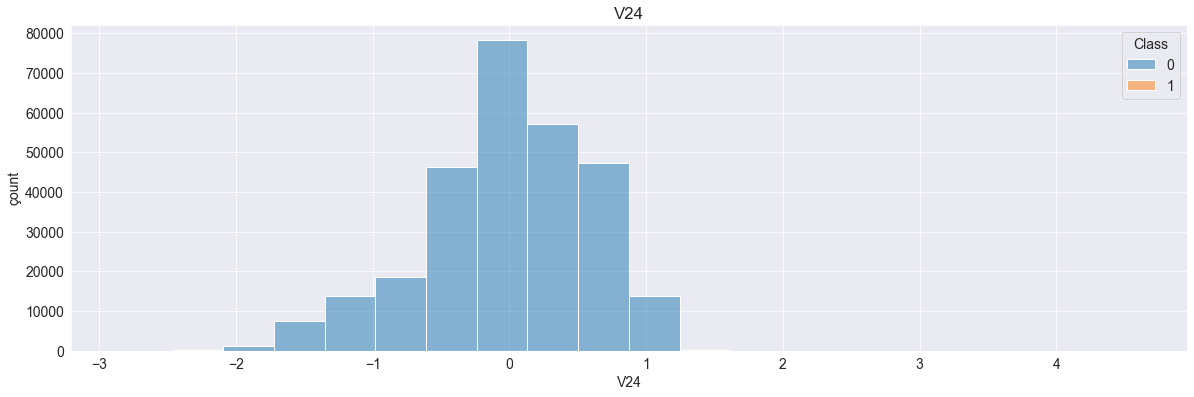

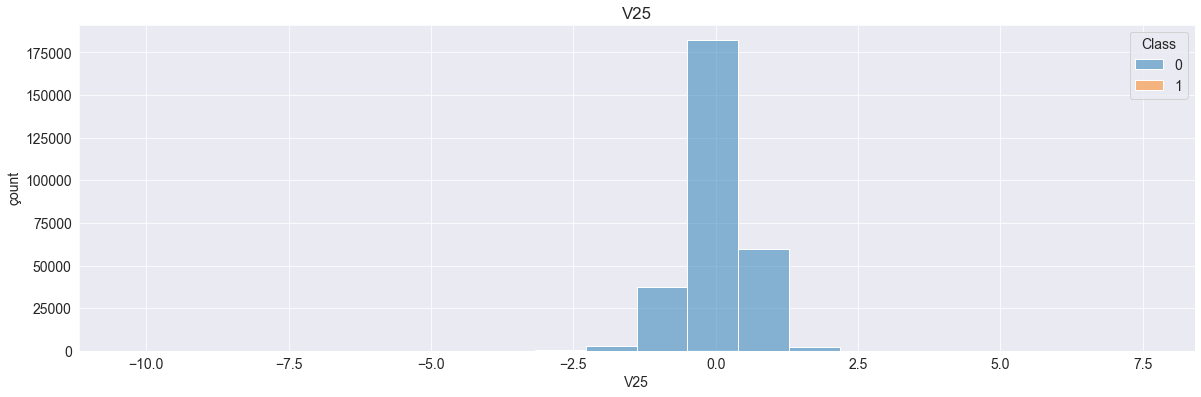

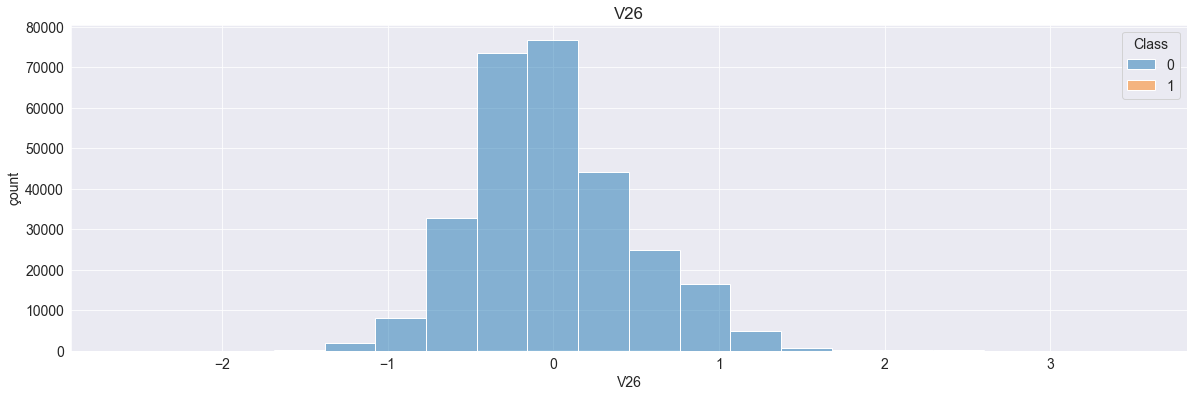

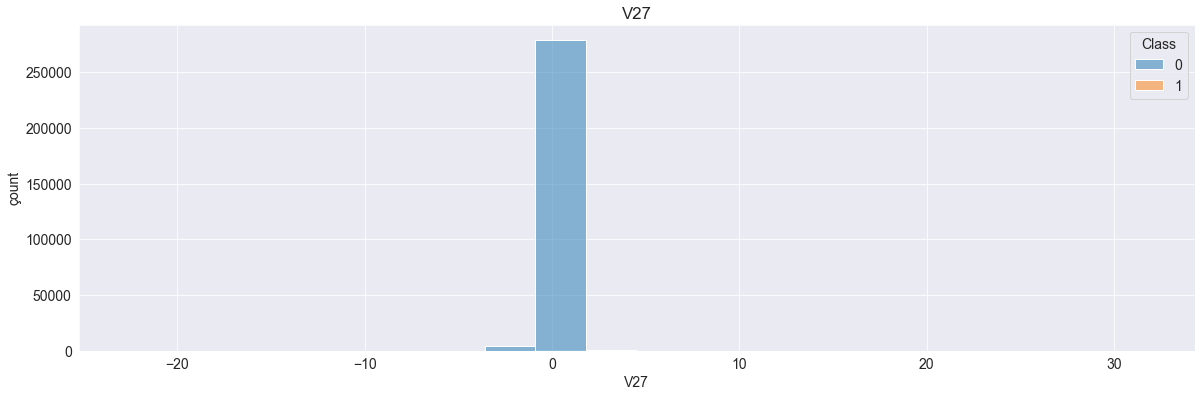

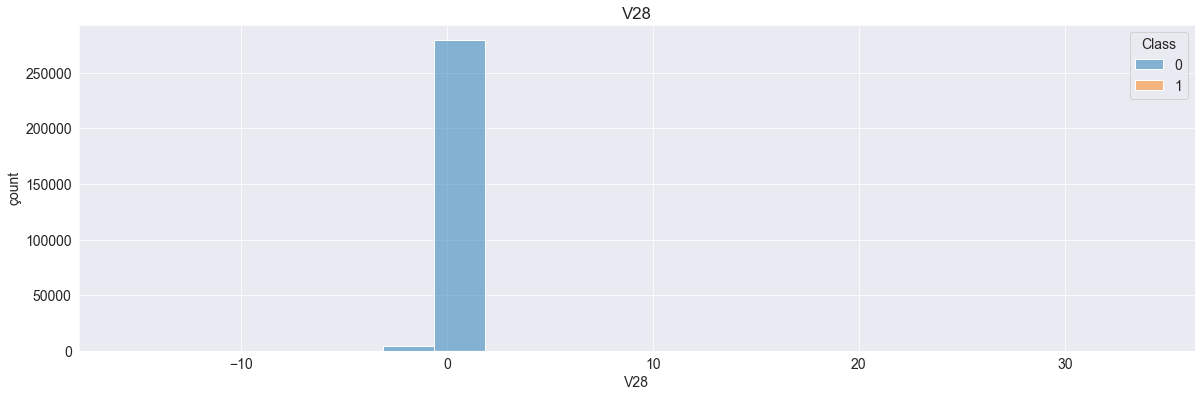

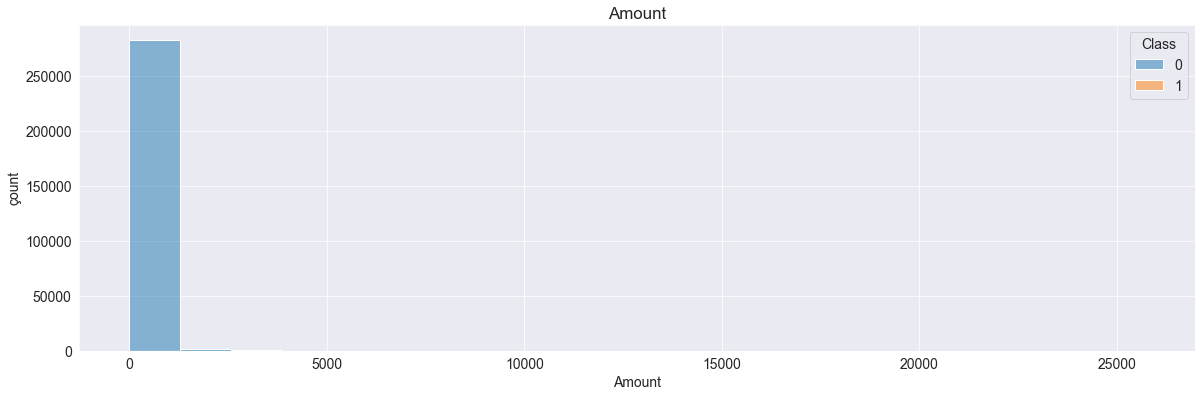

In [12]:
for feature in continuous_feature:
    sns.histplot(x= df[feature], hue= df.Class, data= df, bins=20)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('çount')
    plt.show()

Some of the features are left skewed.

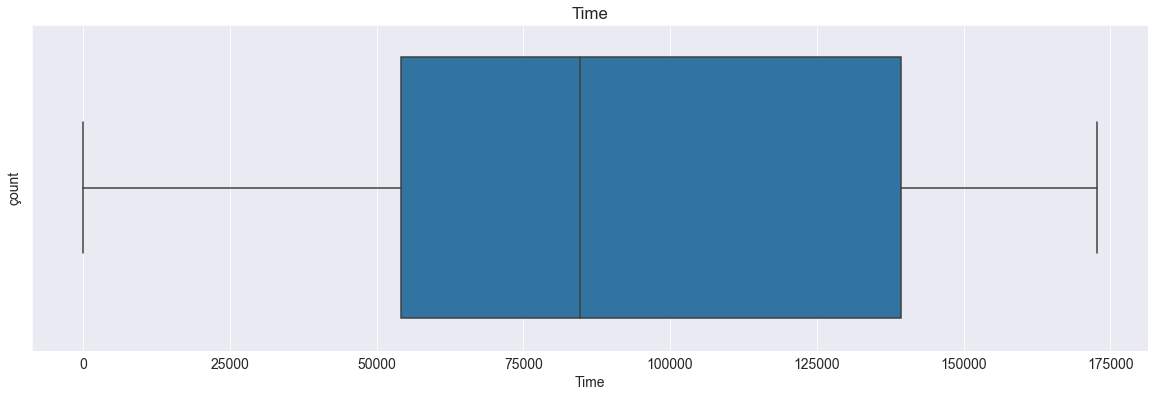

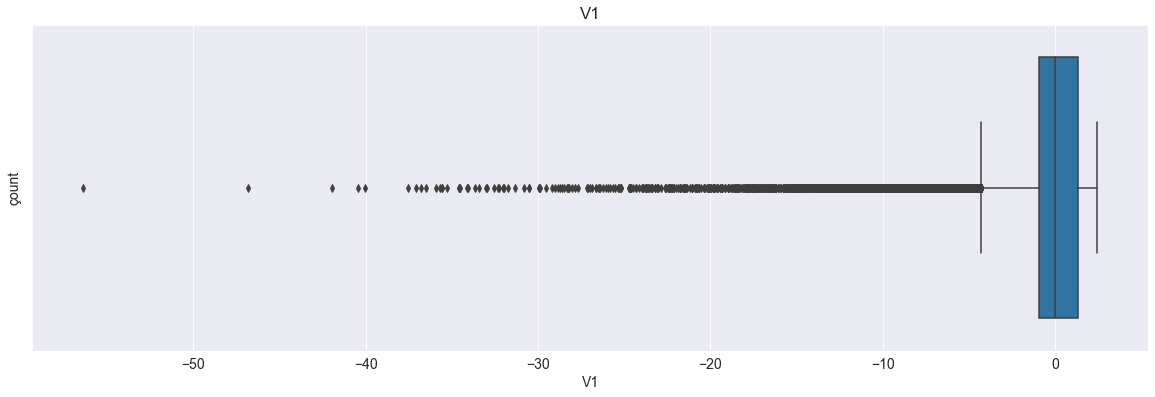

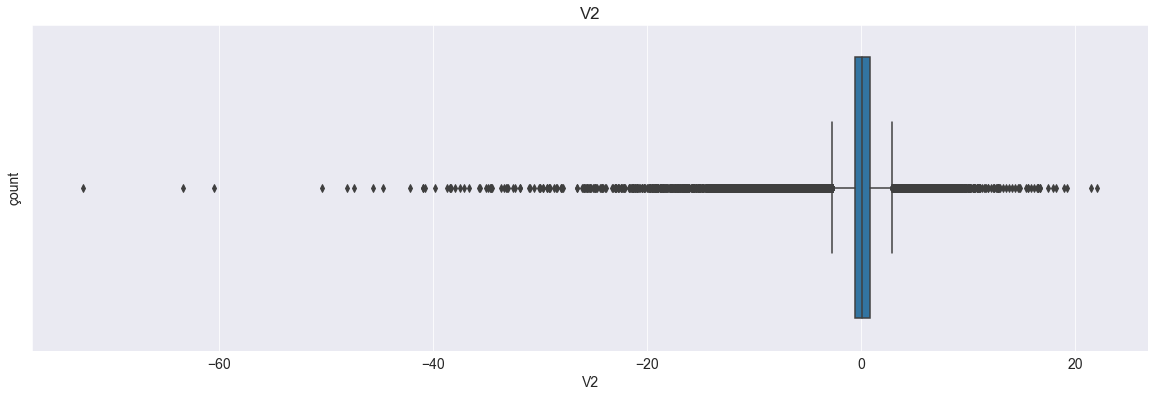

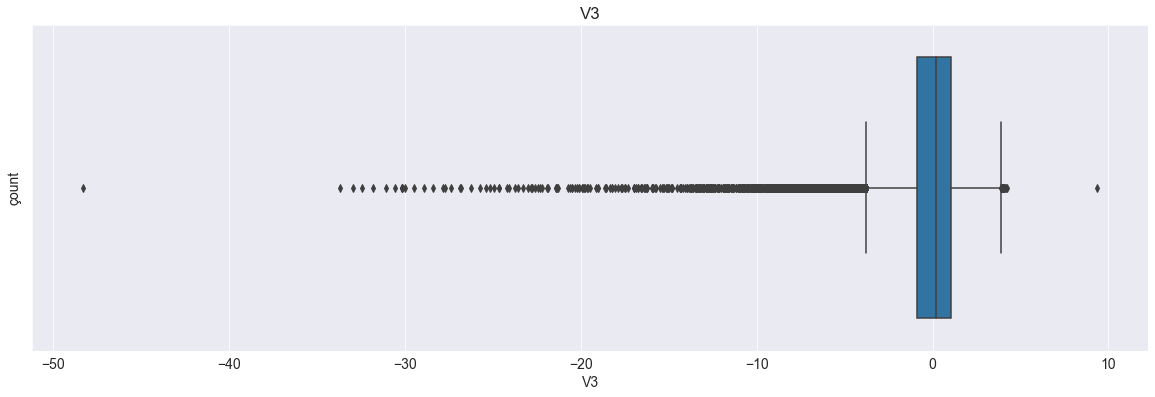

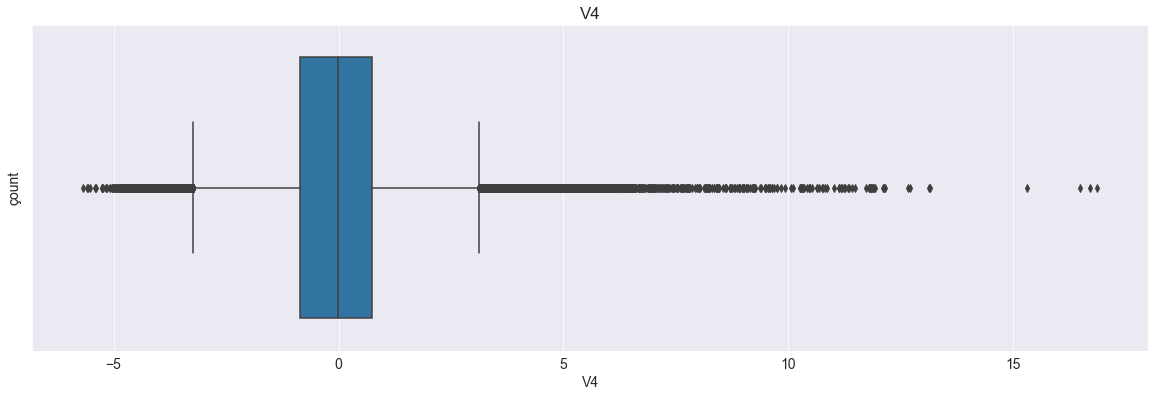

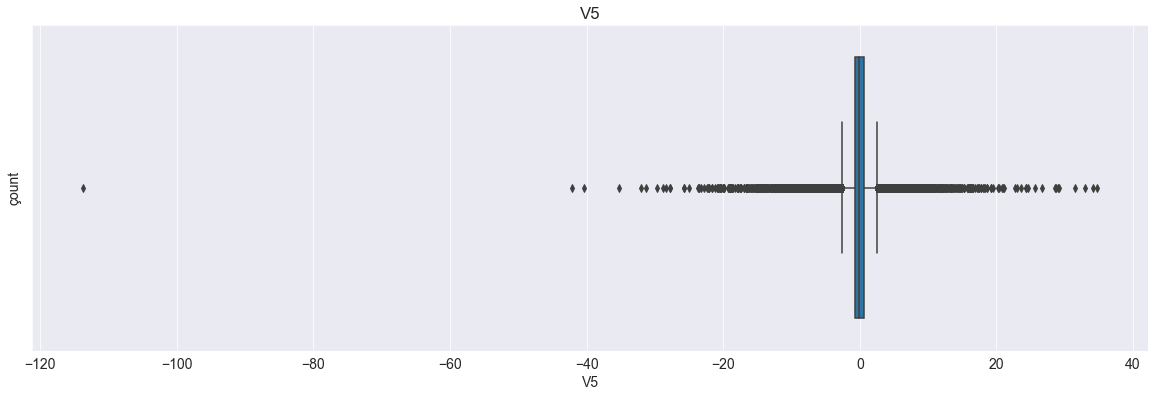

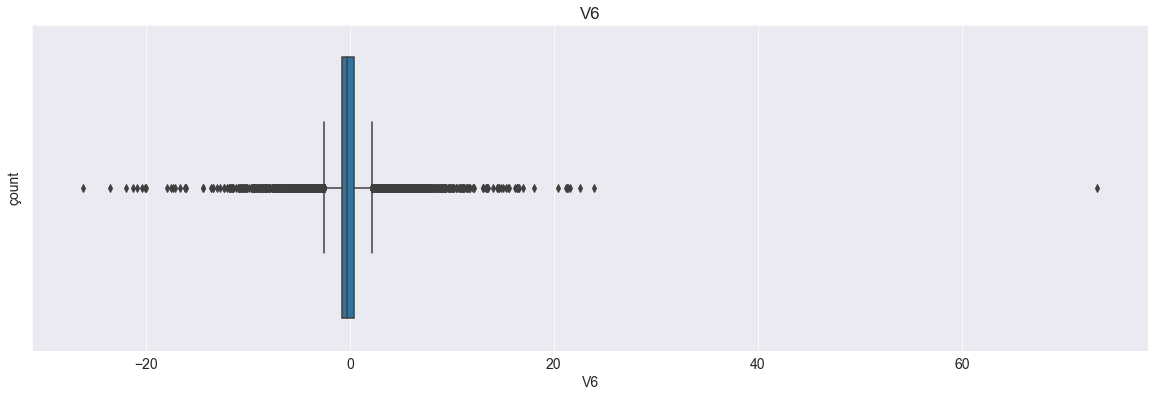

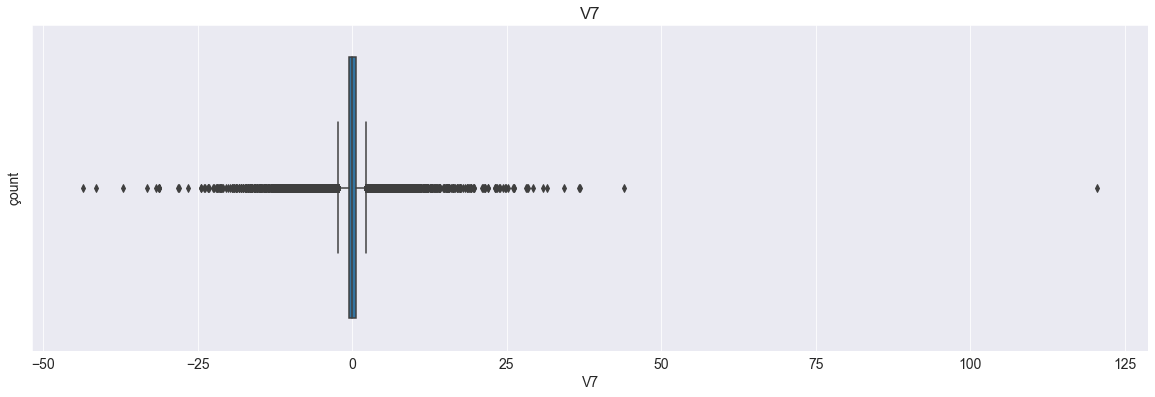

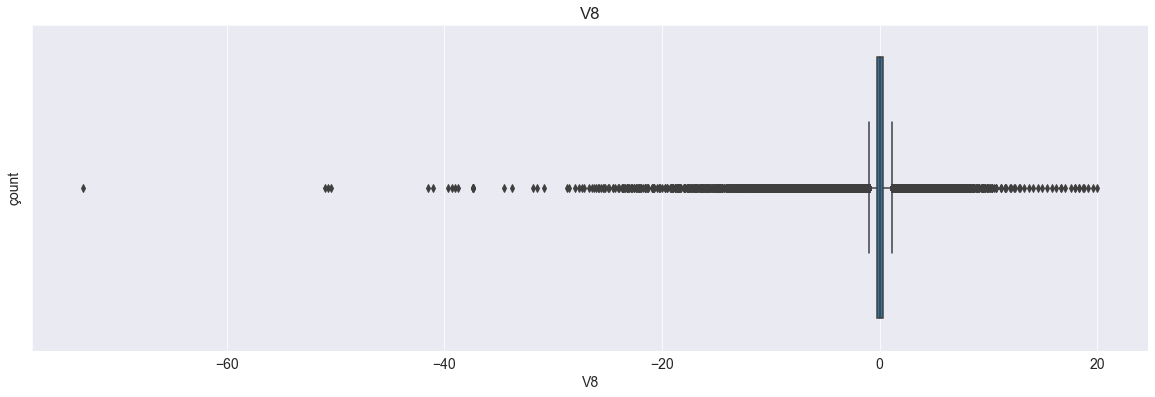

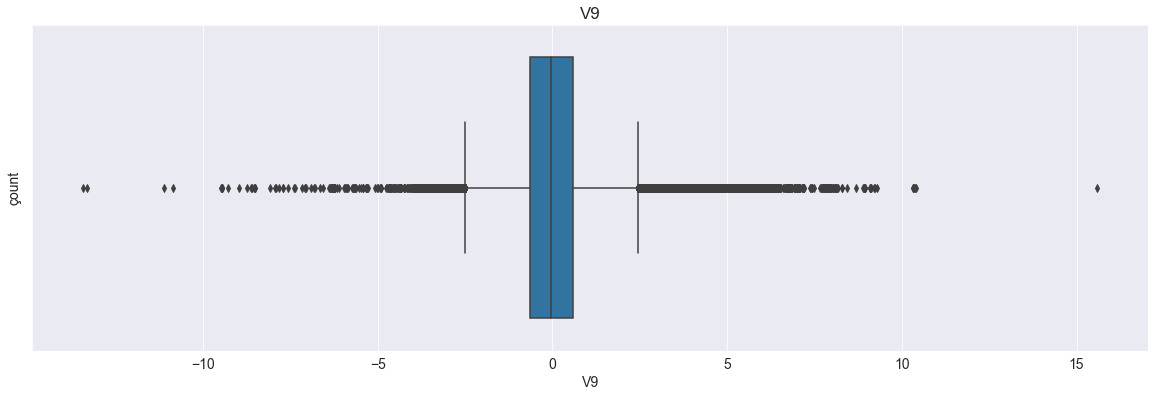

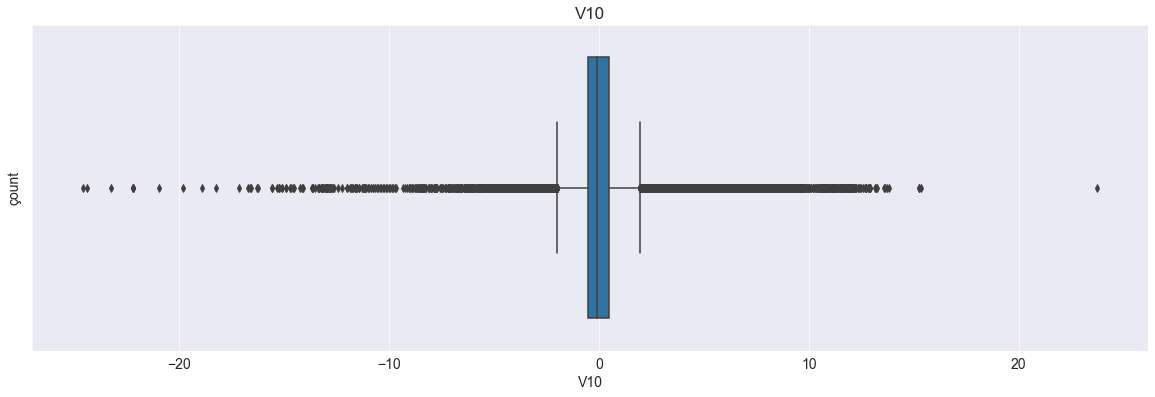

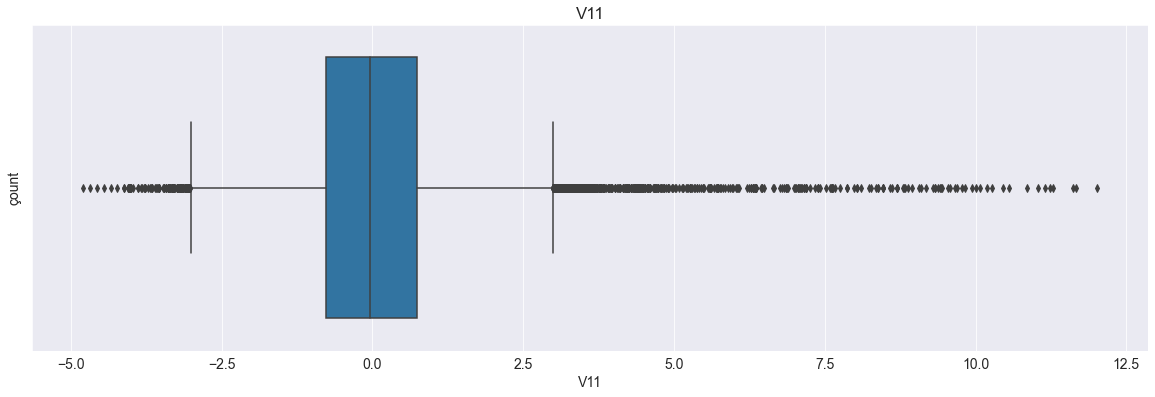

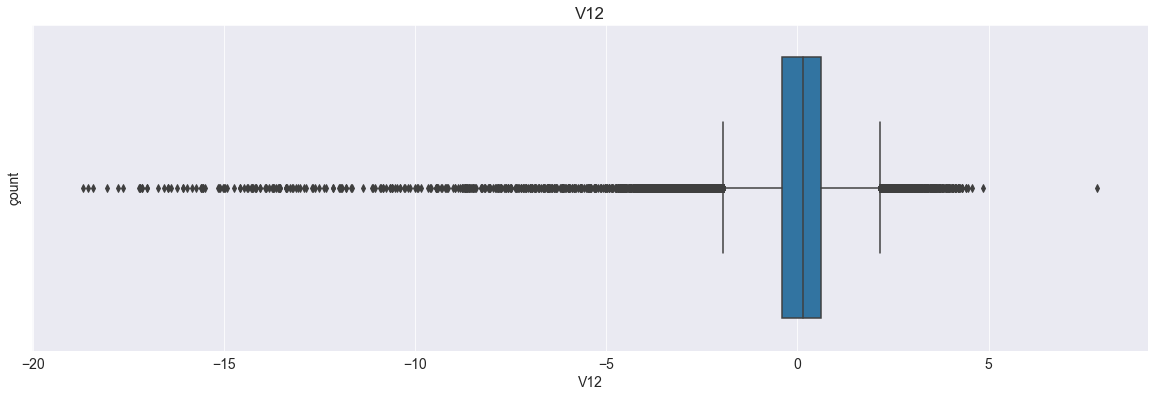

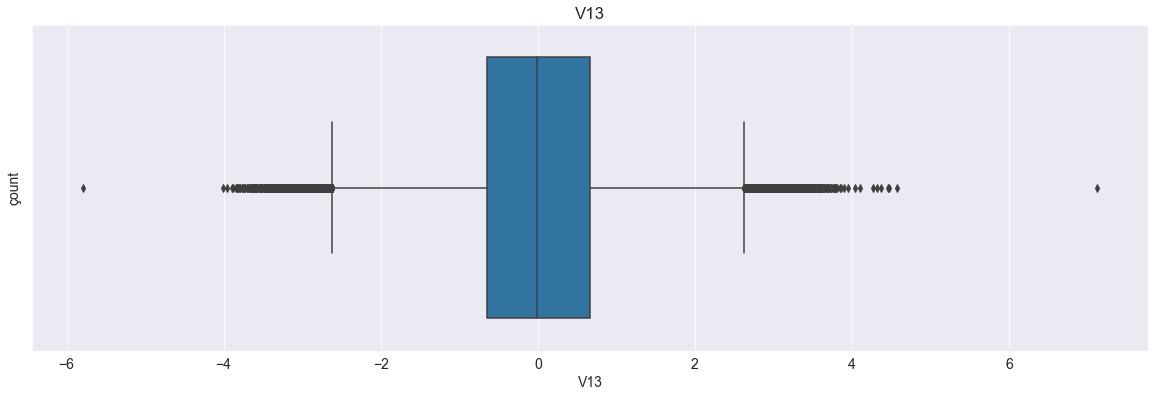

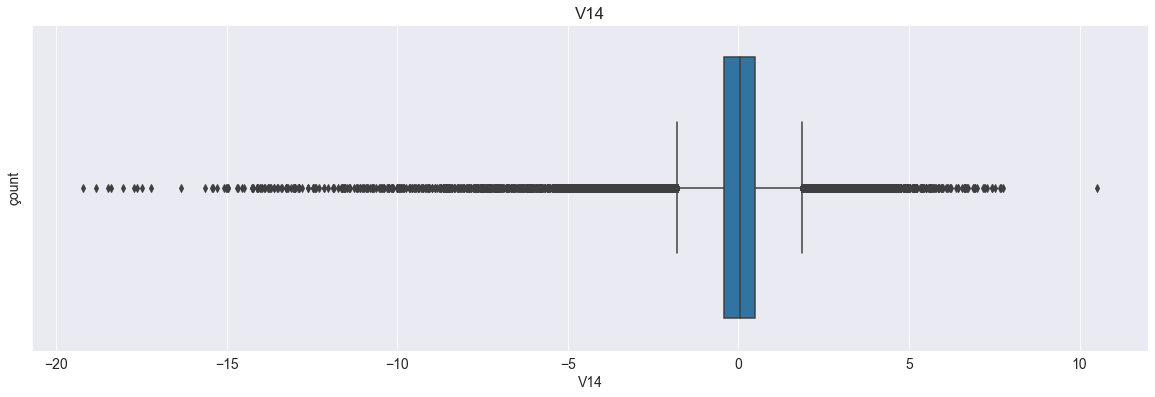

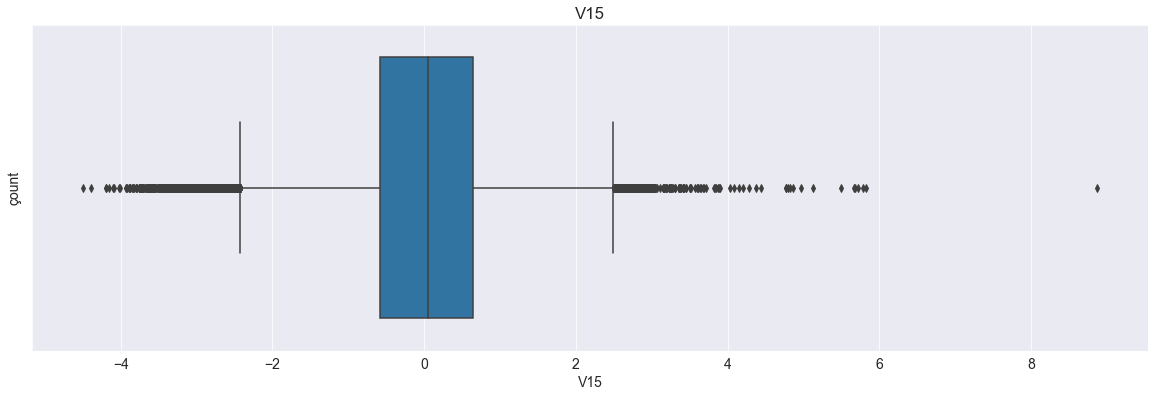

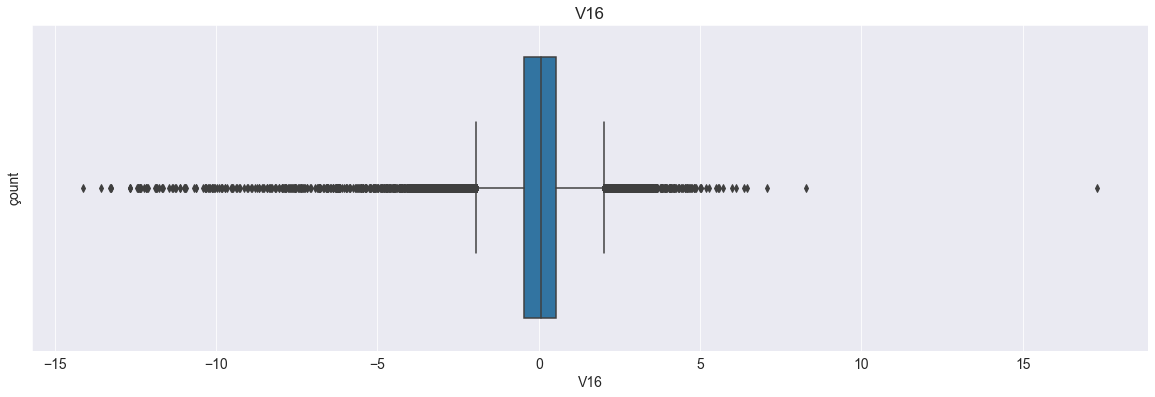

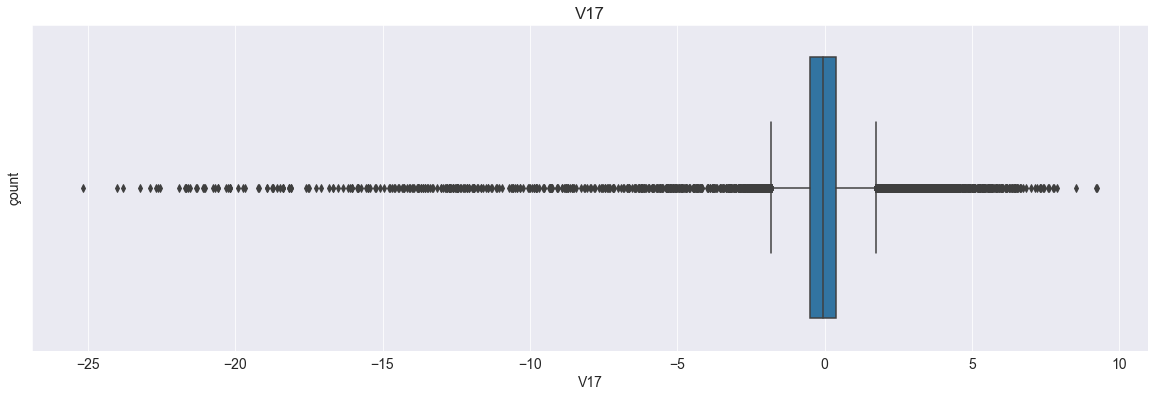

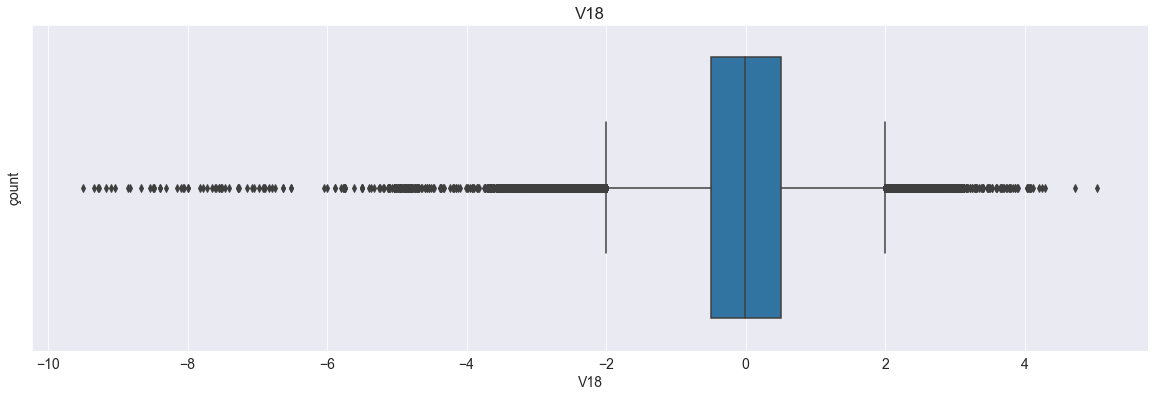

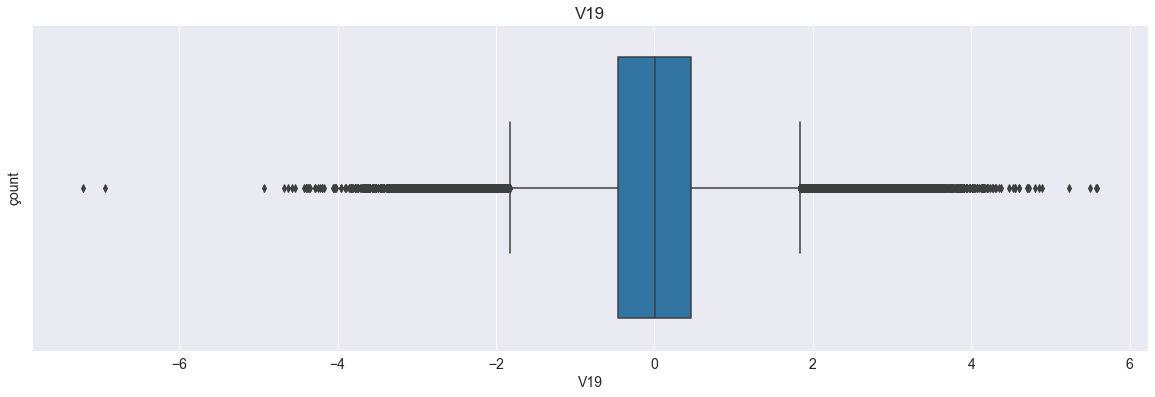

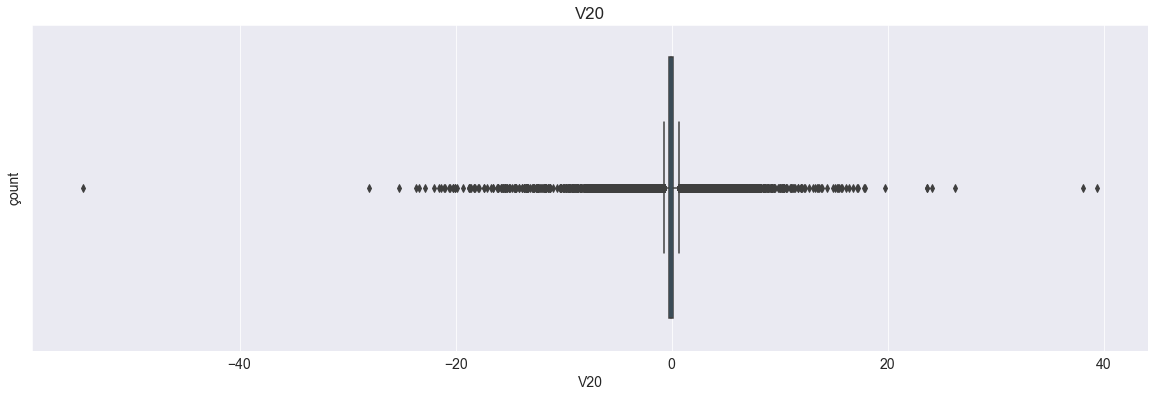

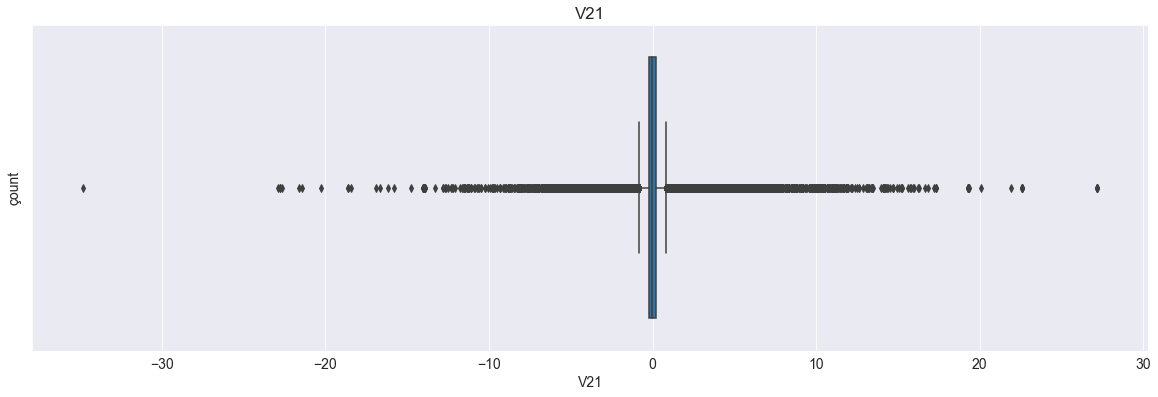

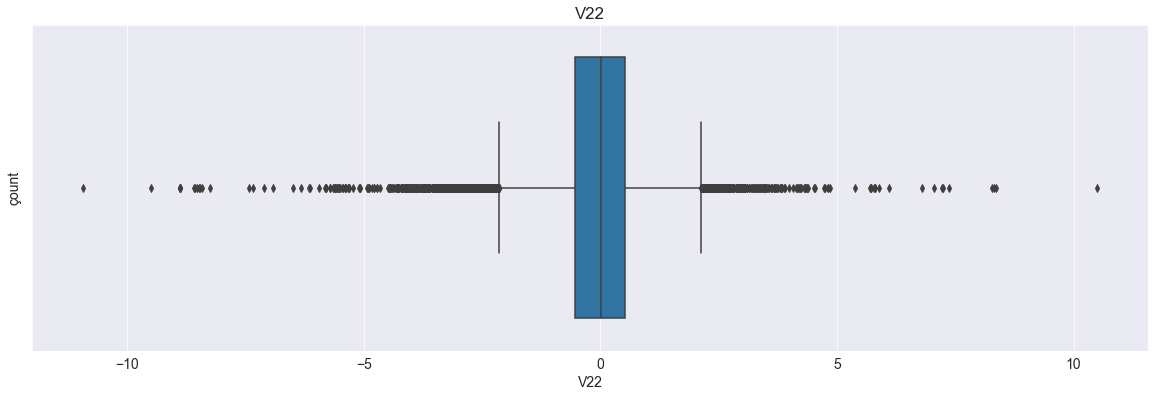

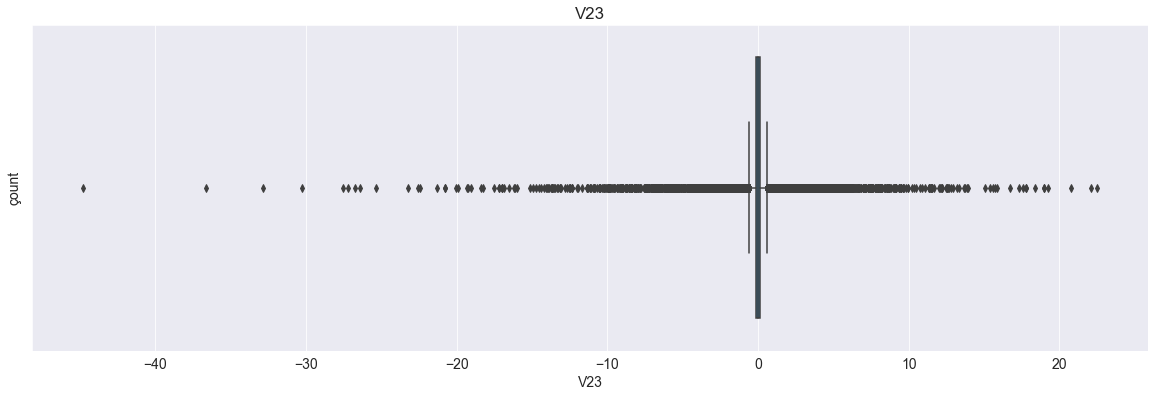

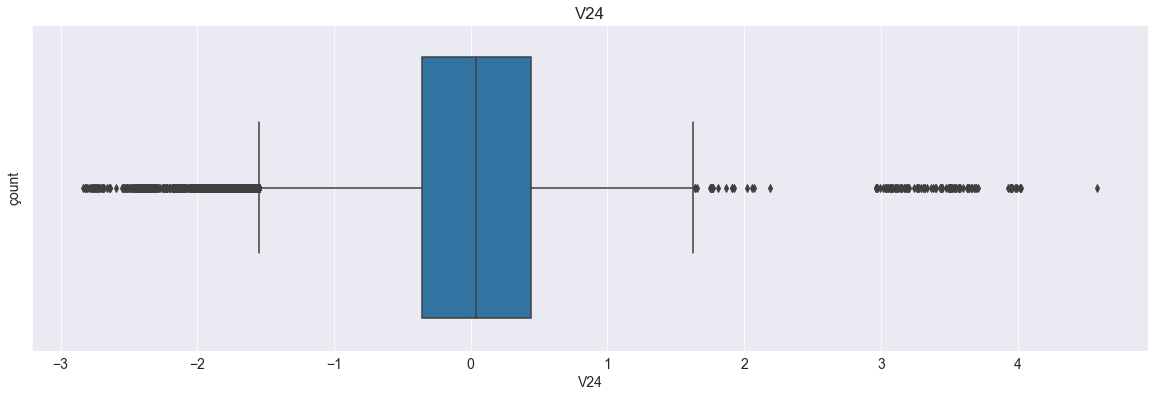

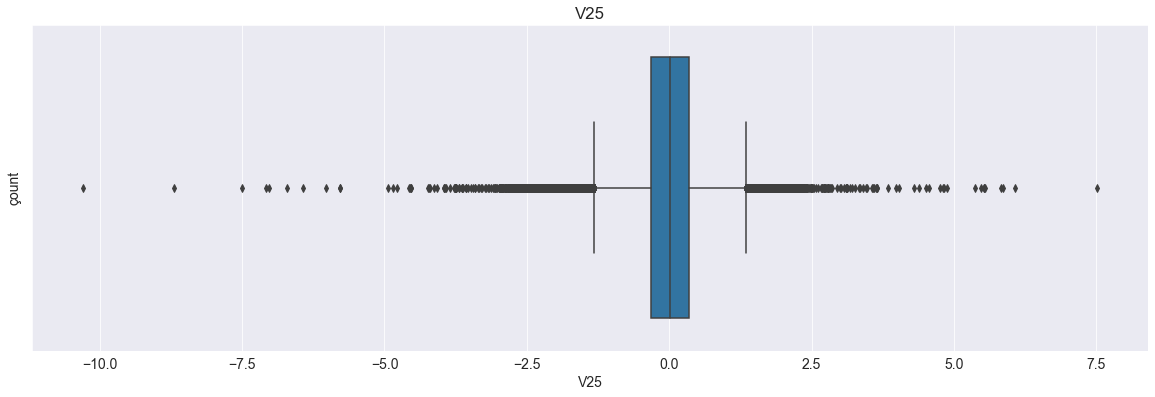

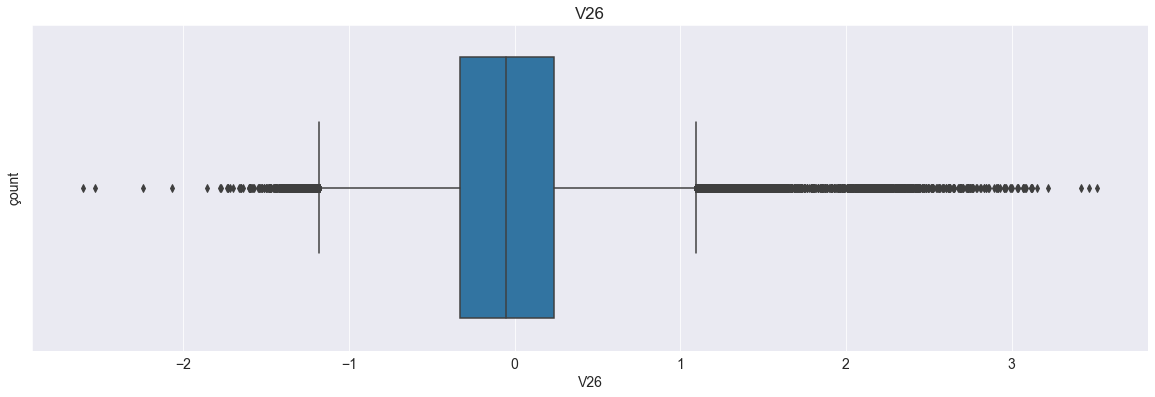

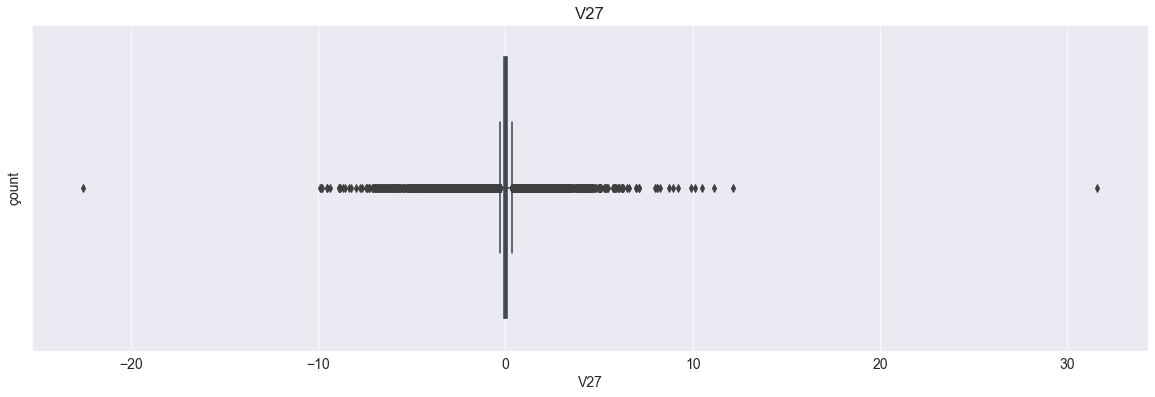

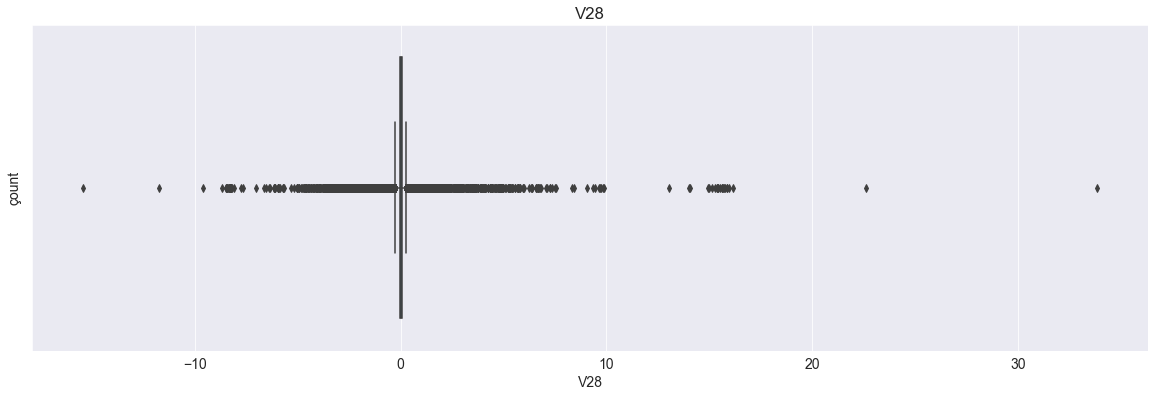

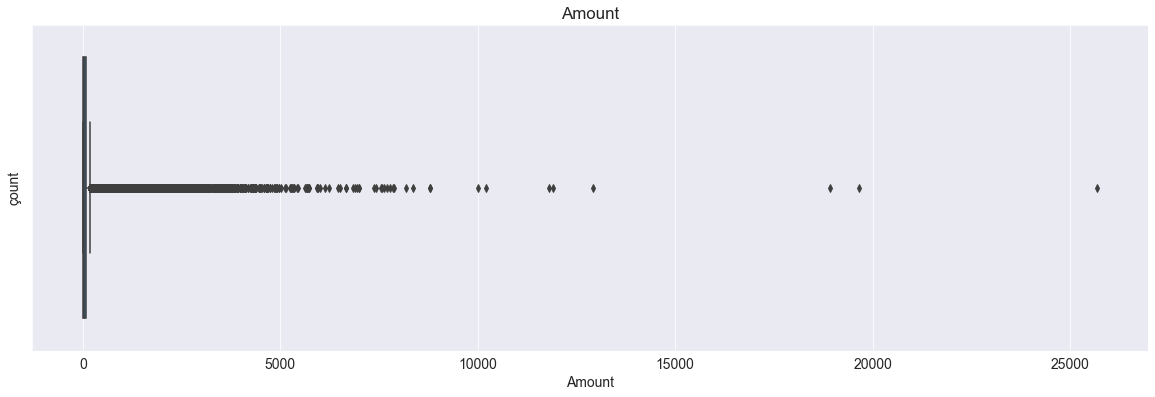

In [13]:
for feature in continuous_feature:
    sns.boxplot(x= df[feature], hue= df.Class, data= df)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('çount')
    plt.show()

A lot of outliers are present in dataset. We'll handle in feature engineering part.

<AxesSubplot:xlabel='Amount', ylabel='V1'>

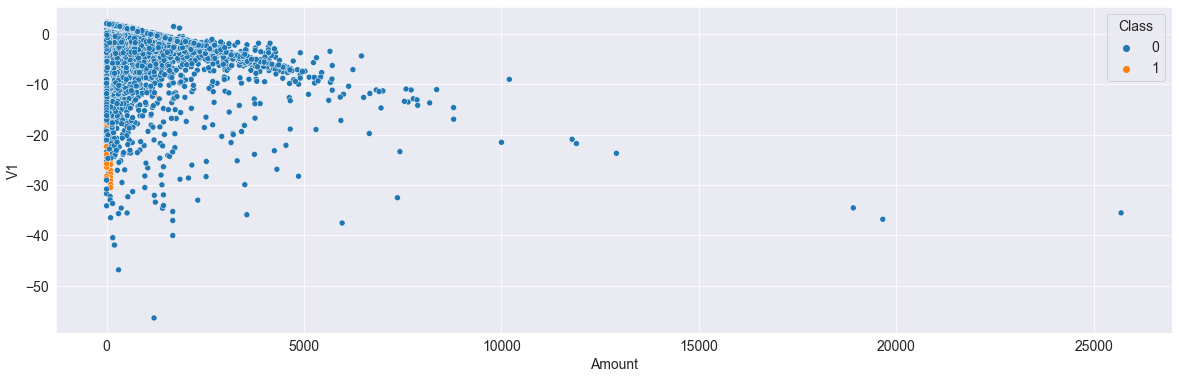

In [14]:
sns.scatterplot(x= df.Amount, y= df.V1, hue= df.Class, data = df)

<AxesSubplot:xlabel='V1', ylabel='V2'>

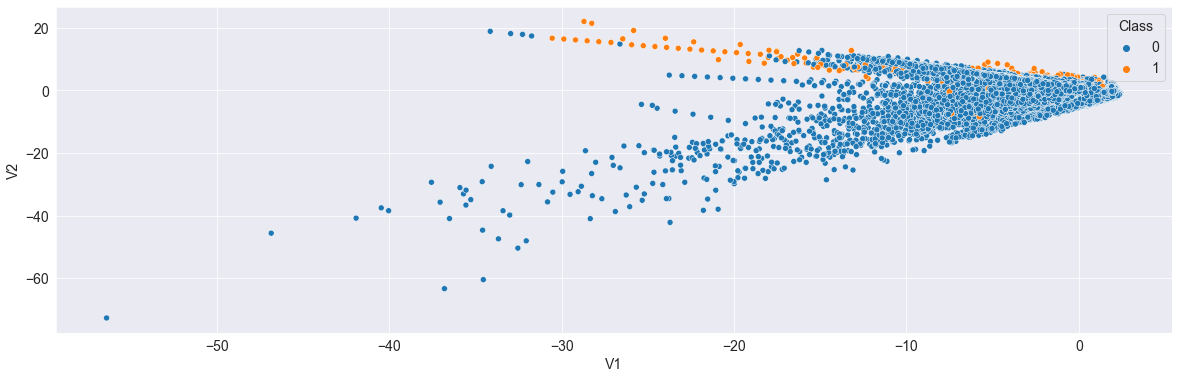

In [15]:
sns.scatterplot(x=df.V1, y=df.V2, hue= df.Class, data = df)

In [16]:
corr = round(df.corr(), 2)

In [17]:
corr

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
Time    1.00  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  0.03   
V1      0.12  1.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00   
V2     -0.01  0.00  1.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   
V3     -0.42 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00   
V4     -0.11 -0.00 -0.00  0.00  1.00 -0.00 -0.00 -0.00  0.00  0.00  0.00   
V5      0.17  0.00  0.00 -0.00 -0.00  1.00  0.00  0.00  0.00  0.00 -0.00   
V6     -0.06 -0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00   
V7      0.08 -0.00  0.00  0.00 -0.00  0.00  0.00  1.00  0.00  0.00 -0.00   
V8     -0.04 -0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00   
V9     -0.01 -0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 -0.00   
V10     0.03  0.00 -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  1.00   
V11    -0.25  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00   
V12     0.12  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00 -0.00  0.00   
V13    -0.07 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00   
V14    -0.10 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V15    -0.18  0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00   
V16     0.01  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V17    -0.07 -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V18     0.09  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V19     0.03  0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00   
V20    -0.05  0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00   
V21     0.04 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00   
V22     0.14 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V23     0.05  0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00   
V24    -0.02 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00   
V25    -0.23 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00   
V26    -0.04 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V27    -0.01  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V28    -0.01  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   
Amount -0.01 -0.23 -0.53 -0.21  0.10 -0.39  0.22  0.40 -0.10 -0.04 -0.10   
Class  -0.01 -0.10  0.09 -0.19  0.13 -0.09 -0.04 -0.19  0.02 -0.10 -0.22   

         V11   V12   V13   V14   V15   V16   V17   V18   V19   V20   V21  \
Time   -0.25  0.12 -0.07 -0.10 -0.18  0.01 -0.07  0.09  0.03 -0.05  0.04   
V1      0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
V2      0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00   
V3      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00   
V4      0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V5      0.00  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V6      0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V7      0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   
V8      0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00   
V9      0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00   
V10    -0.00  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00   
V11     1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V12     0.00  1.00 -0.00  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00   
V13     0.00 -0.00  1.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V14     0.00  0.00  0.00  1.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00   
V15     0.00 -0.00  0.00 -0.00  1.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V16     0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00 -0.00   
V17     0.00  0.00  0.00  0.00  0.00  0.00  1.00 -0.00 -0.00 -0.00 -0.00   
V18     0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  1.00 -0.00 -0.00 -0.00   
V19    -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00 

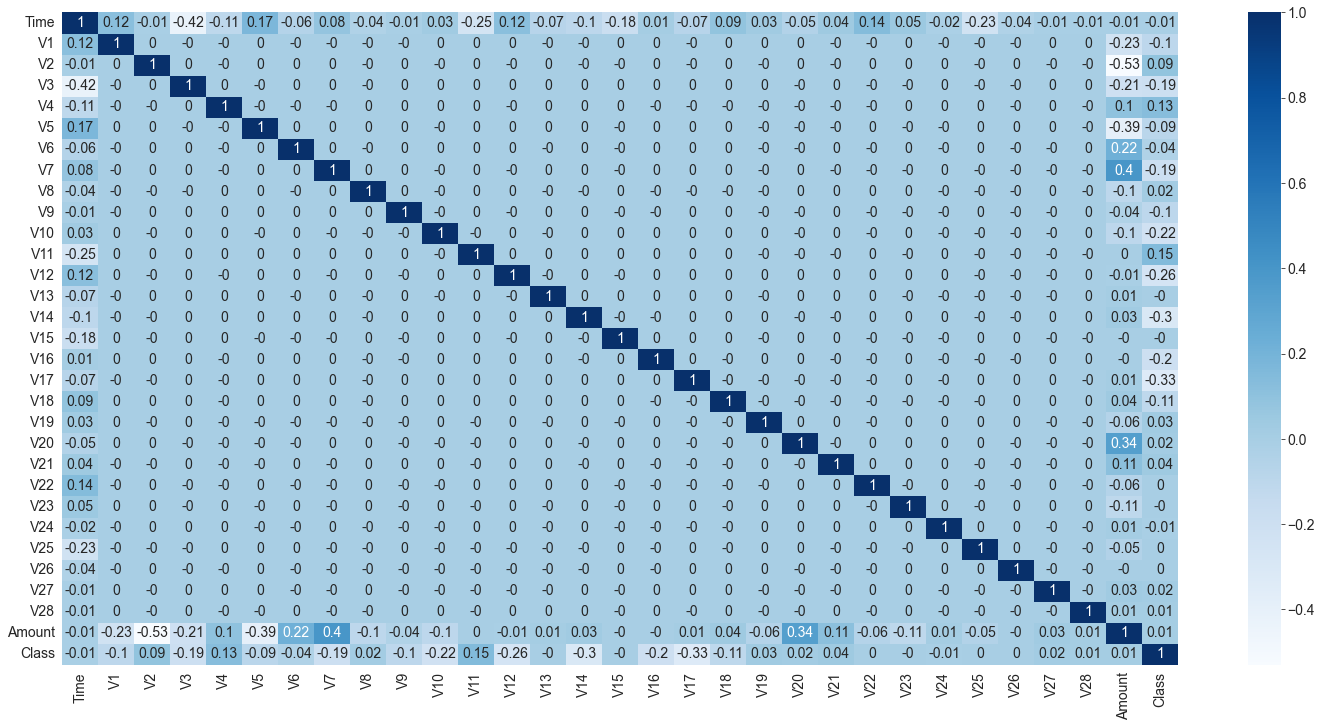

In [18]:
plt.figure(figsize=(25,12))
sns.heatmap(corr, cbar=True, annot = True, cmap= 'Blues')
plt.show()

In [19]:
# sns.pairplot(df.drop('Class', axis=1), kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

#### Conclusion:
- Due to imbalance dataset, these features are not correlated. 
- We will see the correlation before and after balancing the datasset.

## X and y values

In [20]:
df.Class.value_counts()/len(df.Class)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [21]:
X= df.iloc[:,:-1]
y = df.Class

In [22]:
X.shape, y.shape

((284807, 30), (284807,))

## Train test split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape, y_train.shape

((190820, 30), (190820,))

In [26]:
X_test.shape, y_test.shape

((93987, 30), (93987,))

## Balancing the Dataset

In [27]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [28]:
smk = SMOTETomek(random_state=42)

In [29]:
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

In [30]:
X_train.shape, y_train.shape

((379756, 30), (379756,))

In [31]:
X_test.shape, y_test.shape

((186406, 30), (186406,))

In [32]:
cols = X_train.columns

In [33]:
df1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

In [34]:
balanced_df = pd.concat([df1,df2], axis=0)

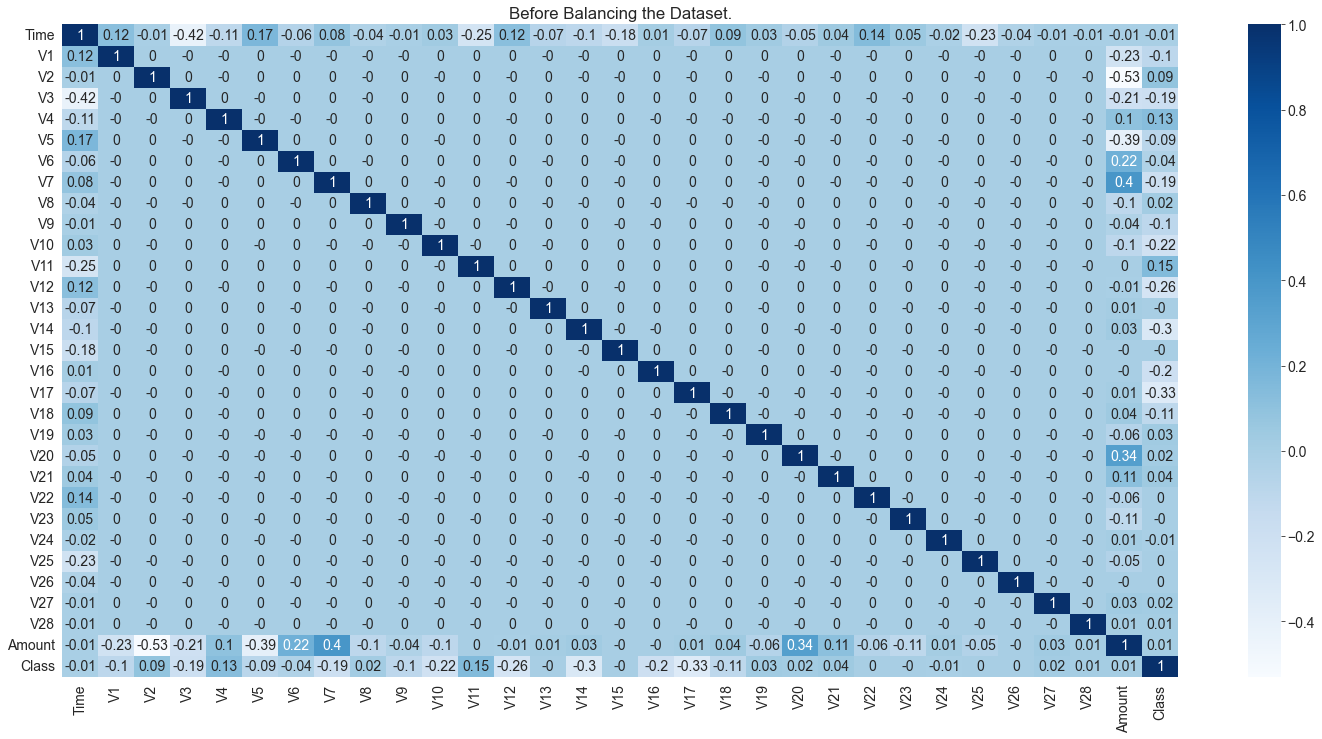

In [35]:
plt.figure(figsize=(25,12))
sns.heatmap(corr, cbar=True, annot = True, cmap= 'Blues')
plt.title('Before Balancing the Dataset.')
plt.show()

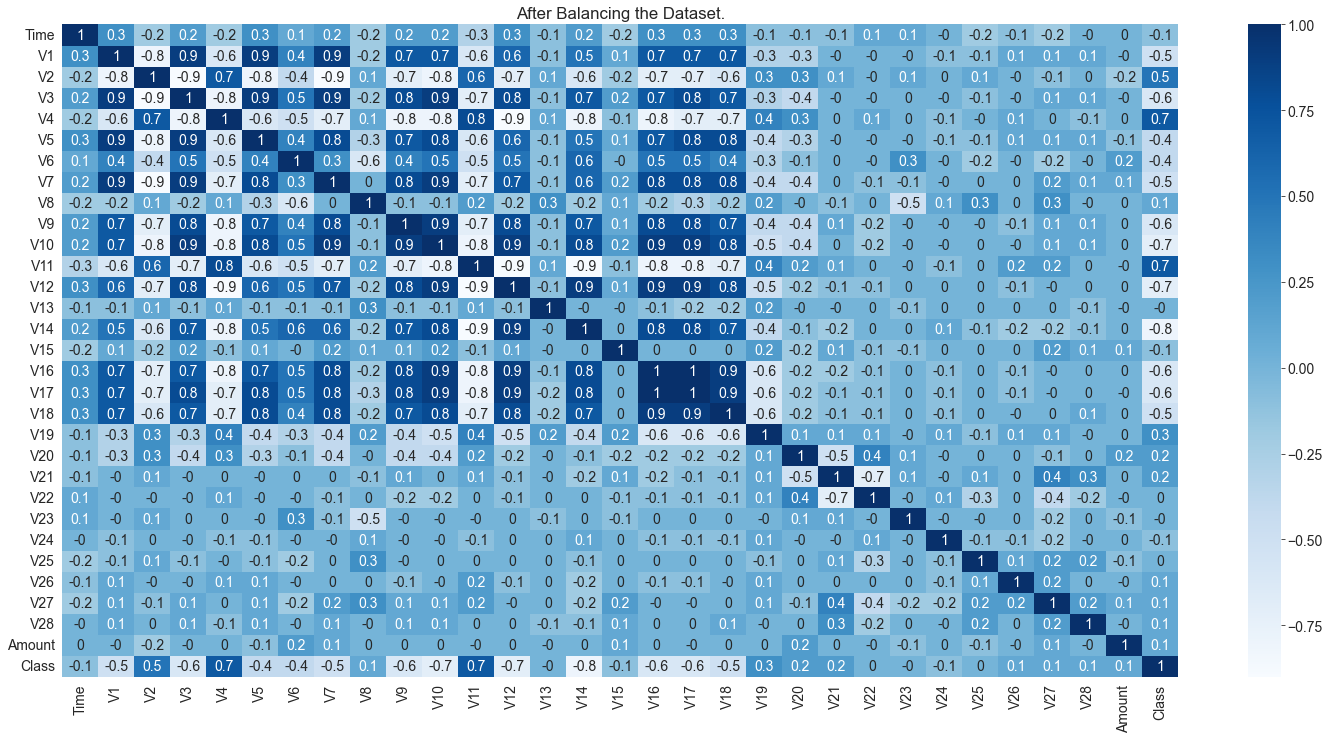

In [36]:
plt.figure(figsize=(25,12))
sns.heatmap(round(balanced_df.corr(),1), cbar=True, annot = True, cmap= 'Blues')
plt.title('After Balancing the Dataset.')
plt.show()

#### Conclusion:
- You can see the difference before and afyter balancing the dataset.
- Now features are correlated.

## Feature Scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

In [39]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train, columns=cols)
X_train.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.469044  0.977766  0.766372  0.931735  0.284087  0.763049  0.264893   
1  0.349108  0.942697  0.773365  0.942497  0.213711  0.772241  0.267886   
2  0.709639  0.924094  0.732845  0.892756  0.258549  0.784124  0.247208   
3  0.335542  0.945258  0.771304  0.924269  0.253500  0.766115  0.275289   
4  0.293827  0.944400  0.784370  0.937609  0.309810  0.763009  0.273394   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.263415  0.787373  0.578089  0.615125  0.352156  0.750174  0.431364   
1  0.271164  0.787408  0.526159  0.598823  0.304665  0.711987  0.449030   
2  0.267676  0.784753  0.591031  0.590522  0.310577  0.707173  0.367852   
3  0.265030  0.793089  0.480570  0.635667  0.252178  0.693419  0.474020   
4  0.253338  0.730759  0.496404  0.591704  0.388277  0.756621  0.398019   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.647490  0.267300  0.434720  0.725492  0.618057  0.572700  0.578612   
1  0.658022  0.331035  0.466392  0.692800  0.668587  0.536954  0.581375   
2  0.600902  0.237334  0.459797  0.737193  0.737187  0.575121  0.594936   
3  0.667353  0.388687  0.408342  0.713600  0.811067  0.594693  0.579581   
4  0.700287  0.388804  0.448152  0.732491  0.618621  0.589016  0.594108   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.561285  0.520262  0.664421  0.392718  0.605007  0.499177  0.238330   
1  0.563139  0.513447  0.660616  0.230050  0.612849  0.490060  0.237372   
2  0.567906  0.510298  0.689972  0.400575  0.482196  0.340080  0.237640   
3  0.559135  0.504347  0.665079  0.144442  0.574519  0.412282  0.245451   
4  0.514205  0.485795  0.668318  0.400913  0.621029  0.330682  0.239056   

        V28    Amount  
0  0.313052  0.000116  
1  0.313788  0.002831  
2  0.318071  0.015095  
3  0.315406  0.004108  
4  0.317467  0.001107

In [41]:
X_test = pd.DataFrame(X_test, columns=cols)
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.240202  0.677529  0.857843  0.565108  0.673305  0.672857  0.234543   
1  0.256152  0.964067  0.738308  0.917699  0.190502  0.755945  0.273234   
2  0.205357  0.982071  0.761026  0.923464  0.206273  0.762082  0.263426   
3  0.967192  0.950953  0.784646  0.888463  0.236437  0.771006  0.256679   
4  0.975005  0.992512  0.765809  0.900908  0.266438  0.764490  0.253402   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.163607  0.866023  0.203354  0.263044  0.600409  0.295857  0.577687   
1  0.262161  0.787789  0.600793  0.603085  0.280072  0.741107  0.454282   
2  0.261014  0.785410  0.521722  0.636268  0.317625  0.708431  0.531573   
3  0.267043  0.791672  0.542299  0.582709  0.206295  0.712621  0.536004   
4  0.265619  0.783661  0.578125  0.623782  0.341312  0.736231  0.400636   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.330871  0.358135  0.134540  0.143746  0.075668  0.805534  0.564135   
1  0.638727  0.320632  0.381204  0.725703  0.773834  0.597093  0.585653   
2  0.637789  0.344545  0.505636  0.705863  0.616613  0.656419  0.582532   
3  0.627531  0.377410  0.465188  0.736981  0.720786  0.571223  0.577661   
4  0.665980  0.285436  0.452248  0.707706  0.630333  0.594919  0.577547   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.580675  0.457425  0.630407  0.472983  0.498552  0.349857  0.189765   
1  0.558039  0.466062  0.657610  0.226330  0.595376  0.303485  0.239385   
2  0.563130  0.517881  0.662959  0.273053  0.606258  0.387496  0.238672   
3  0.567266  0.550787  0.662781  0.379920  0.566265  0.399679  0.232678   
4  0.557632  0.481276  0.670588  0.390529  0.557688  0.453990  0.236517   

        V28    Amount  
0  0.291962  0.014176  
1  0.315195  0.020245  
2  0.313218  0.001207  
3  0.313163  0.000058  
4  0.311692  0.000035

## PCA

In [42]:
from sklearn.decomposition import PCA

In [43]:
pca = PCA(0.95)
pca.fit(X_train)
pca.fit(X_test)

PCA(n_components=0.95)

In [44]:
X_train.shape, X_test.shape

((379756, 30), (186406, 30))

In [45]:
X_train.shape, X_test.shape

((379756, 30), (186406, 30))

## Feature Selection

In [46]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

13

In [48]:
corr_features

{'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V9'}

In [49]:
X_train.drop(corr_features, axis=1)
X_train.head()

X_test.drop(corr_features, axis=1)
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.240202  0.677529  0.857843  0.565108  0.673305  0.672857  0.234543   
1  0.256152  0.964067  0.738308  0.917699  0.190502  0.755945  0.273234   
2  0.205357  0.982071  0.761026  0.923464  0.206273  0.762082  0.263426   
3  0.967192  0.950953  0.784646  0.888463  0.236437  0.771006  0.256679   
4  0.975005  0.992512  0.765809  0.900908  0.266438  0.764490  0.253402   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.163607  0.866023  0.203354  0.263044  0.600409  0.295857  0.577687   
1  0.262161  0.787789  0.600793  0.603085  0.280072  0.741107  0.454282   
2  0.261014  0.785410  0.521722  0.636268  0.317625  0.708431  0.531573   
3  0.267043  0.791672  0.542299  0.582709  0.206295  0.712621  0.536004   
4  0.265619  0.783661  0.578125  0.623782  0.341312  0.736231  0.400636   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.330871  0.358135  0.134540  0.143746  0.075668  0.805534  0.564135   
1  0.638727  0.320632  0.381204  0.725703  0.773834  0.597093  0.585653   
2  0.637789  0.344545  0.505636  0.705863  0.616613  0.656419  0.582532   
3  0.627531  0.377410  0.465188  0.736981  0.720786  0.571223  0.577661   
4  0.665980  0.285436  0.452248  0.707706  0.630333  0.594919  0.577547   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.580675  0.457425  0.630407  0.472983  0.498552  0.349857  0.189765   
1  0.558039  0.466062  0.657610  0.226330  0.595376  0.303485  0.239385   
2  0.563130  0.517881  0.662959  0.273053  0.606258  0.387496  0.238672   
3  0.567266  0.550787  0.662781  0.379920  0.566265  0.399679  0.232678   
4  0.557632  0.481276  0.670588  0.390529  0.557688  0.453990  0.236517   

        V28    Amount  
0  0.291962  0.014176  
1  0.315195  0.020245  
2  0.313218  0.001207  
3  0.313163  0.000058  
4  0.311692  0.000035

In [50]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379756 entries, 0 to 379755
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    379756 non-null  float64
 1   V1      379756 non-null  float64
 2   V2      379756 non-null  float64
 3   V3      379756 non-null  float64
 4   V4      379756 non-null  float64
 5   V5      379756 non-null  float64
 6   V6      379756 non-null  float64
 7   V7      379756 non-null  float64
 8   V8      379756 non-null  float64
 9   V9      379756 non-null  float64
 10  V10     379756 non-null  float64
 11  V11     379756 non-null  float64
 12  V12     379756 non-null  float64
 13  V13     379756 non-null  float64
 14  V14     379756 non-null  float64
 15  V15     379756 non-null  float64
 16  V16     379756 non-null  float64
 17  V17     379756 non-null  float64
 18  V18     379756 non-null  float64
 19  V19     379756 non-null  float64
 20  V20     379756 non-null  float64
 21  V21     37

In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186406 entries, 0 to 186405
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    186406 non-null  float64
 1   V1      186406 non-null  float64
 2   V2      186406 non-null  float64
 3   V3      186406 non-null  float64
 4   V4      186406 non-null  float64
 5   V5      186406 non-null  float64
 6   V6      186406 non-null  float64
 7   V7      186406 non-null  float64
 8   V8      186406 non-null  float64
 9   V9      186406 non-null  float64
 10  V10     186406 non-null  float64
 11  V11     186406 non-null  float64
 12  V12     186406 non-null  float64
 13  V13     186406 non-null  float64
 14  V14     186406 non-null  float64
 15  V15     186406 non-null  float64
 16  V16     186406 non-null  float64
 17  V17     186406 non-null  float64
 18  V18     186406 non-null  float64
 19  V19     186406 non-null  float64
 20  V20     186406 non-null  float64
 21  V21     18

## Model Trainning

#### Logistic Regression Model

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(random_state=42)

In [54]:
model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [55]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [56]:
model.score(X_test, y_test)

0.9772271278821497

In [57]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[92340   863]
 [ 3382 89821]]


In [58]:

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     93203
           1       0.99      0.96      0.98     93203

    accuracy                           0.98    186406
   macro avg       0.98      0.98      0.98    186406
weighted avg       0.98      0.98      0.98    186406



### Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
model = RandomForestClassifier(n_jobs = -1 ,random_state=42)

In [61]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [62]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9658


In [63]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[93180    23]
 [ 6354 86849]]


In [64]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    189878
1    189878
dtype: int64

In [65]:

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     93203
           1       1.00      0.93      0.96     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## SVM

In [66]:
from sklearn import svm

In [67]:
model = svm.SVC(random_state=42)

In [68]:
model.fit(X_train, y_train)

SVC(random_state=42)

In [69]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9845
Test set score: 0.9854


In [70]:
print(confusion_matrix(y_test, y_pred))

[[93180    23]
 [ 6354 86849]]


In [71]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    194011
1    185745
dtype: int64

In [72]:
y_pred = model.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     93203
           1       0.99      0.98      0.99     93203

    accuracy                           0.99    186406
   macro avg       0.99      0.99      0.99    186406
weighted avg       0.99      0.99      0.99    186406



In [73]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.show()

## Decision Trees

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model = DecisionTreeClassifier(random_state=42, max_depth=3 )

In [76]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [77]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9606
Test set score: 0.9668


In [78]:
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
print(confusion_matrix(y_test, y_pred))

[[92735   468]
 [ 2251 90952]]


In [80]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    199939
1    179817
dtype: int64

In [81]:
y_pred = model.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.95      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Adaboost

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
model = AdaBoostClassifier(random_state=42, learning_rate=0.01)
model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, random_state=42)

In [84]:
model.score(X_train, y_train)

0.9460996007963007

In [85]:
model.score(X_test, y_test)

0.9542503996652468

In [86]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(AdaBoostClassifier(learning_rate=0.01), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.99824444 0.99943822 0.99964889 0.99901689 0.99908711 0.99901689
 0.999368   0.99894663 0.99870084 0.9988764 ]
Avg : 0.9990344318102468


In [87]:
print(confusion_matrix(y_test, y_pred))

[[91980  1223]
 [ 4968 88235]]


In [88]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.95      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Gradient Boosting

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

In [90]:
model = GradientBoostingClassifier(random_state=42, learning_rate=0.1)

In [91]:
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [92]:
model.score(X_train, y_train)

0.9899830417425927

In [93]:
model.score(X_test, y_test)

0.9799630913168031

In [94]:
print(confusion_matrix(y_test, y_pred))

[[91980  1223]
 [ 4968 88235]]


In [95]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.95      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



In [96]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 3)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))



KeyboardInterrupt



In [97]:
from xgboost import XGBClassifier

In [98]:
model = XGBClassifier(learning_rate=0.05, n_estimators=500)

In [99]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [100]:
model.score(X_train, y_train)

1.0

In [101]:
model.score(X_test, y_test)

0.9741478278596183

In [102]:
print(confusion_matrix(y_test, y_pred))

[[91980  1223]
 [ 4968 88235]]


In [103]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.95      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Model Evaluation

In [104]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.98374355 0.99894667 0.99985956 0.99947333 0.99884133 0.99901689
 0.99964889 0.99877107 0.99866573 0.99873596]
Avg : 0.9975702965933527


In [108]:
score_ab=cross_val_score(AdaBoostClassifier(learning_rate=0.01), X, y,cv=10)
print(score_ab)
print("Avg :",score_ab.mean())

[0.99824444 0.99943822 0.99964889 0.99901689 0.99908711 0.99901689
 0.999368   0.99894663 0.99870084 0.9988764 ]
Avg : 0.9990344318102468


In [111]:
score_GB=cross_val_score(GradientBoostingClassifier(random_state=42, learning_rate=0.1),X,y,cv=10)
print(score_GB)
print("Avg :",score_GB.mean())

[0.02268179 0.99884133 0.99961378 0.99852533 0.99831467 0.99856044
 0.99957867 0.99852528 0.99863062 0.99870084]
Avg : 0.9011972748735703


In [112]:
score_XGB=cross_val_score(XGBClassifier(learning_rate=0.05),X,y,cv=10)
print(score_XGB)
print("Avg :",score_XGB.mean())

[0.95565465 0.99884133 0.99992978 0.99947333 0.99940311 0.99894667
 0.999684   0.99954354 0.99957865 0.99940309]
Avg : 0.9950458148424595


In [113]:
score_RF=cross_val_score(RandomForestClassifier(n_jobs = -1), X, y,cv=10)
print(score_RF)
print("Avg :",score_RF.mean())

[0.03117868 0.99894667 0.99985956 0.99950844 0.99943822 0.99894667
 0.99978933 0.99954354 0.99950843 0.99940309]
Avg : 0.9026122624032027


In [116]:
score_SVC=cross_val_score(svm.SVC(), X, y,cv=10)
print(score_SVC)
print("Avg :",score_SVC.mean())

[0.99827955 0.99827955 0.99827955 0.99827955 0.99827955 0.99824444
 0.99824444 0.99827949 0.99827949 0.99827949]
Avg : 0.9982725144429028


## Conclusion:
- You can see that Adaboost algorithm is best for this use-case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['figure.facecolor'] = '#00000000'
pd.pandas.set_option('display.max_columns',None)
# pd.pandas.set_option('display.max_rows',None)

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.772925e-15  9.289524e-16 -1.803266e-15  1.674888e-15  1.475621e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   3.501098e-15  1.392460e-15 -7.466538e-16  4.258754e-16  9.019919e-16   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   5.126845e-16  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.Class.value_counts()/len(df.Class)

0    0.998273
1    0.001727
Name: Class, dtype: float64

## Exploratory Data Analysis
let's visualize target column.

In [8]:
df.Class.unique()

array([0, 1], dtype=int64)

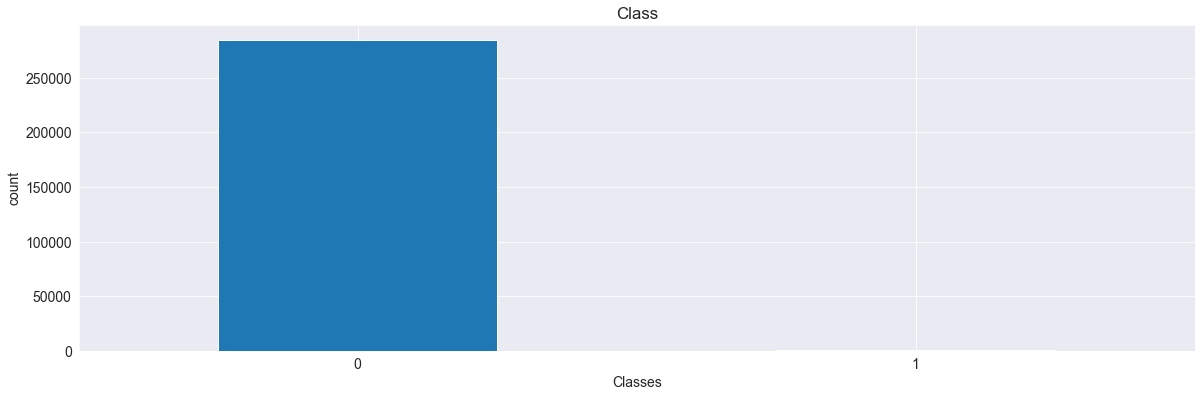

In [9]:
df.Class.value_counts().plot.bar()
plt.title('Class')
plt.xticks([0,1],rotation=0)
plt.xlabel('Classes')
plt.ylabel('count')
plt.show()

## Numerical features

In [10]:
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
continuous_feature = df.drop('Class', axis=1)

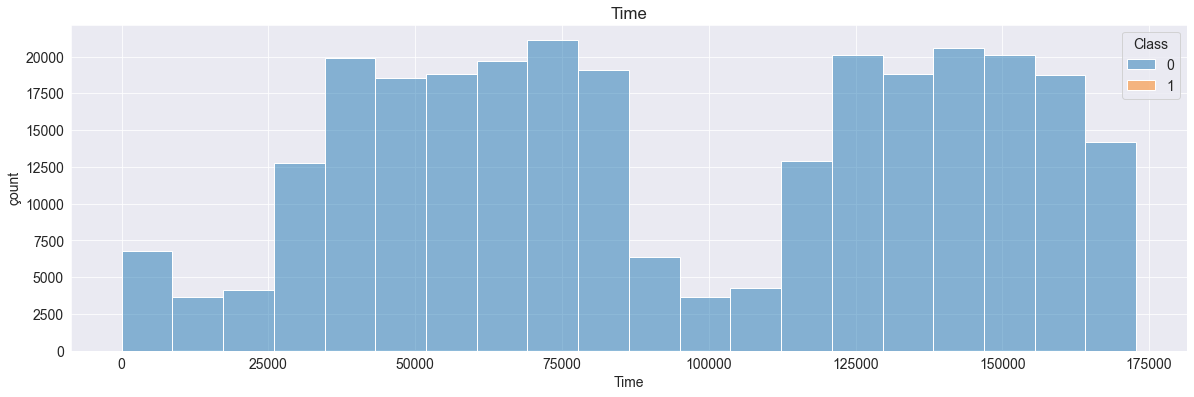

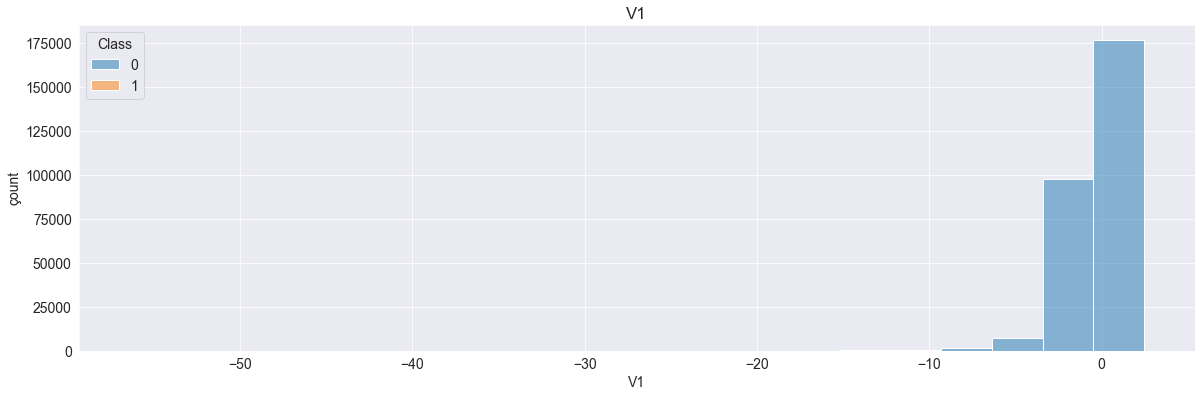

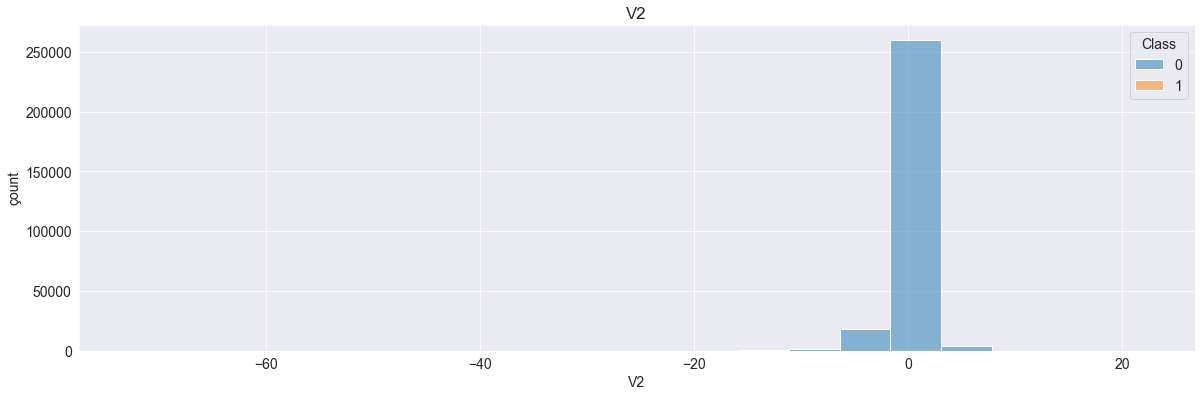

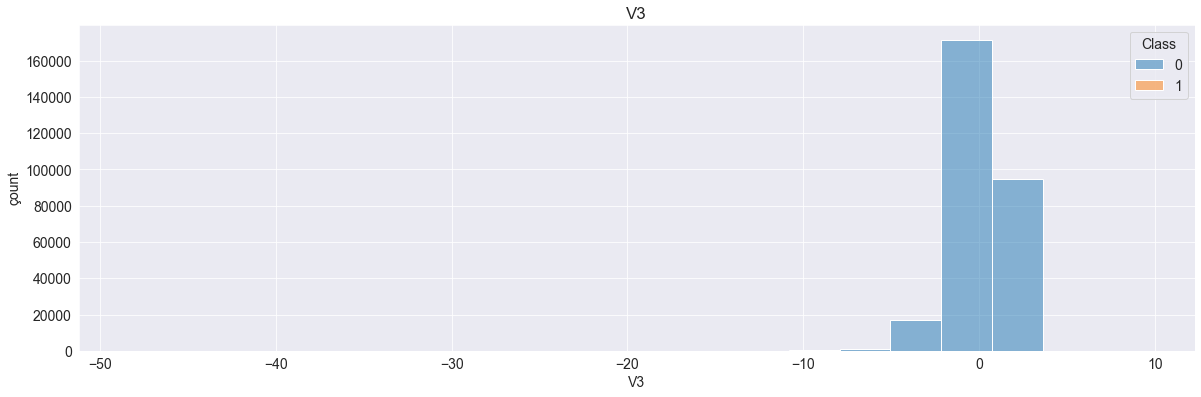

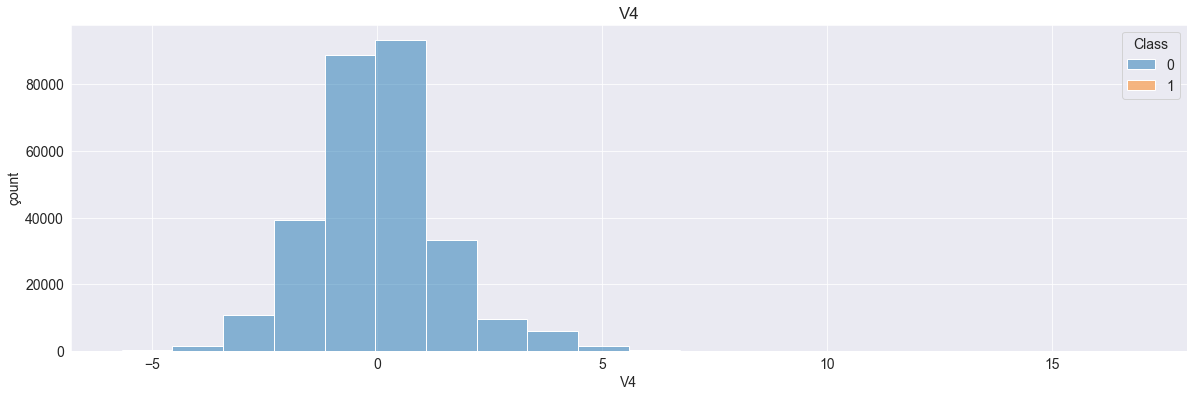

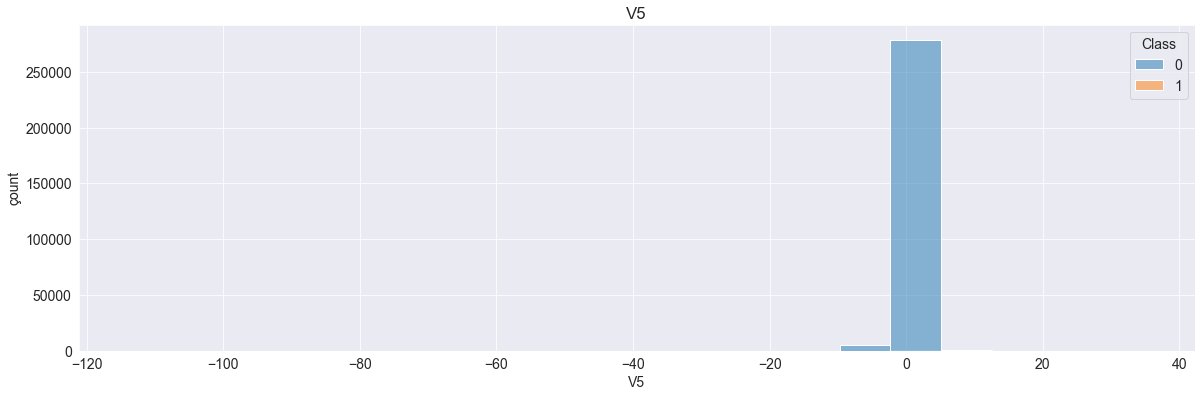

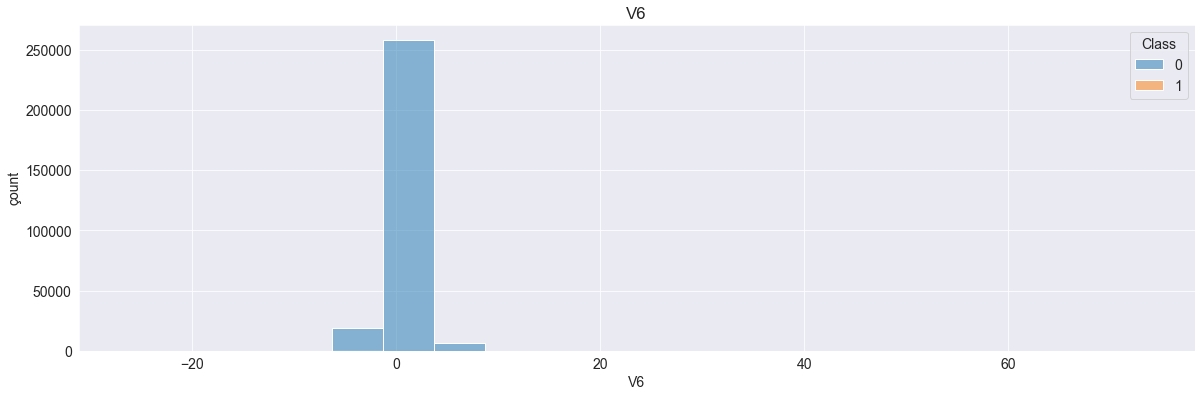

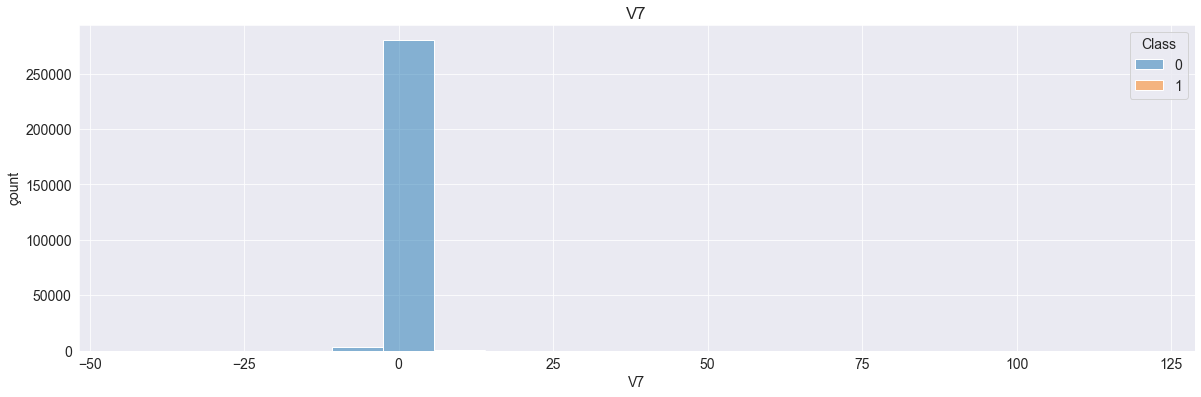

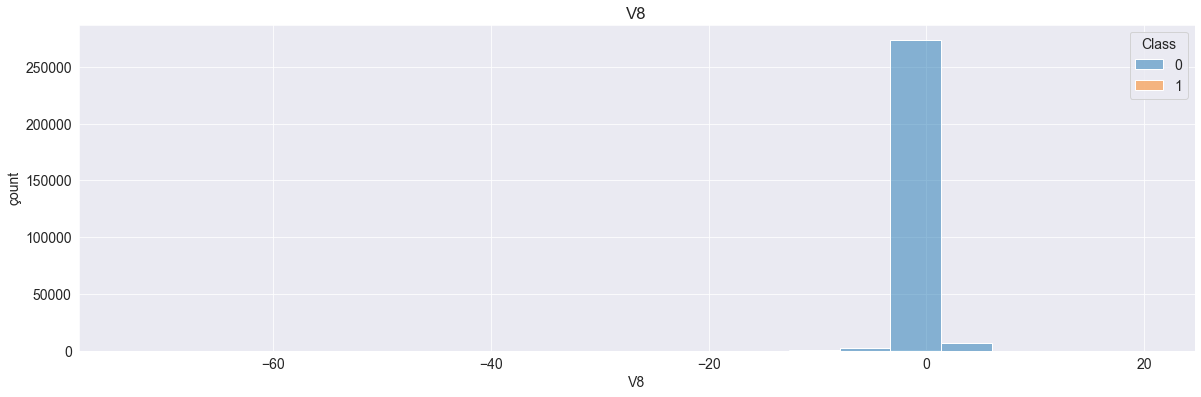

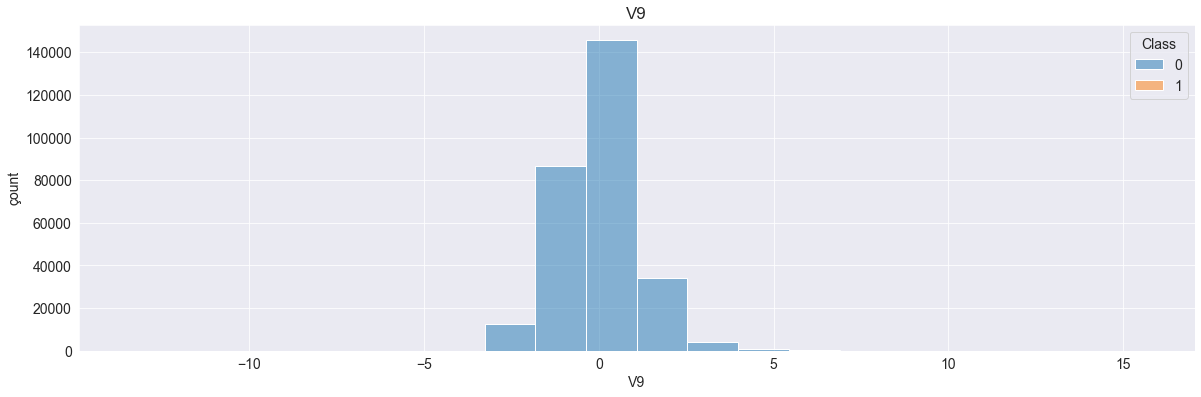

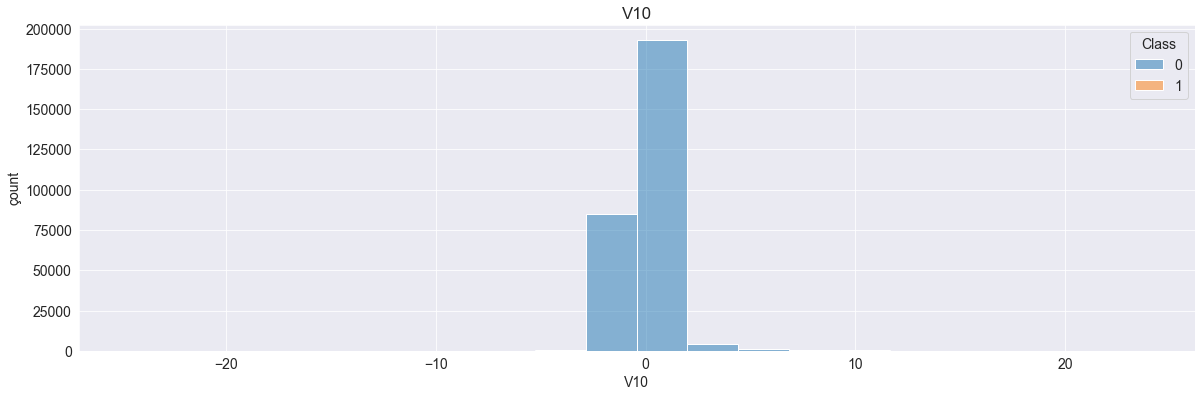

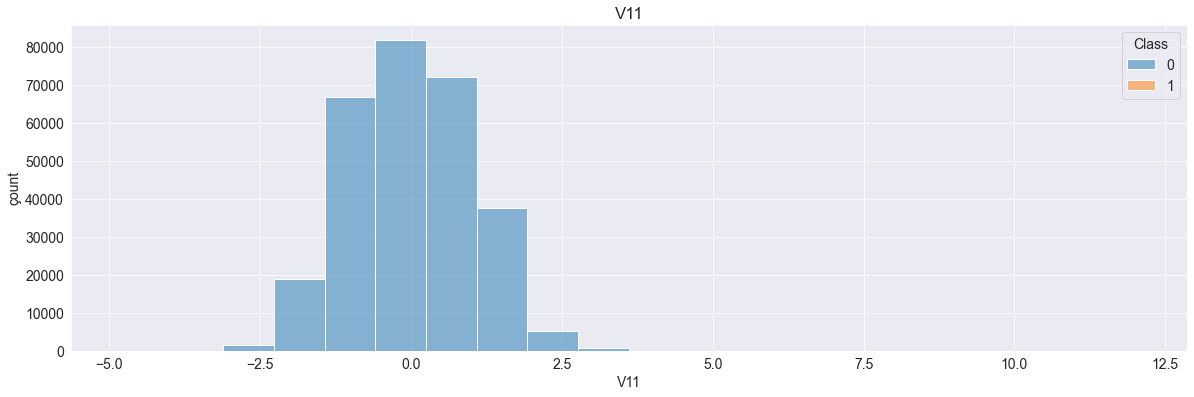

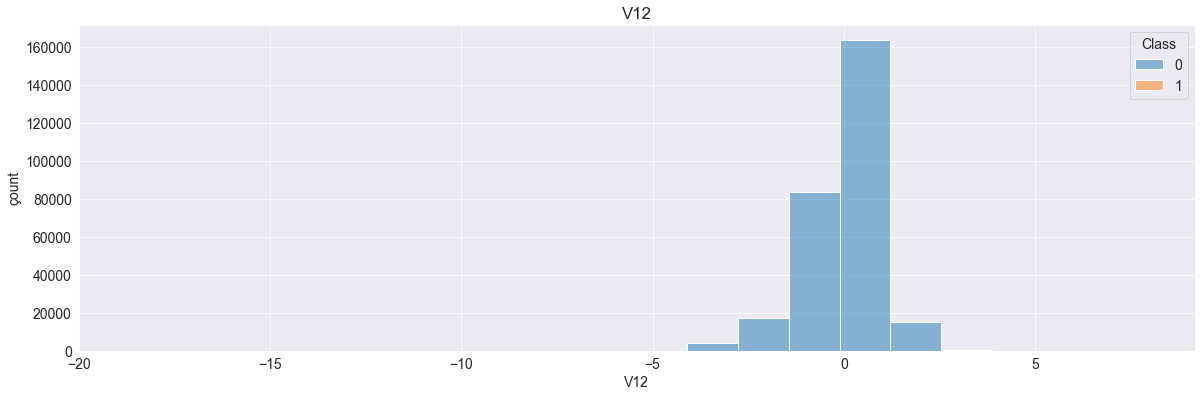

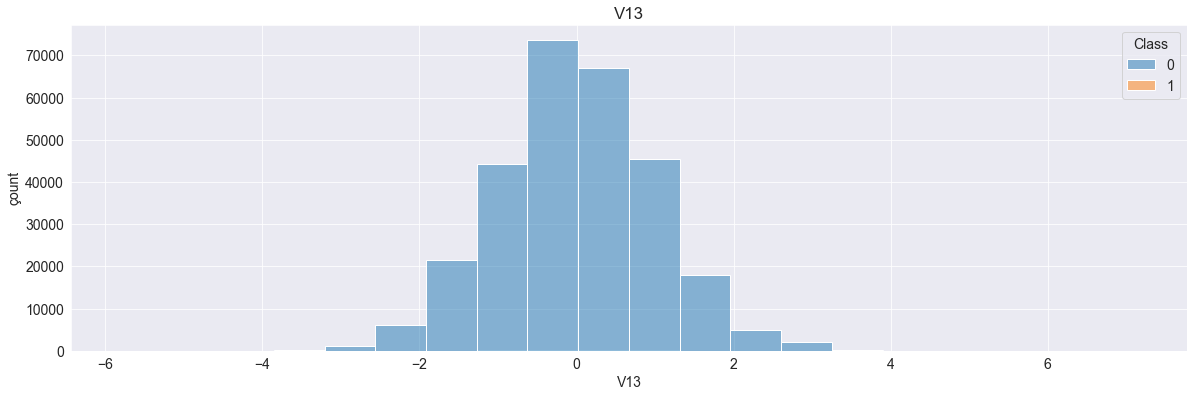

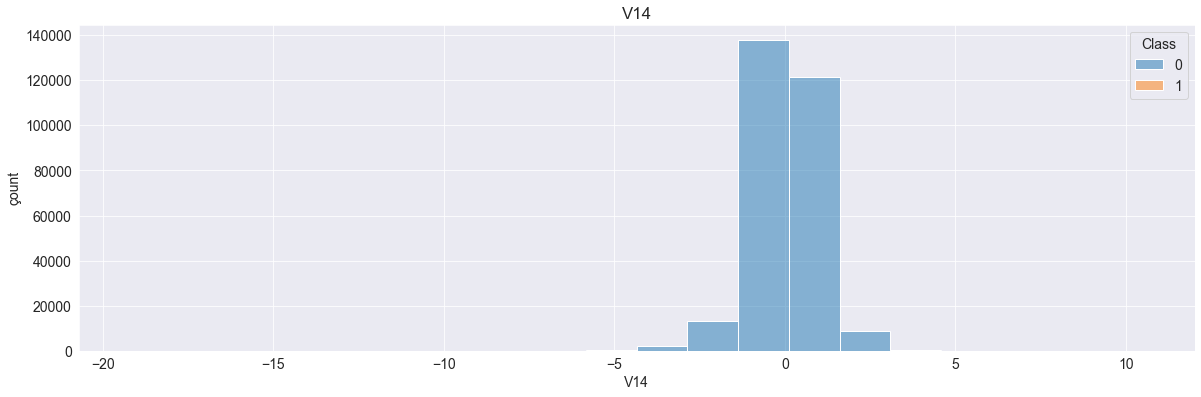

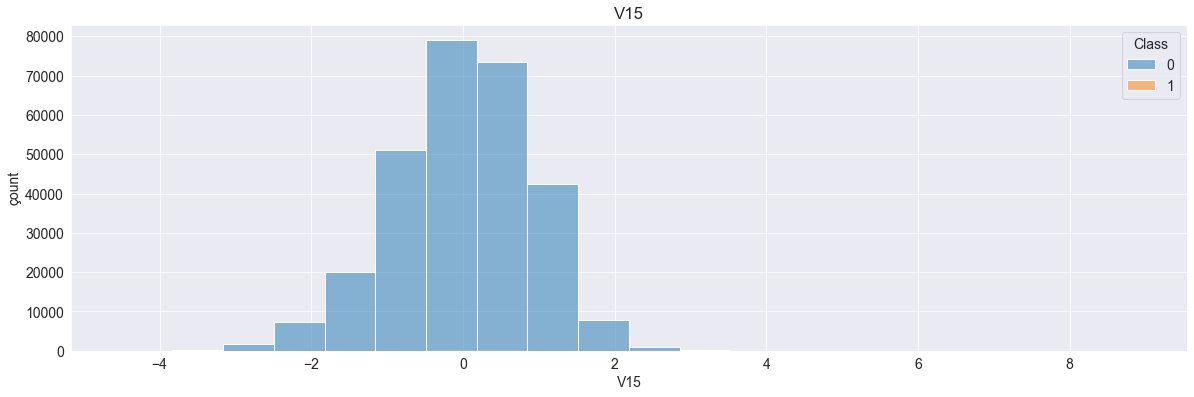

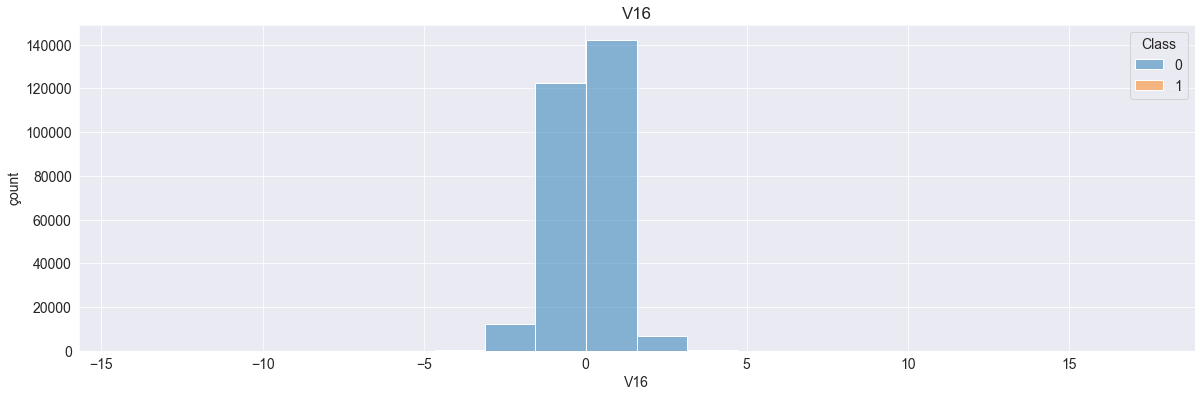

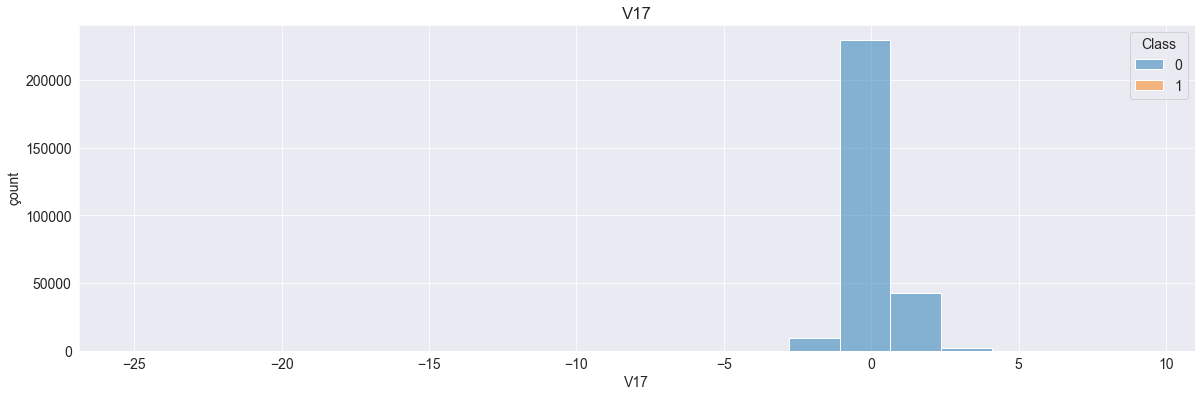

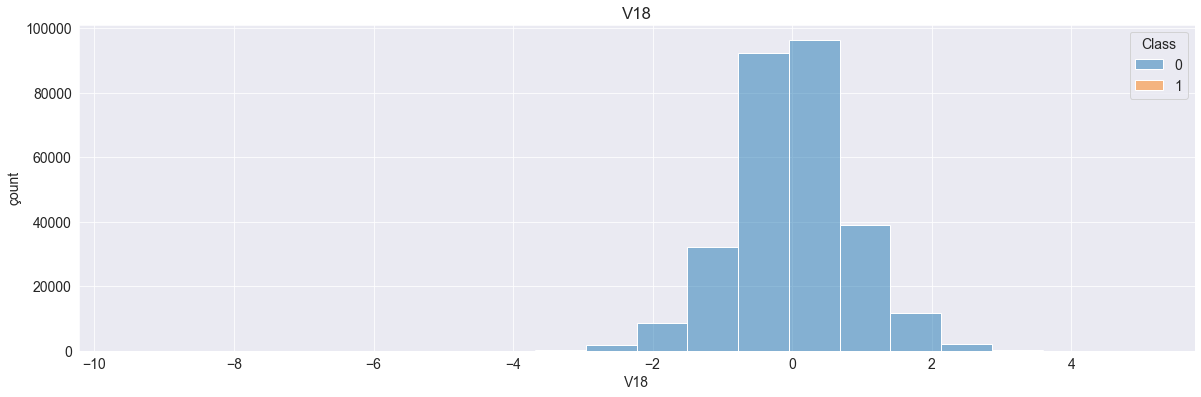

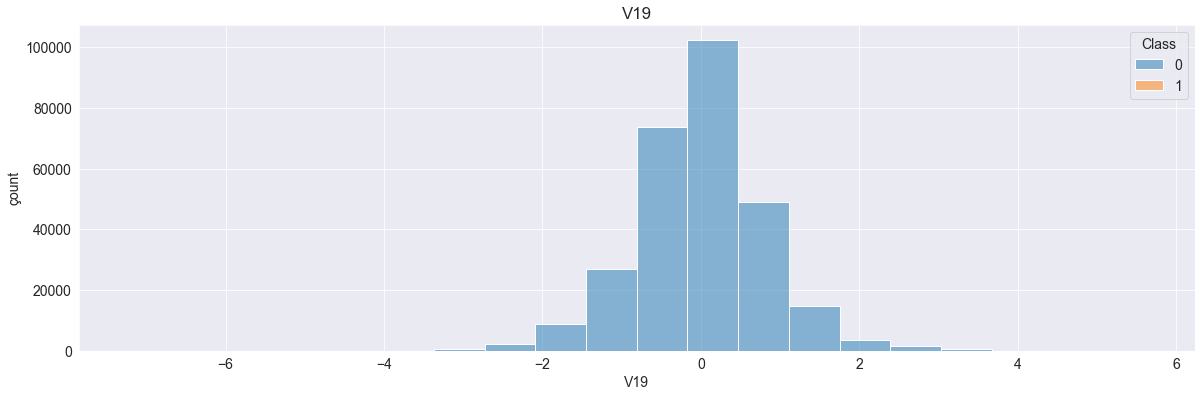

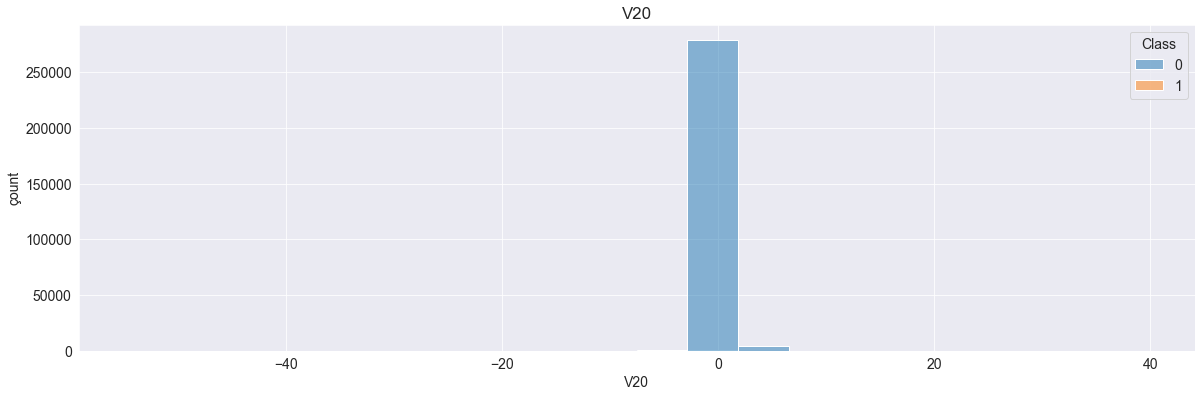

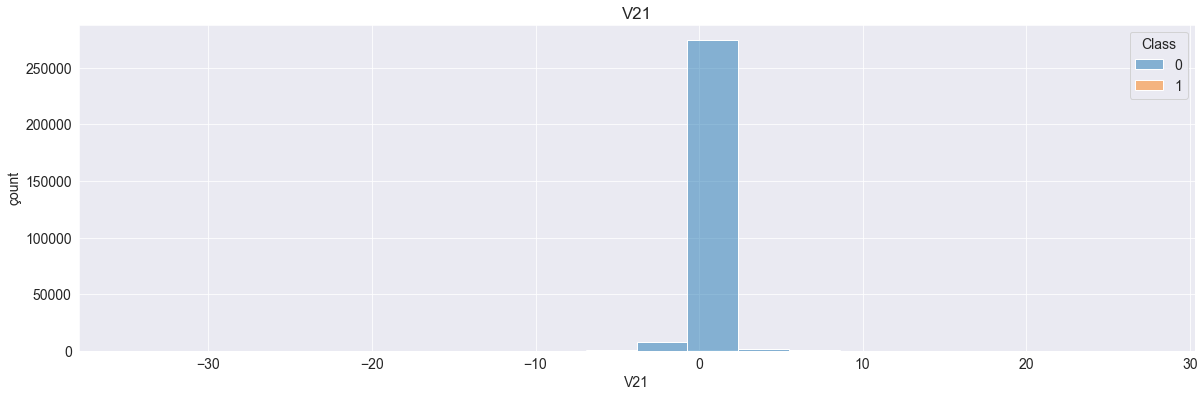

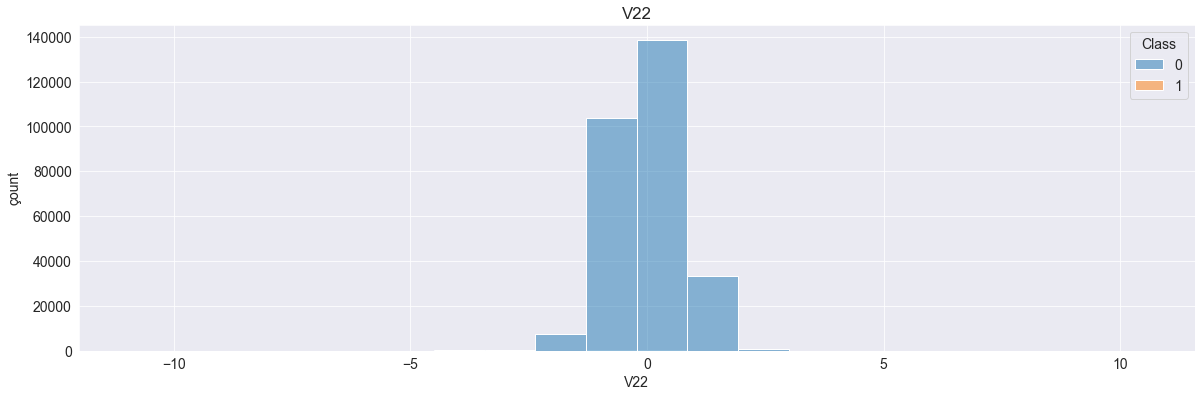

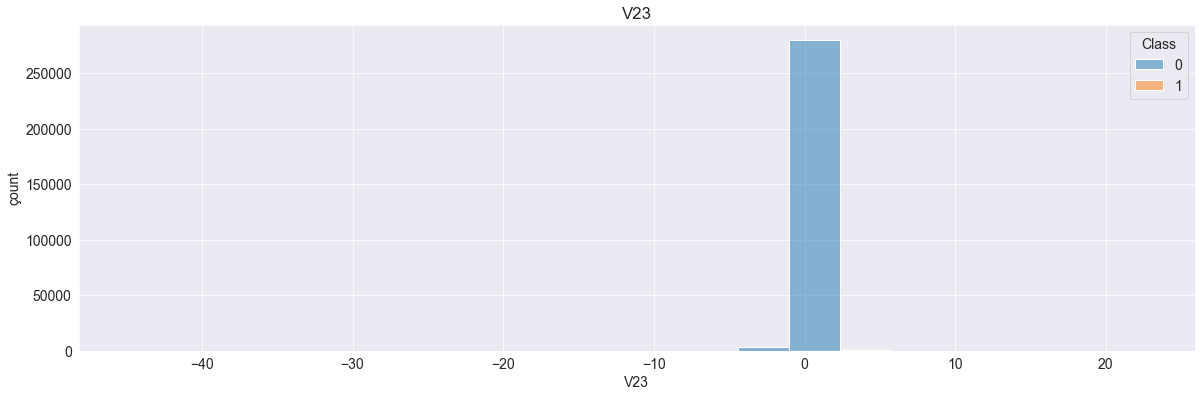

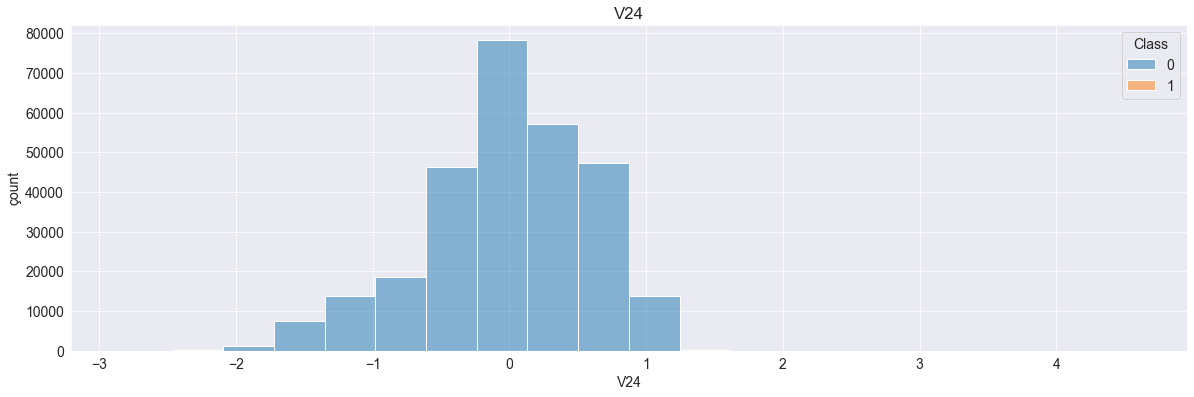

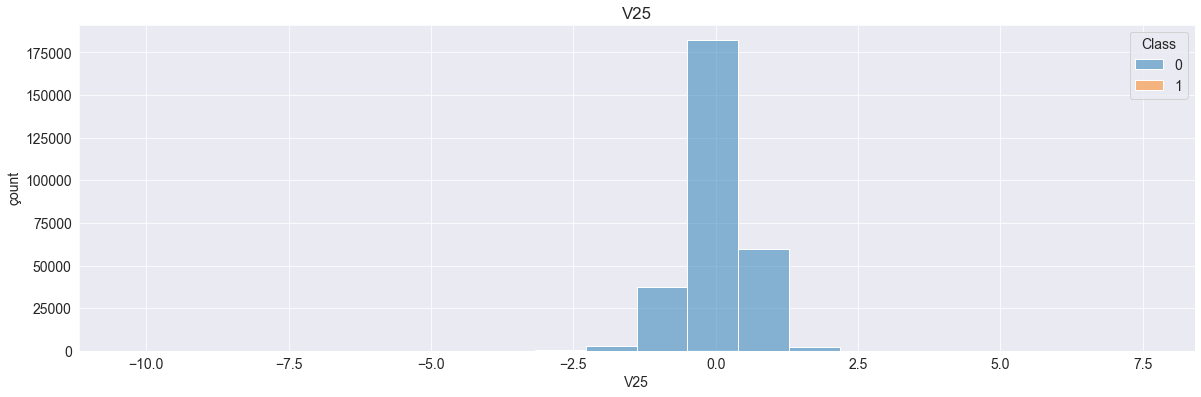

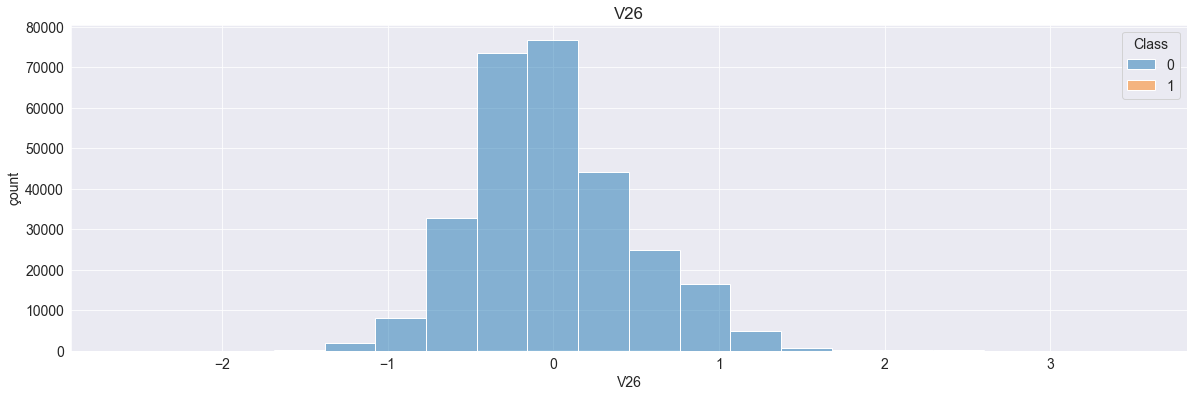

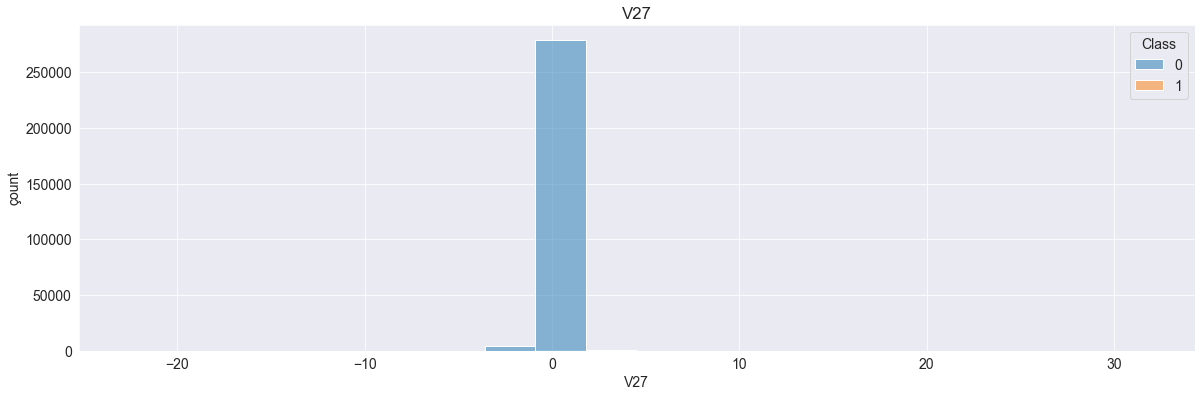

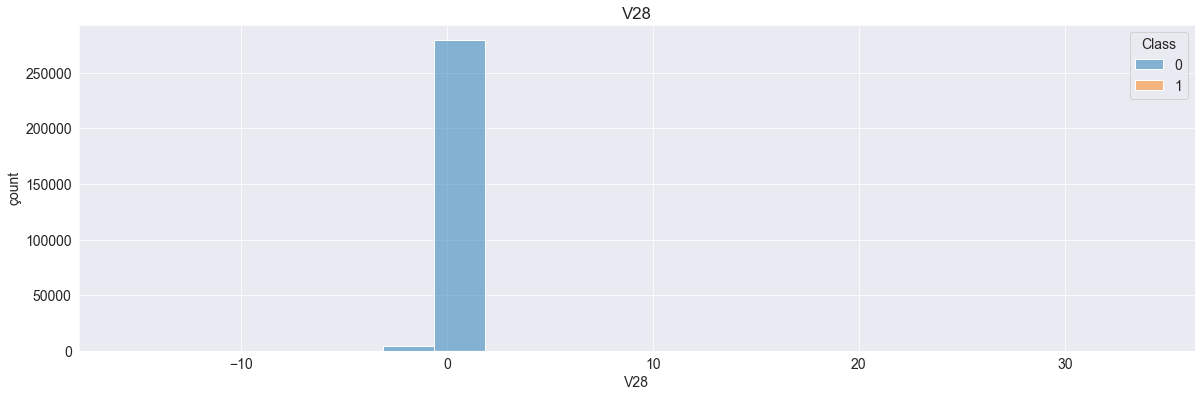

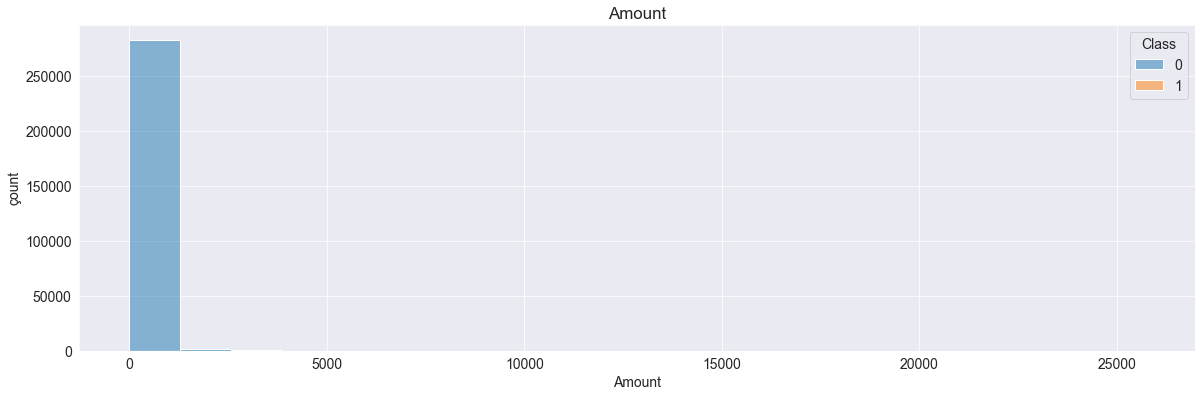

In [12]:
for feature in continuous_feature:
    sns.histplot(x= df[feature], hue= df.Class, data= df, bins=20)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('çount')
    plt.show()

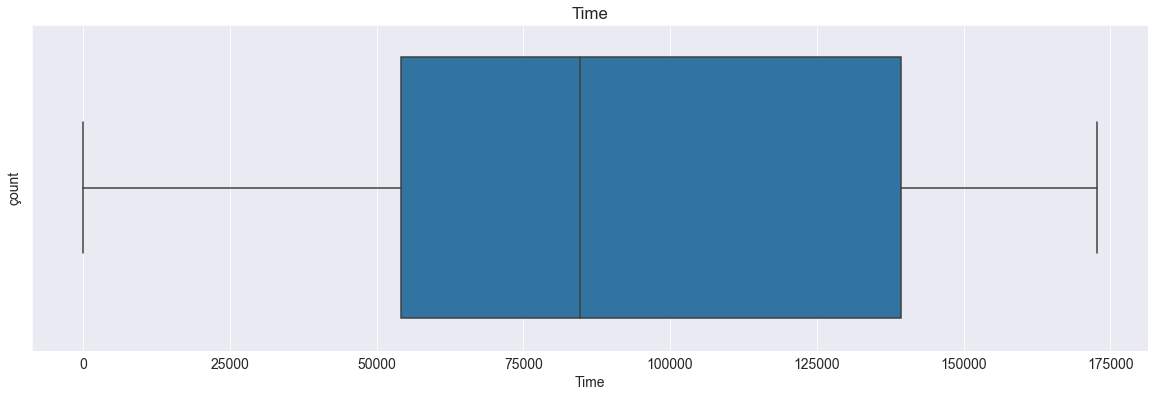

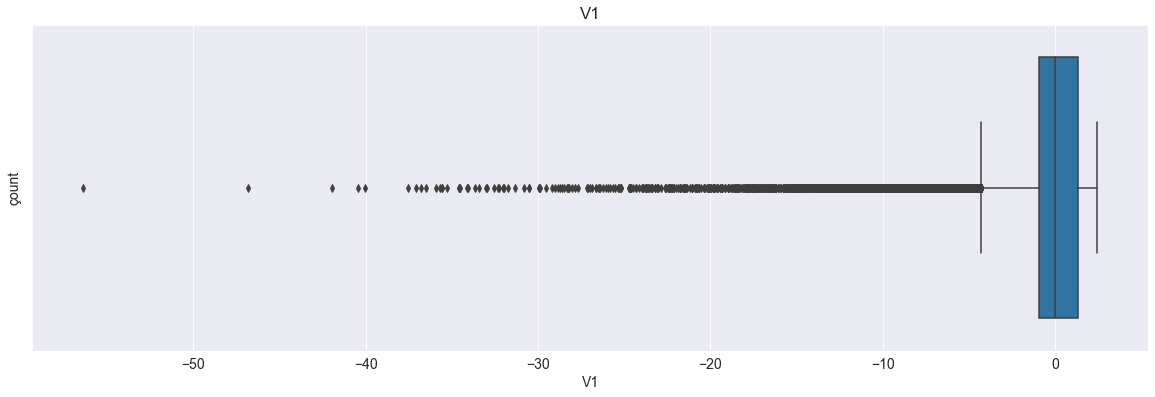

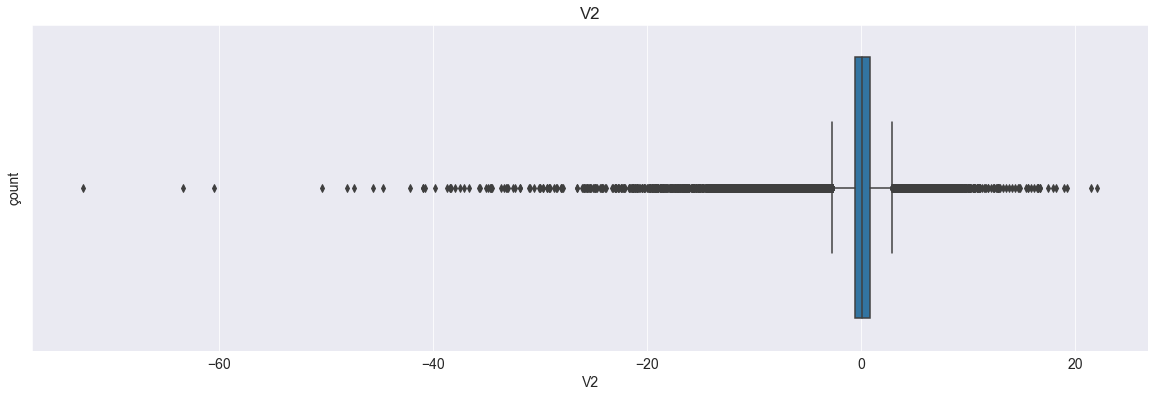

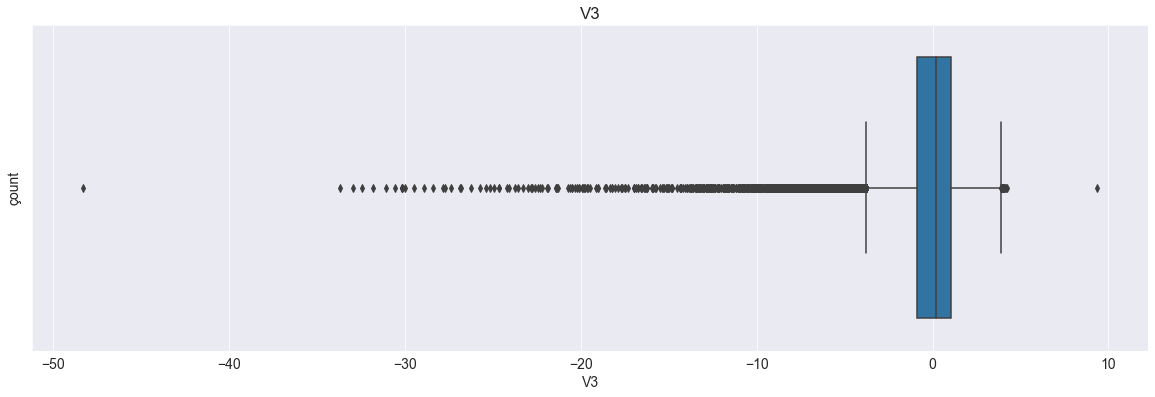

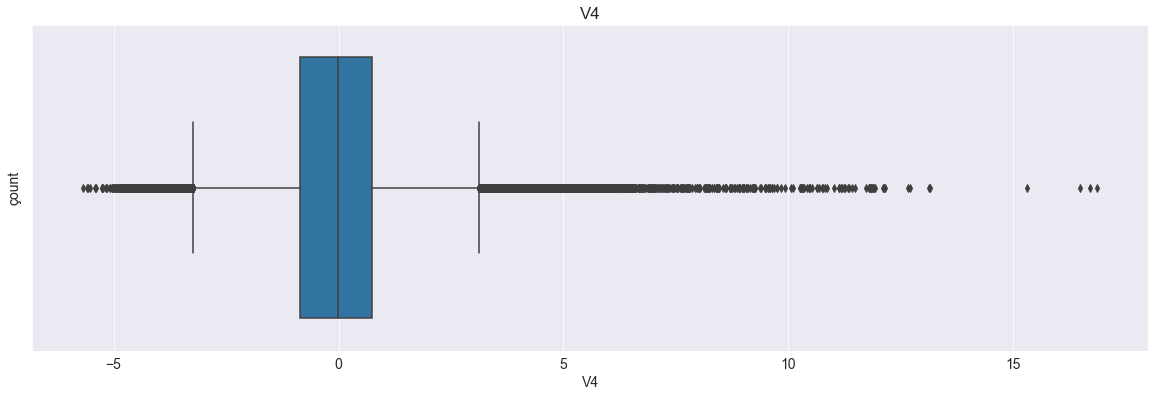

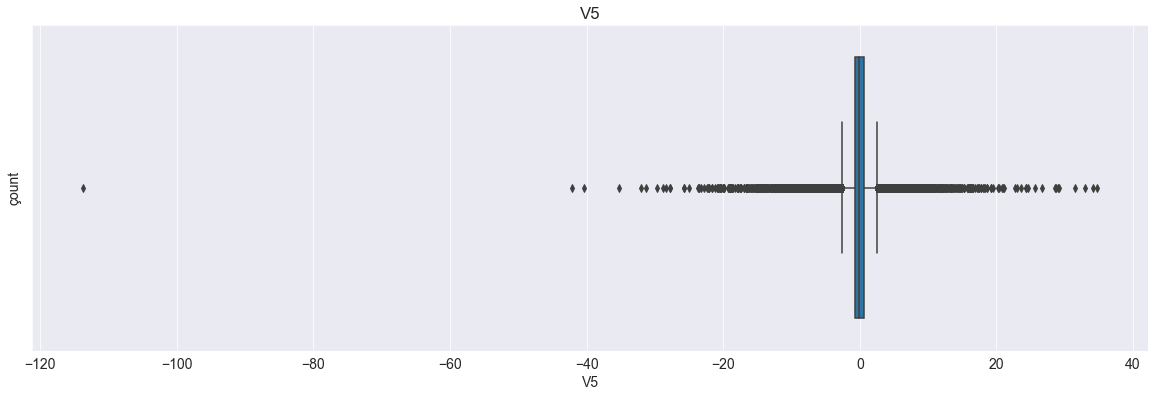

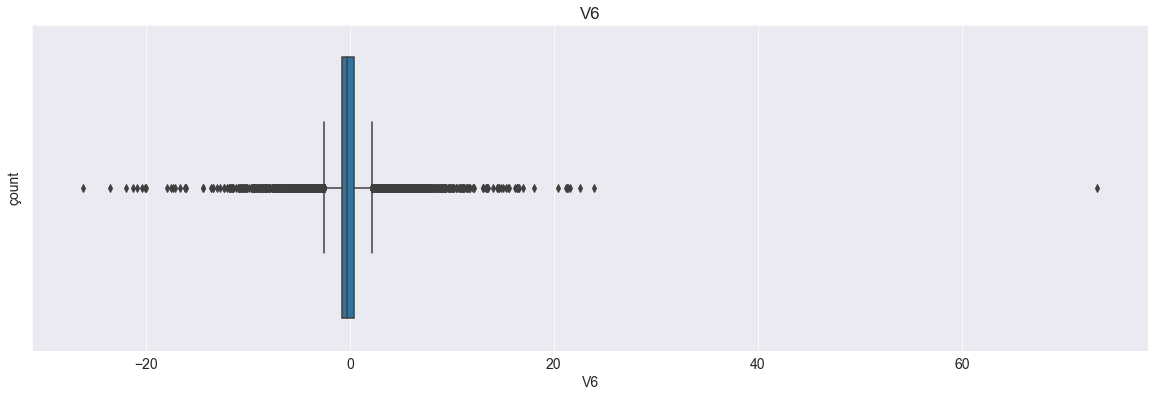

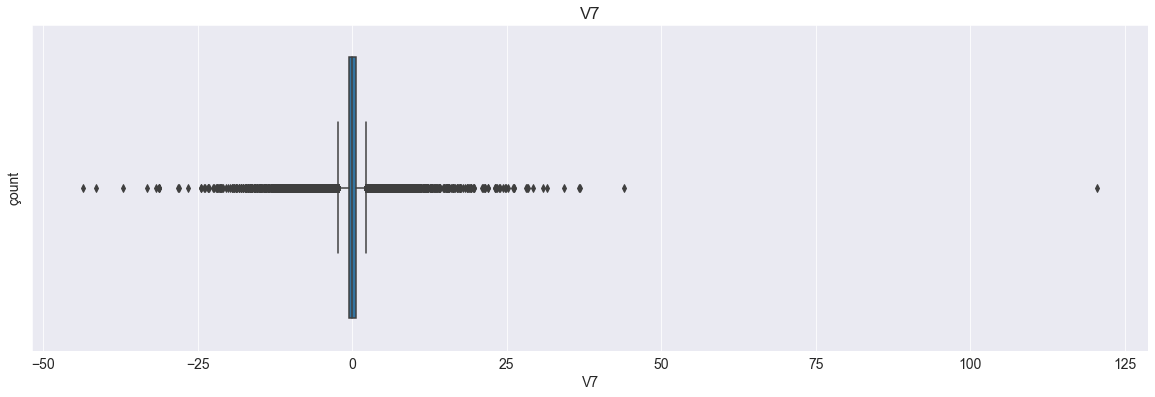

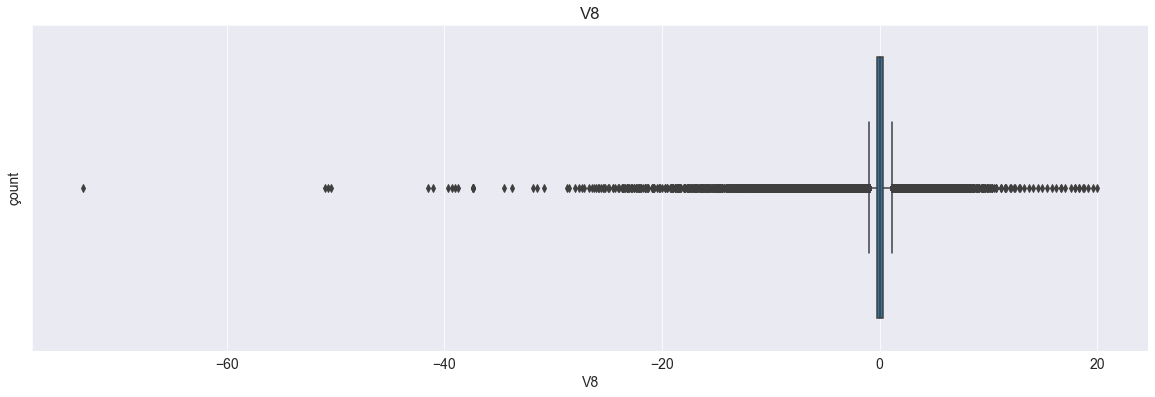

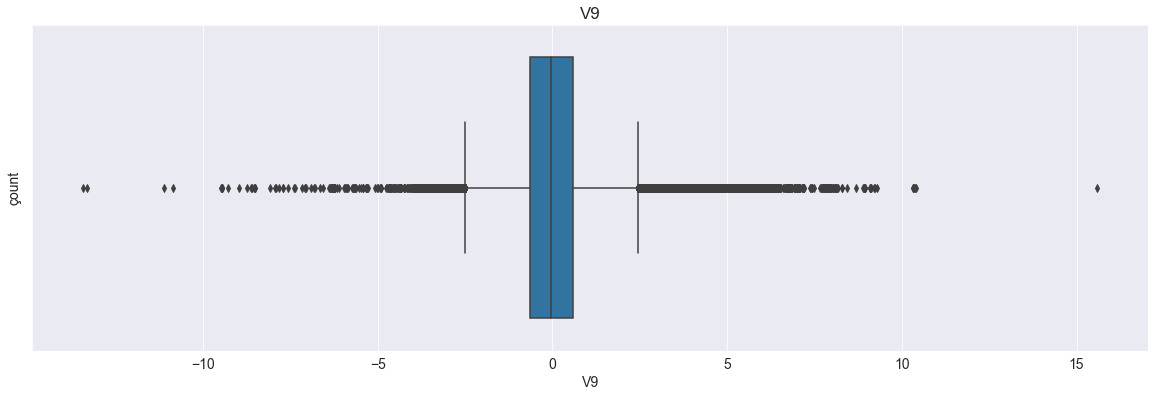

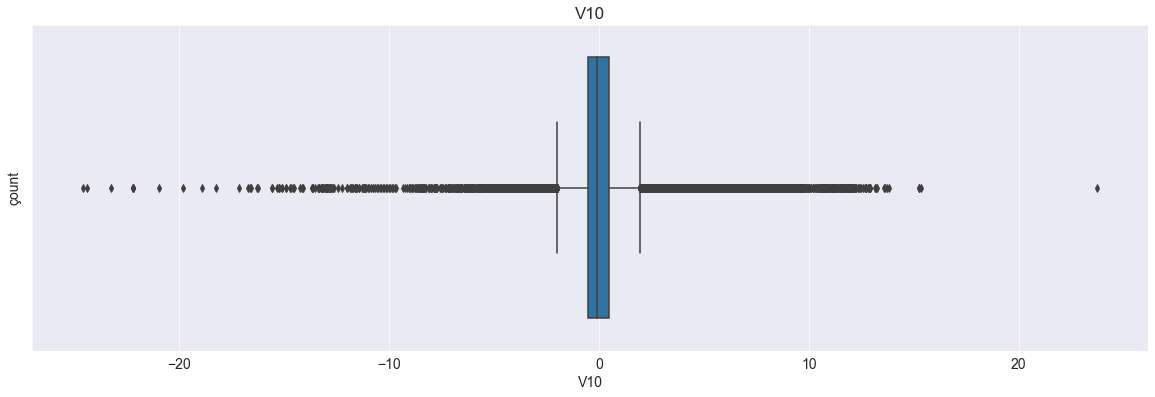

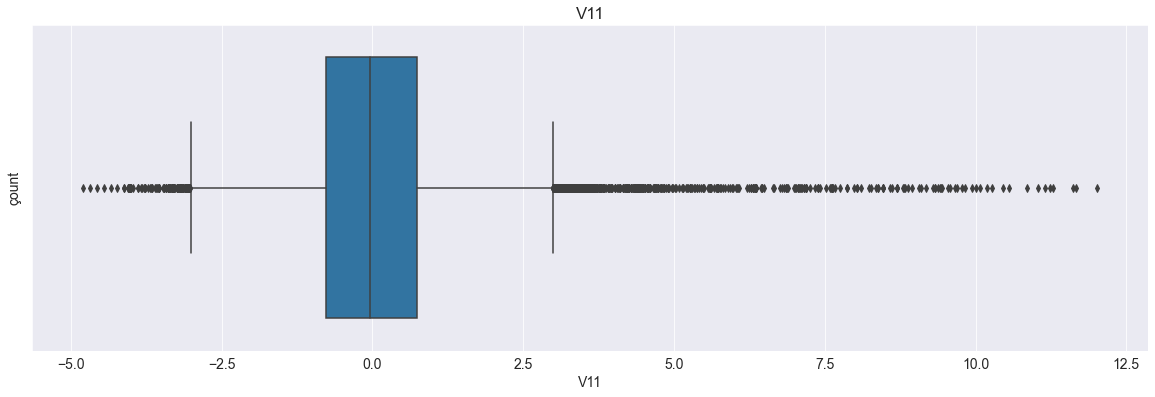

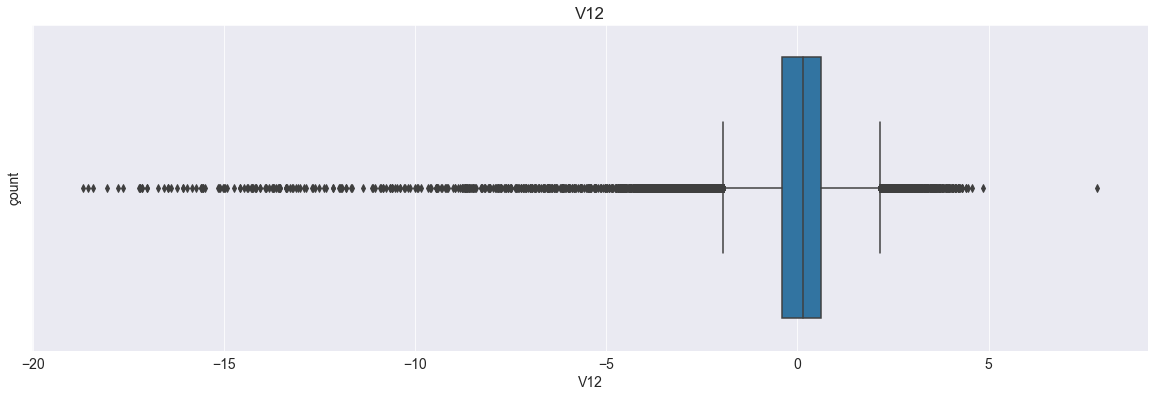

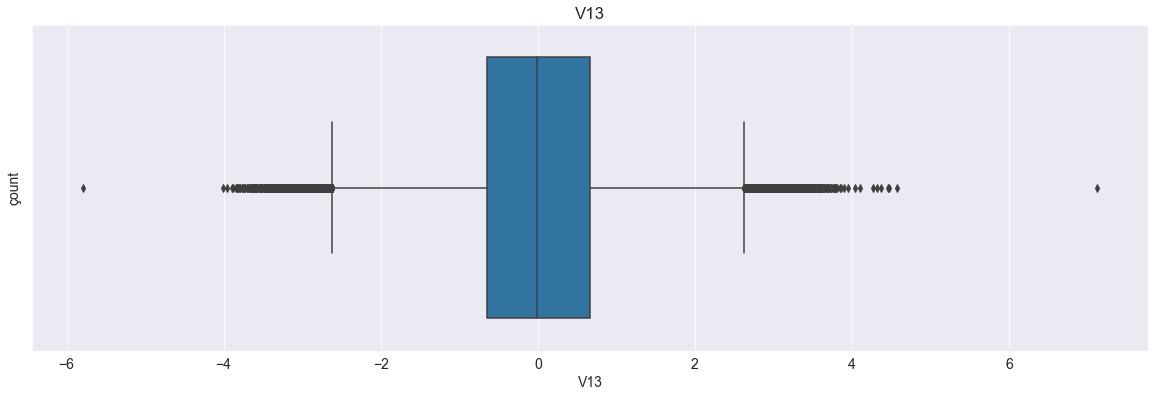

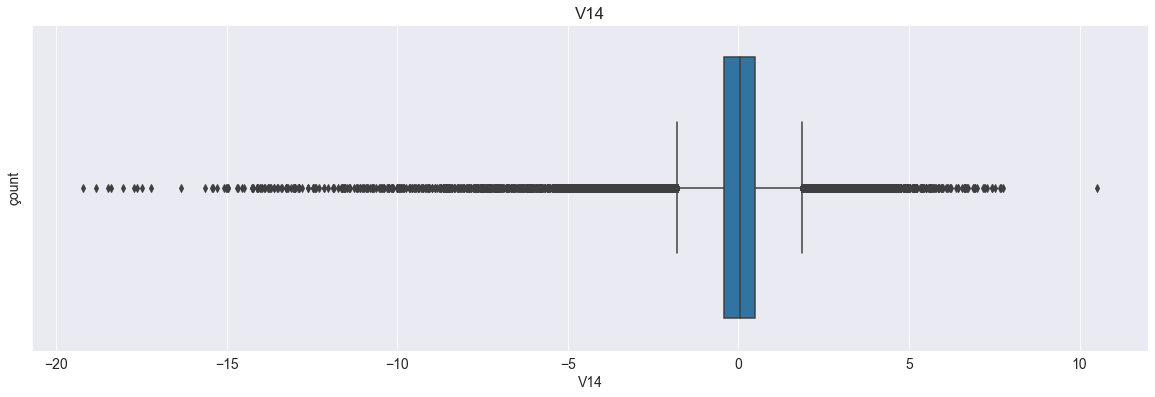

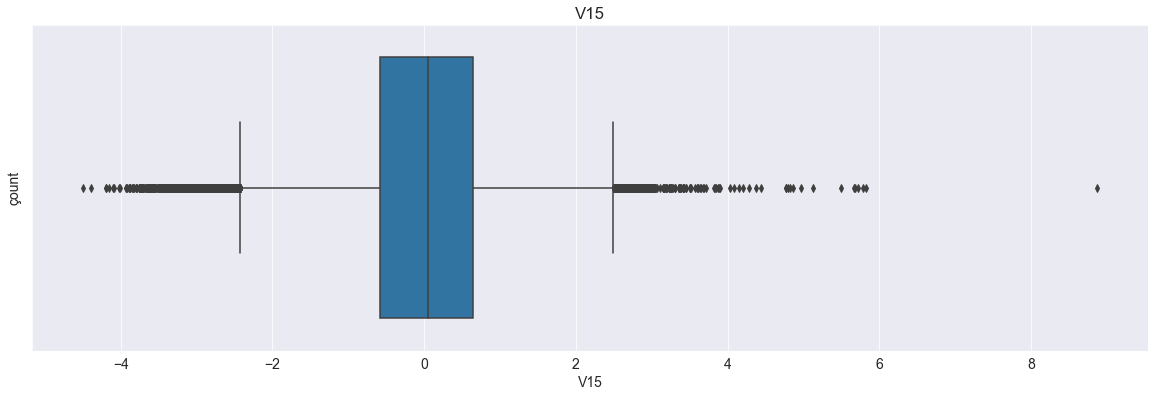

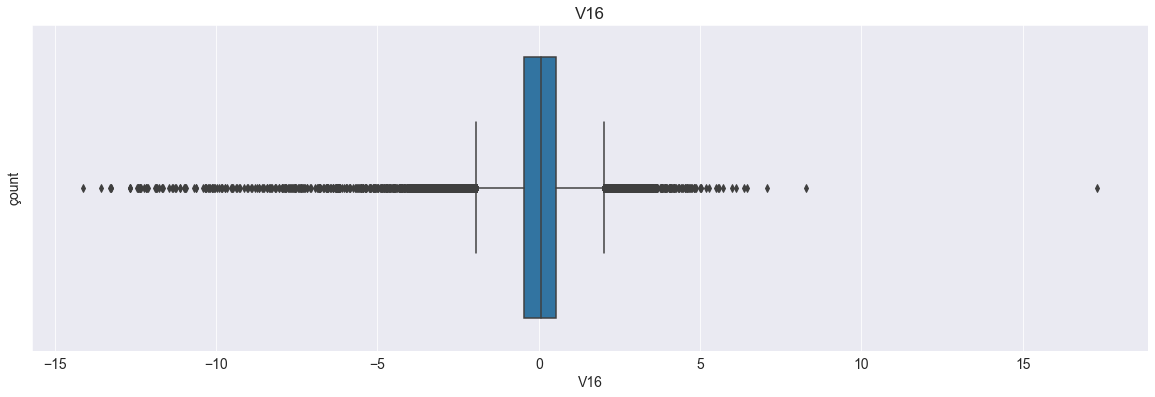

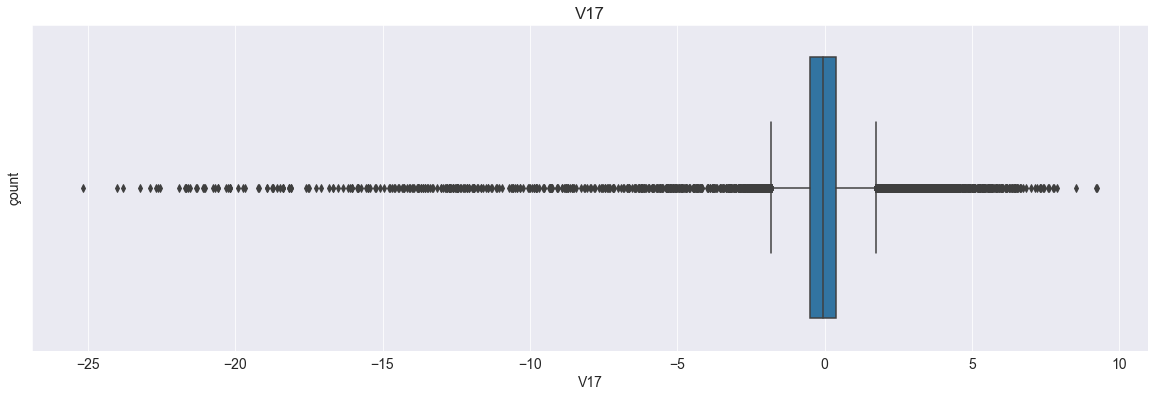

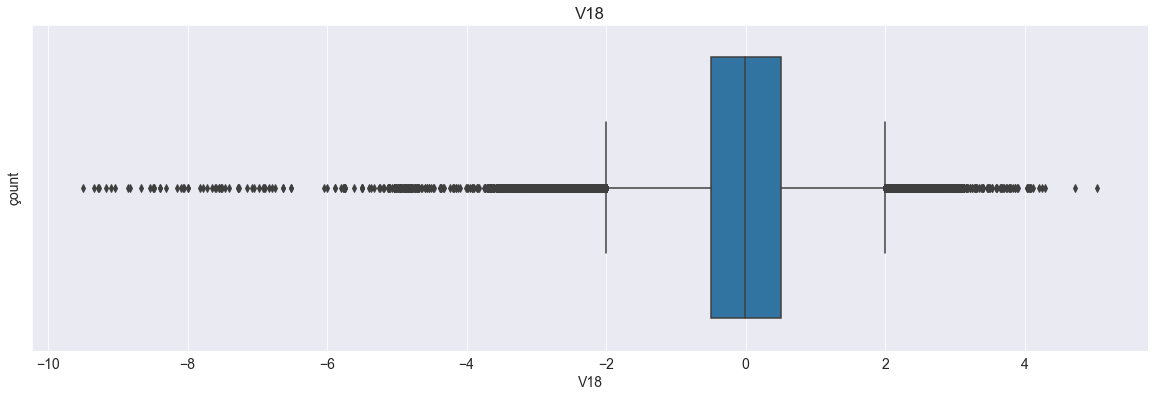

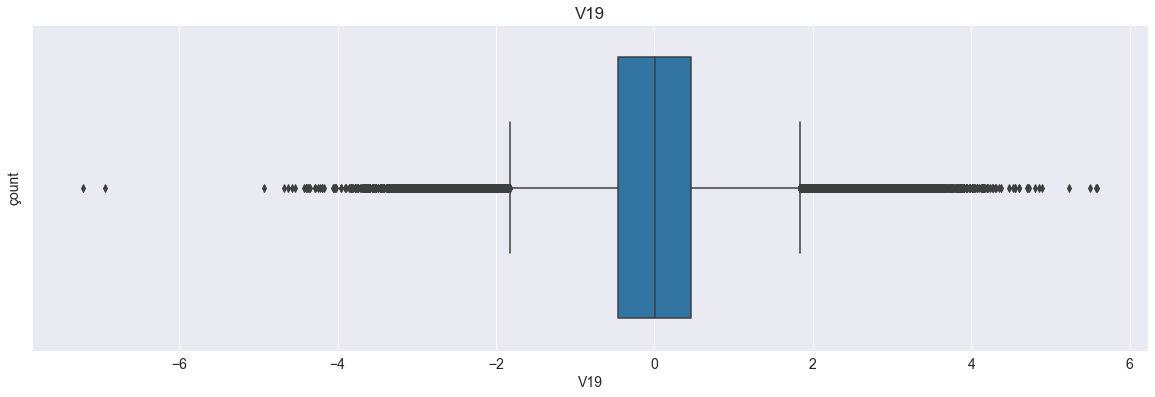

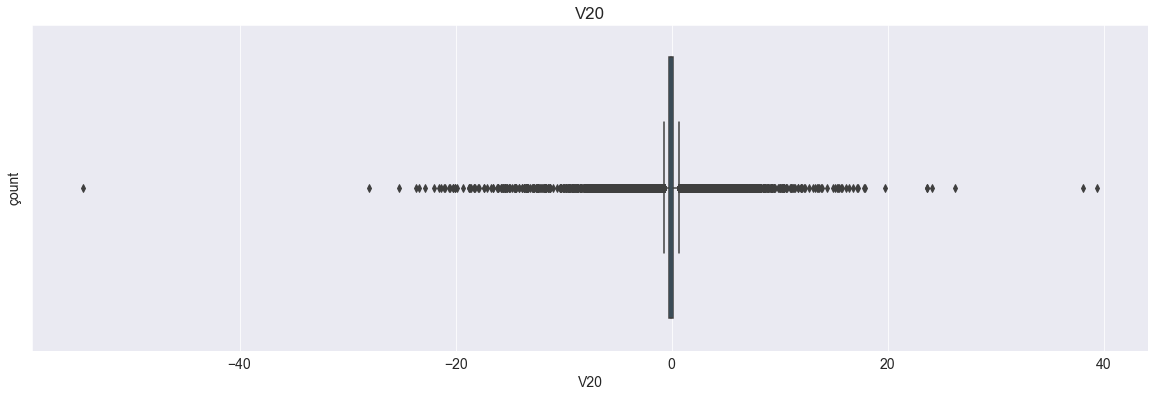

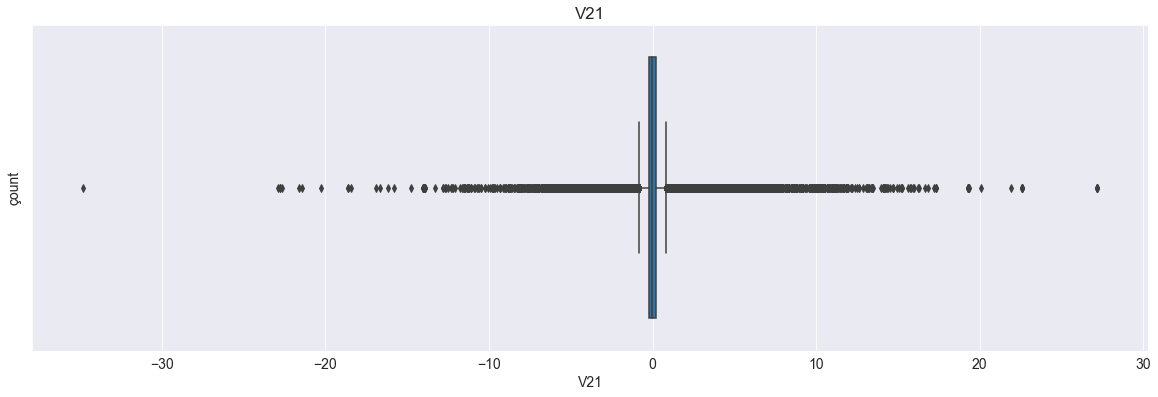

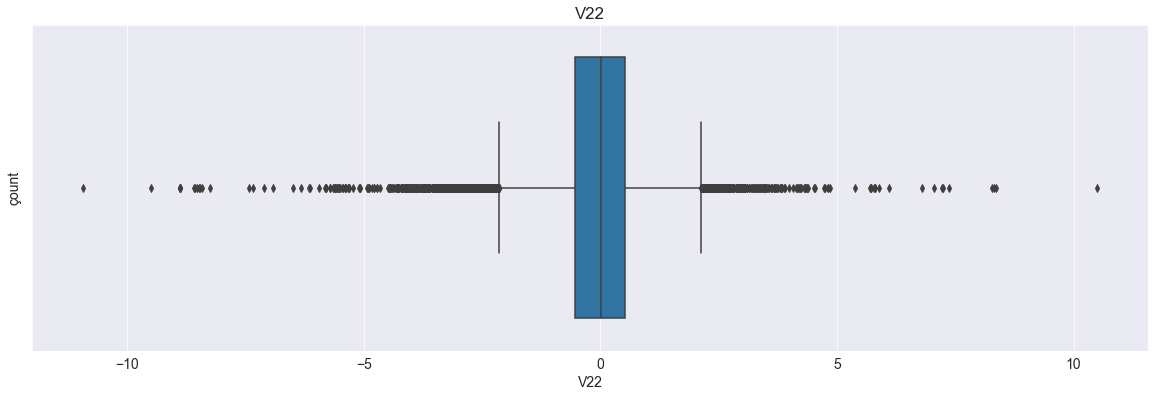

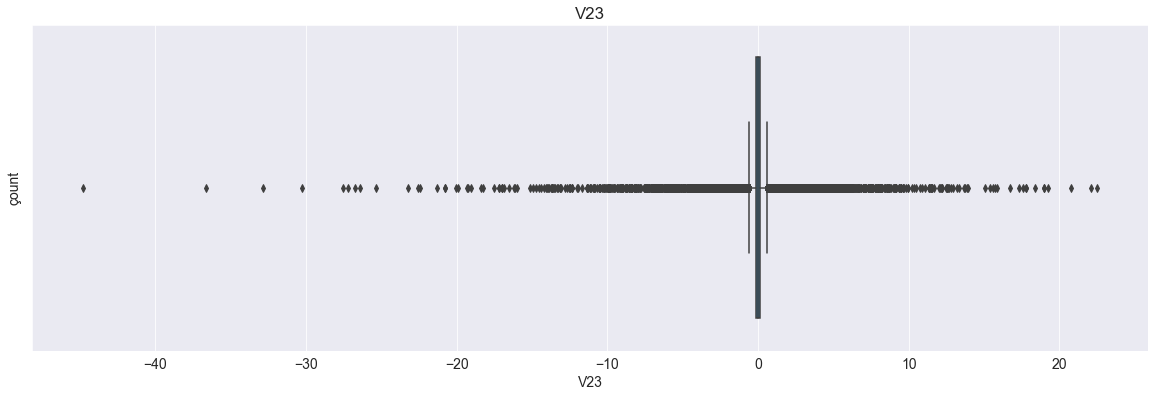

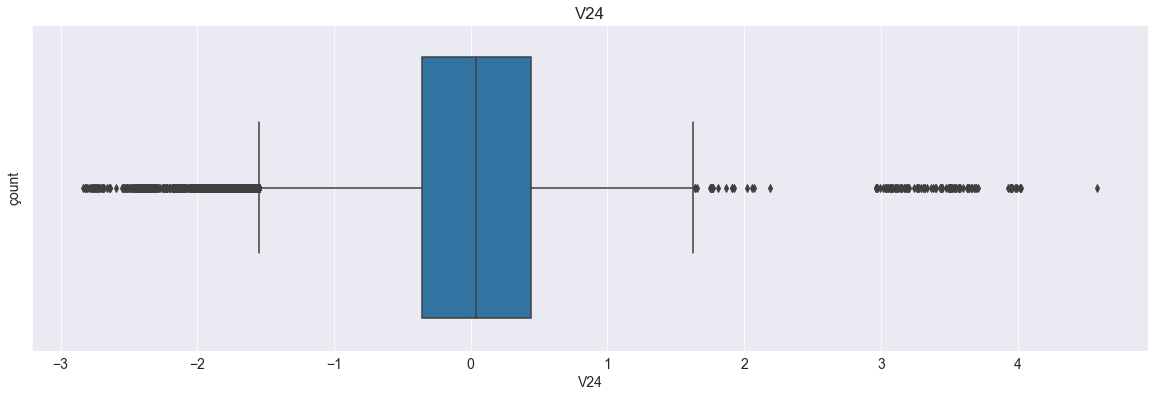

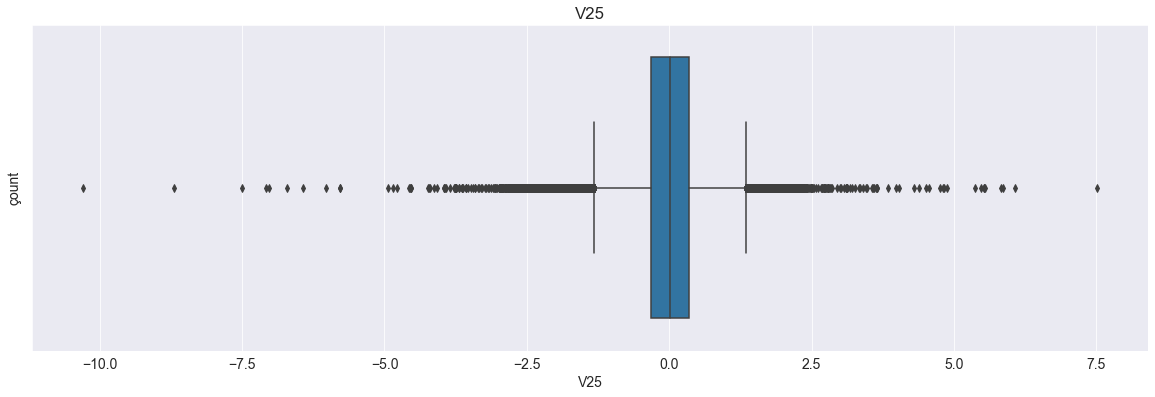

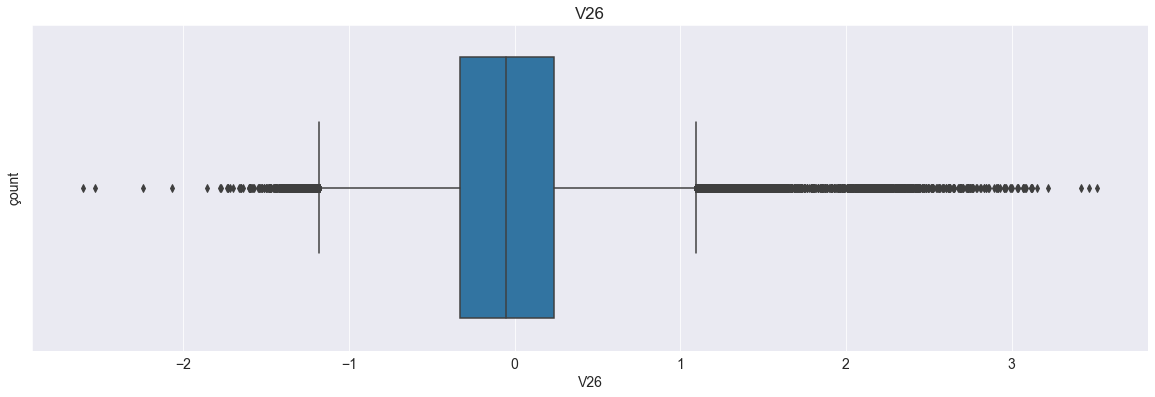

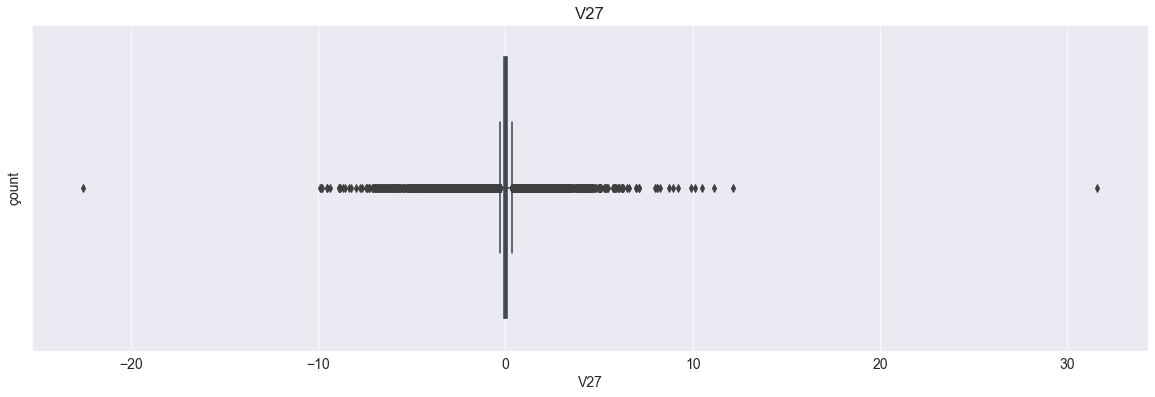

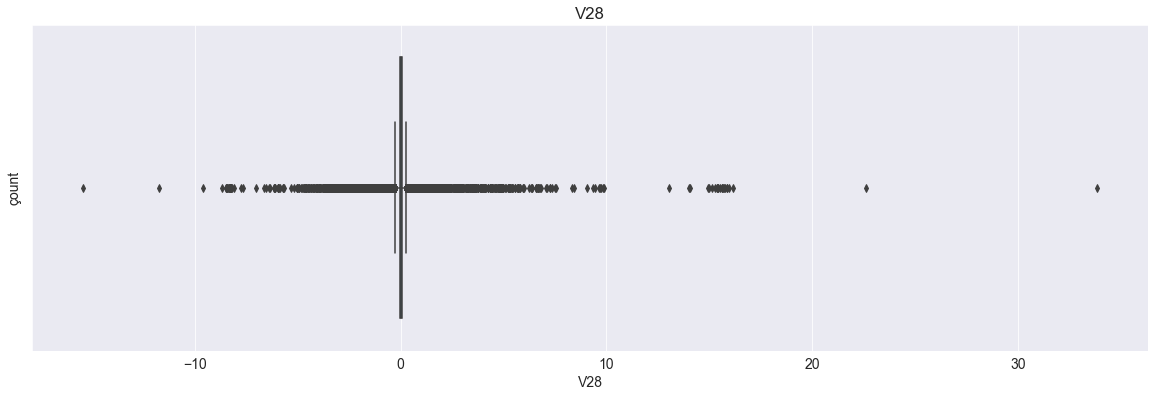

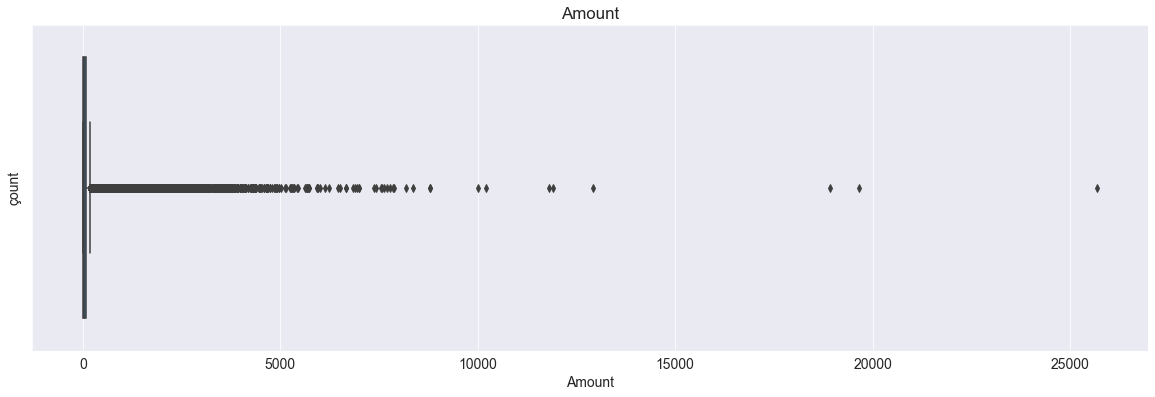

In [13]:
for feature in continuous_feature:
    sns.boxplot(x= df[feature], hue= df.Class, data= df)
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('çount')
    plt.show()

<AxesSubplot:xlabel='Amount', ylabel='V1'>

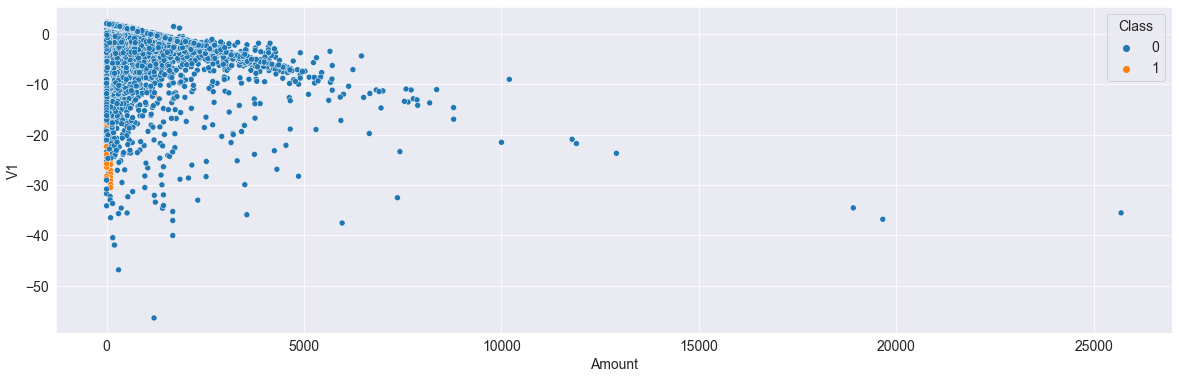

In [14]:
sns.scatterplot(x= df.Amount, y= df.V1, hue= df.Class, data = df)

<AxesSubplot:xlabel='V1', ylabel='V2'>

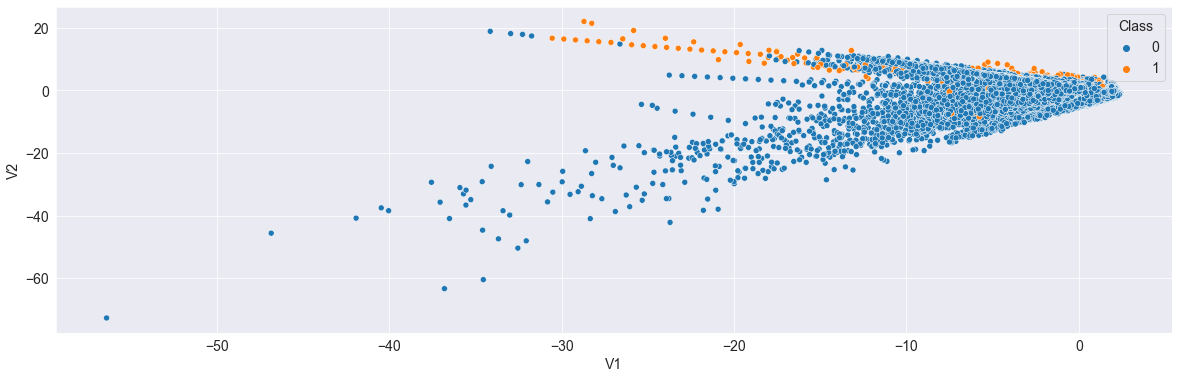

In [15]:
sns.scatterplot(x=df.V1, y=df.V2, hue= df.Class, data = df)

In [4]:
corr = round(df.corr(), 2)

In [17]:
corr

Time    V1    V2    V3    V4    V5    V6    V7    V8    V9   V10  \
Time    1.00  0.12 -0.01 -0.42 -0.11  0.17 -0.06  0.08 -0.04 -0.01  0.03   
V1      0.12  1.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00   
V2     -0.01  0.00  1.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   
V3     -0.42 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00 -0.00  0.00  0.00   
V4     -0.11 -0.00 -0.00  0.00  1.00 -0.00 -0.00 -0.00  0.00  0.00  0.00   
V5      0.17  0.00  0.00 -0.00 -0.00  1.00  0.00  0.00  0.00  0.00 -0.00   
V6     -0.06 -0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00   
V7      0.08 -0.00  0.00  0.00 -0.00  0.00  0.00  1.00  0.00  0.00 -0.00   
V8     -0.04 -0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00   
V9     -0.01 -0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00 -0.00   
V10     0.03  0.00 -0.00  0.00  0.00 -0.00  0.00 -0.00 -0.00 -0.00  1.00   
V11    -0.25  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00   
V12     0.12  0.00 -0.00  0.00 -0.00  0.00  0.00 -0.00  0.00 -0.00  0.00   
V13    -0.07 -0.00  0.00  0.00  0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00   
V14    -0.10 -0.00 -0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V15    -0.18  0.00 -0.00  0.00  0.00 -0.00 -0.00 -0.00  0.00 -0.00  0.00   
V16     0.01  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V17    -0.07 -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V18     0.09  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V19     0.03  0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00  0.00   
V20    -0.05  0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00   
V21     0.04 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00  0.00  0.00   
V22     0.14 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V23     0.05  0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00   
V24    -0.02 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00   
V25    -0.23 -0.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00   
V26    -0.04 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V27    -0.01  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00   
V28    -0.01  0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00  0.00  0.00   
Amount -0.01 -0.23 -0.53 -0.21  0.10 -0.39  0.22  0.40 -0.10 -0.04 -0.10   
Class  -0.01 -0.10  0.09 -0.19  0.13 -0.09 -0.04 -0.19  0.02 -0.10 -0.22   

         V11   V12   V13   V14   V15   V16   V17   V18   V19   V20   V21  \
Time   -0.25  0.12 -0.07 -0.10 -0.18  0.01 -0.07  0.09  0.03 -0.05  0.04   
V1      0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00   
V2      0.00 -0.00  0.00 -0.00 -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00   
V3      0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00   
V4      0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00 -0.00 -0.00 -0.00   
V5      0.00  0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V6      0.00  0.00 -0.00  0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00  0.00   
V7      0.00 -0.00  0.00  0.00 -0.00  0.00  0.00  0.00 -0.00  0.00 -0.00   
V8      0.00  0.00 -0.00 -0.00  0.00 -0.00 -0.00 -0.00 -0.00  0.00  0.00   
V9      0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00  0.00 -0.00 -0.00  0.00   
V10    -0.00  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00   
V11     1.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00 -0.00 -0.00 -0.00   
V12     0.00  1.00 -0.00  0.00 -0.00  0.00  0.00  0.00  0.00  0.00  0.00   
V13     0.00 -0.00  1.00  0.00  0.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V14     0.00  0.00  0.00  1.00 -0.00 -0.00  0.00  0.00  0.00 -0.00 -0.00   
V15     0.00 -0.00  0.00 -0.00  1.00  0.00  0.00  0.00 -0.00  0.00  0.00   
V16     0.00  0.00  0.00 -0.00  0.00  1.00  0.00 -0.00  0.00  0.00 -0.00   
V17     0.00  0.00  0.00  0.00  0.00  0.00  1.00 -0.00 -0.00 -0.00 -0.00   
V18     0.00  0.00  0.00  0.00  0.00 -0.00 -0.00  1.00 -0.00 -0.00 -0.00   
V19    -0.00  0.00 -0.00  0.00 -0.00  0.00 -0.00 -0.00 

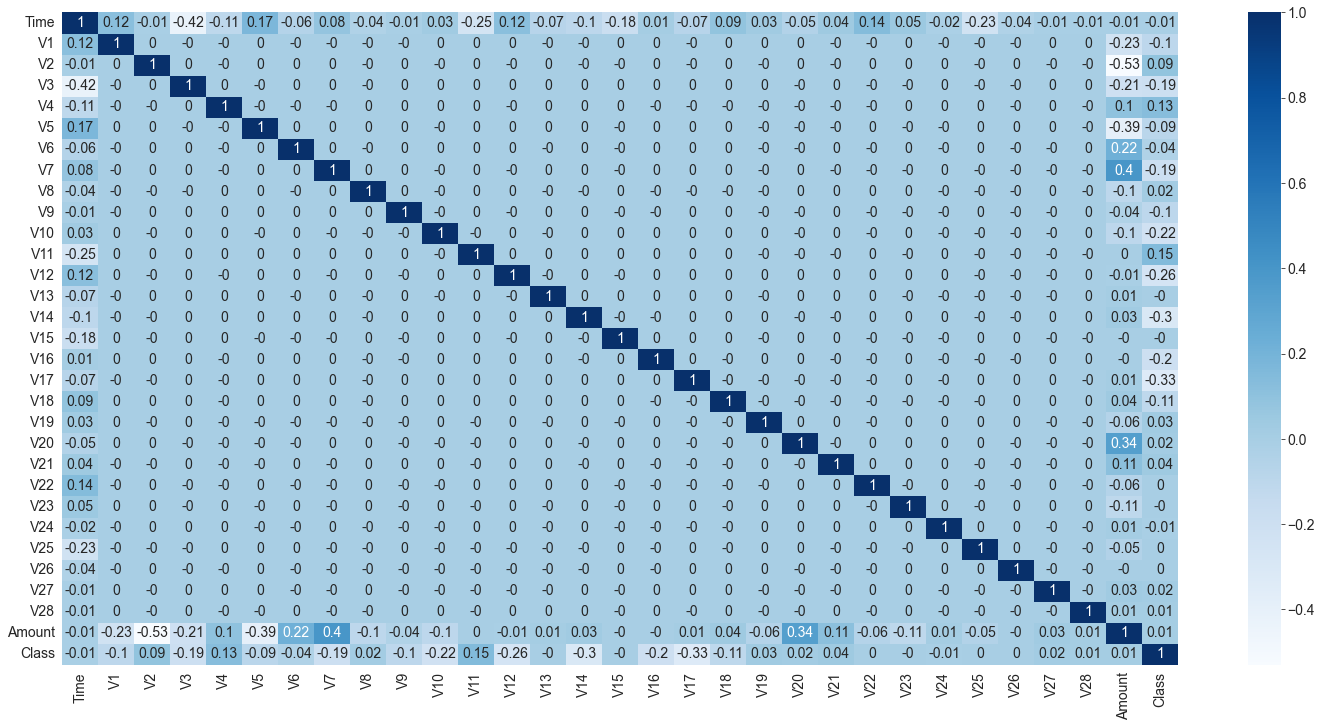

In [18]:
plt.figure(figsize=(25,12))
sns.heatmap(corr, cbar=True, annot = True, cmap= 'Blues')
plt.show()

In [19]:
# sns.pairplot(df.drop('Class', axis=1), kind='scatter', diag_kind='hist', palette='Rainbow')
# plt.show()

In [20]:
df.Class.value_counts()/len(df.Class)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [5]:
X= df.iloc[:,:-1]
y = df.Class

In [6]:
X.shape, y.shape

((284807, 30), (284807,))

## Train test split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train.shape, y_train.shape

((190820, 30), (190820,))

In [10]:
X_test.shape, y_test.shape

((93987, 30), (93987,))

## Balance Dataset

In [11]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [12]:
smk = SMOTETomek(random_state=42)

In [13]:
X_train, y_train = smk.fit_resample(X_train, y_train)
X_test, y_test = smk.fit_resample(X_test, y_test)

In [14]:
X_train.shape, y_train.shape

((379756, 30), (379756,))

In [15]:
X_test.shape, y_test.shape

((186406, 30), (186406,))

In [16]:
cols = X_train.columns

In [17]:
df1 = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis=1)
df2 = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)

In [18]:
balanced_df = pd.concat([df1,df2], axis=0)

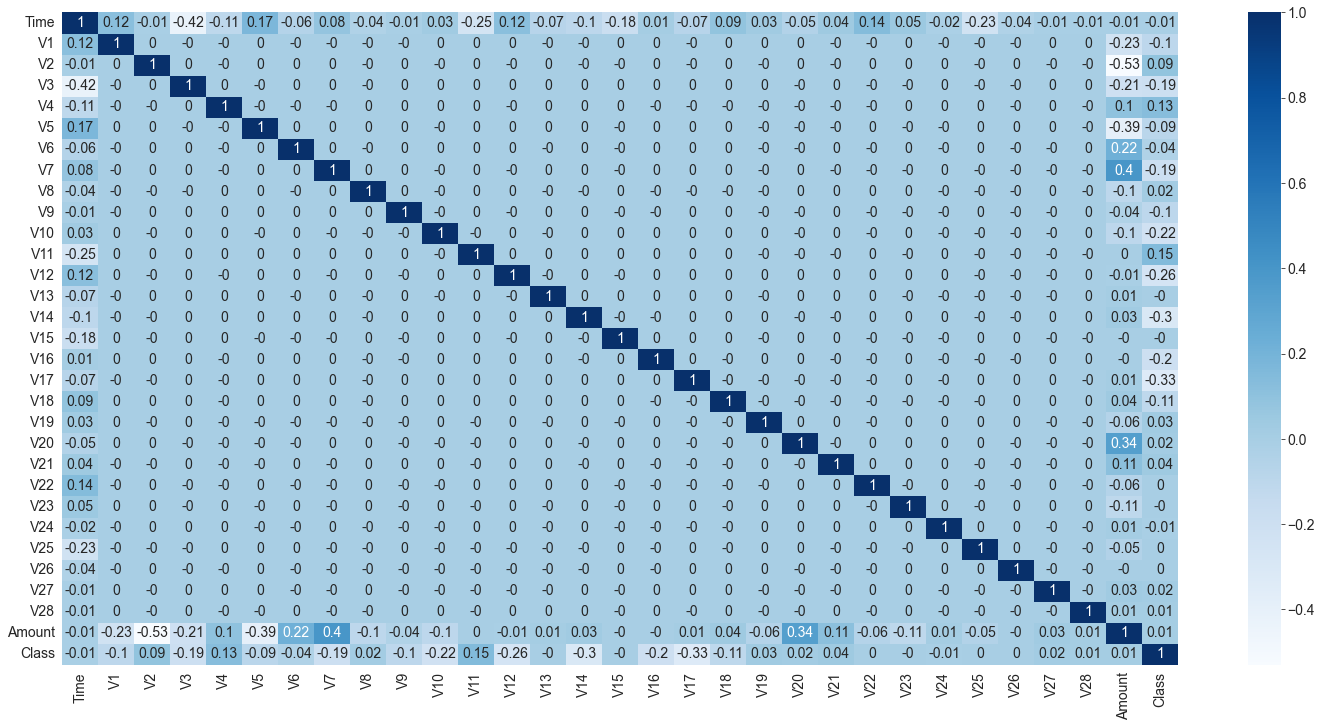

In [19]:
plt.figure(figsize=(25,12))
sns.heatmap(corr, cbar=True, annot = True, cmap= 'Blues')
plt.show()

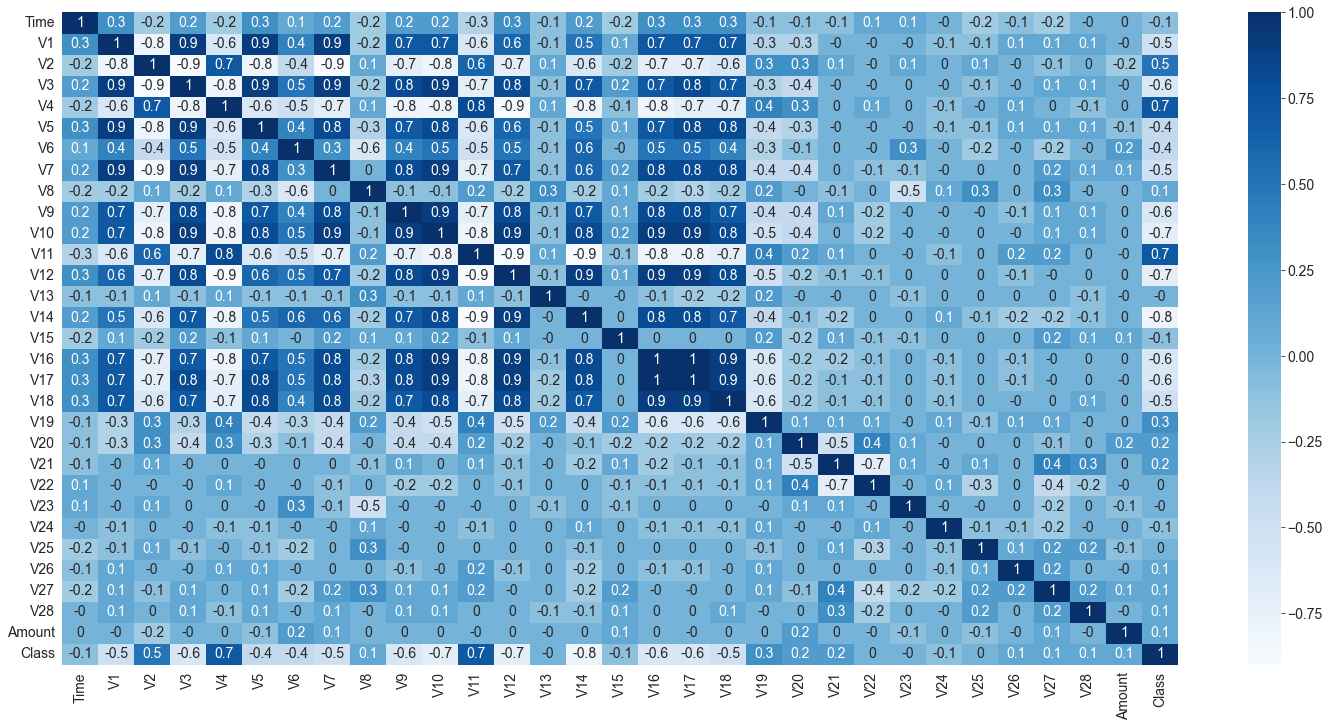

In [20]:
plt.figure(figsize=(25,12))
sns.heatmap(round(balanced_df.corr(),1), cbar=True, annot = True, cmap= 'Blues')
plt.show()

## Feature Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns=cols)
X_train.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.469044  0.977766  0.766372  0.931735  0.284087  0.763049  0.264893   
1  0.349108  0.942697  0.773365  0.942497  0.213711  0.772241  0.267886   
2  0.709639  0.924094  0.732845  0.892756  0.258549  0.784124  0.247208   
3  0.335542  0.945258  0.771304  0.924269  0.253500  0.766115  0.275289   
4  0.293827  0.944400  0.784370  0.937609  0.309810  0.763009  0.273394   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.263415  0.787373  0.578089  0.615125  0.352156  0.750174  0.431364   
1  0.271164  0.787408  0.526159  0.598823  0.304665  0.711987  0.449030   
2  0.267676  0.784753  0.591031  0.590522  0.310577  0.707173  0.367852   
3  0.265030  0.793089  0.480570  0.635667  0.252178  0.693419  0.474020   
4  0.253338  0.730759  0.496404  0.591704  0.388277  0.756621  0.398019   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.647490  0.267300  0.434720  0.725492  0.618057  0.572700  0.578612   
1  0.658022  0.331035  0.466392  0.692800  0.668587  0.536954  0.581375   
2  0.600902  0.237334  0.459797  0.737193  0.737187  0.575121  0.594936   
3  0.667353  0.388687  0.408342  0.713600  0.811067  0.594693  0.579581   
4  0.700287  0.388804  0.448152  0.732491  0.618621  0.589016  0.594108   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.561285  0.520262  0.664421  0.392718  0.605007  0.499177  0.238330   
1  0.563139  0.513447  0.660616  0.230050  0.612849  0.490060  0.237372   
2  0.567906  0.510298  0.689972  0.400575  0.482196  0.340080  0.237640   
3  0.559135  0.504347  0.665079  0.144442  0.574519  0.412282  0.245451   
4  0.514205  0.485795  0.668318  0.400913  0.621029  0.330682  0.239056   

        V28    Amount  
0  0.313052  0.000116  
1  0.313788  0.002831  
2  0.318071  0.015095  
3  0.315406  0.004108  
4  0.317467  0.001107

In [25]:
X_test = pd.DataFrame(X_test, columns=cols)
X_test.head()

Time        V1        V2        V3        V4        V5        V6  \
0  0.240202  0.677529  0.857843  0.565108  0.673305  0.672857  0.234543   
1  0.256152  0.964067  0.738308  0.917699  0.190502  0.755945  0.273234   
2  0.205357  0.982071  0.761026  0.923464  0.206273  0.762082  0.263426   
3  0.967192  0.950953  0.784646  0.888463  0.236437  0.771006  0.256679   
4  0.975005  0.992512  0.765809  0.900908  0.266438  0.764490  0.253402   

         V7        V8        V9       V10       V11       V12       V13  \
0  0.163607  0.866023  0.203354  0.263044  0.600409  0.295857  0.577687   
1  0.262161  0.787789  0.600793  0.603085  0.280072  0.741107  0.454282   
2  0.261014  0.785410  0.521722  0.636268  0.317625  0.708431  0.531573   
3  0.267043  0.791672  0.542299  0.582709  0.206295  0.712621  0.536004   
4  0.265619  0.783661  0.578125  0.623782  0.341312  0.736231  0.400636   

        V14       V15       V16       V17       V18       V19       V20  \
0  0.330871  0.358135  0.134540  0.143746  0.075668  0.805534  0.564135   
1  0.638727  0.320632  0.381204  0.725703  0.773834  0.597093  0.585653   
2  0.637789  0.344545  0.505636  0.705863  0.616613  0.656419  0.582532   
3  0.627531  0.377410  0.465188  0.736981  0.720786  0.571223  0.577661   
4  0.665980  0.285436  0.452248  0.707706  0.630333  0.594919  0.577547   

        V21       V22       V23       V24       V25       V26       V27  \
0  0.580675  0.457425  0.630407  0.472983  0.498552  0.349857  0.189765   
1  0.558039  0.466062  0.657610  0.226330  0.595376  0.303485  0.239385   
2  0.563130  0.517881  0.662959  0.273053  0.606258  0.387496  0.238672   
3  0.567266  0.550787  0.662781  0.379920  0.566265  0.399679  0.232678   
4  0.557632  0.481276  0.670588  0.390529  0.557688  0.453990  0.236517   

        V28    Amount  
0  0.291962  0.014176  
1  0.315195  0.020245  
2  0.313218  0.001207  
3  0.313163  0.000058  
4  0.311692  0.000035

## PCA

In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(0.95)
pca.fit(X_train)
pca.fit(X_test)

PCA(n_components=0.95)

In [28]:
X_train.shape, X_test.shape

((379756, 30), (186406, 30))

In [29]:
X_train.shape, X_test.shape

((379756, 30), (186406, 30))

## Feature Selection

In [30]:
# from sklearn.feature_selection import mutual_info_classif
# # determine the mutual information
# mutual_info = mutual_info_classif(X_train, y_train)
# mutual_info

In [31]:
# mutual_info = pd.Series(mutual_info)
# mutual_info.index = X_train.columns
# mutual_info.sort_values(ascending=False)

In [32]:
#let's plot the ordered mutual_info values per feature
# mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [33]:
# from sklearn.feature_selection import SelectKBest
# #No we Will select the  top 10 important features
# sel_five_cols = SelectKBest(mutual_info_classif, k=1)
# sel_five_cols.fit(X_train, y_train)
# X_train.columns[sel_five_cols.get_support()]

In [34]:
# columns = X_train.columns[sel_five_cols.get_support()]
# columns

In [35]:
# from sklearn.feature_selection import VarianceThreshold

In [36]:
# var_thres=VarianceThreshold(threshold=0)
# var_thres.fit(X_train)

In [37]:
# ### Finding non constant features
# sum(var_thres.get_support())

In [38]:
# # Lets Find non-constant features 
# len(X_train.columns[var_thres.get_support()])

In [39]:
# constant_columns = [column for column in X_train.columns
#                     if column not in X_train.columns[var_thres.get_support()]]


In [40]:
# print(len(constant_columns))

In [41]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

13

In [43]:
corr_features

{'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V2',
 'V3',
 'V4',
 'V5',
 'V7',
 'V9'}

In [44]:
X_train = X_train[corr_features]
X_train.head()

X_test = X_test[corr_features]
X_test.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6228\2374693090.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_train = X_train[corr_features]
C:\Users\Dell\AppData\Local\Temp\ipykernel_6228\2374693090.py:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_test = X_test[corr_features]


V10       V14        V9       V18        V7       V16        V2  \
0  0.263044  0.330871  0.203354  0.075668  0.163607  0.134540  0.857843   
1  0.603085  0.638727  0.600793  0.773834  0.262161  0.381204  0.738308   
2  0.636268  0.637789  0.521722  0.616613  0.261014  0.505636  0.761026   
3  0.582709  0.627531  0.542299  0.720786  0.267043  0.465188  0.784646   
4  0.623782  0.665980  0.578125  0.630333  0.265619  0.452248  0.765809   

        V11       V12       V17        V4        V5        V3  
0  0.600409  0.295857  0.143746  0.673305  0.672857  0.565108  
1  0.280072  0.741107  0.725703  0.190502  0.755945  0.917699  
2  0.317625  0.708431  0.705863  0.206273  0.762082  0.923464  
3  0.206295  0.712621  0.736981  0.236437  0.771006  0.888463  
4  0.341312  0.736231  0.707706  0.266438  0.764490  0.900908

## Model Trainning

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
model = LogisticRegression(random_state=42)

In [47]:
model.fit(X_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [48]:
model.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
model.score(X_test, y_test)

0.9757464888469255

In [50]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[92151  1052]
 [ 3469 89734]]


In [51]:

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     93203
           1       0.99      0.96      0.98     93203

    accuracy                           0.98    186406
   macro avg       0.98      0.98      0.98    186406
weighted avg       0.98      0.98      0.98    186406



In [52]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.show()

In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.98374355 0.99919244 0.99985956 0.99947333 0.99884133 0.99901689
 0.99964889 0.99877107 0.99891152 0.99873596]
Avg : 0.9976194530337393


## Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
model = RandomForestClassifier(n_jobs = -1 ,random_state=42)

In [62]:
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [63]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9722


In [64]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[93174    29]
 [ 5158 88045]]


In [65]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    189878
1    189878
dtype: int64

In [66]:

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     93203
           1       1.00      0.94      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## SVM

In [67]:
from sklearn import svm

In [68]:
model = svm.SVC(random_state=42)

In [69]:
model.fit(X_train, y_train)

SVC(random_state=42)

In [70]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9803
Test set score: 0.9848


In [71]:
print(confusion_matrix(y_test, y_pred))

[[93174    29]
 [ 5158 88045]]


In [74]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    195635
1    184121
dtype: int64

In [75]:
y_pred = model.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     93203
           1       1.00      0.97      0.98     93203

    accuracy                           0.98    186406
   macro avg       0.98      0.98      0.98    186406
weighted avg       0.98      0.98      0.98    186406



In [77]:
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.show()

## Decision Trees

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier(random_state=42, max_depth=3 )

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [81]:
from sklearn.metrics import accuracy_score

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9599
Test set score: 0.9663


In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(confusion_matrix(y_test, y_pred))

[[92750   453]
 [ 2386 90817]]


In [84]:
train_pred = model.predict(X_train)
pd.value_counts(train_pred)

0    200718
1    179038
dtype: int64

In [85]:
y_pred = model.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.94      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Adaboost

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
model = AdaBoostClassifier(random_state=42, learning_rate=0.01)
model.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.01, random_state=42)

In [88]:
model.score(X_train, y_train)

0.9460996007963007

In [89]:
model.score(X_test, y_test)

0.9542503996652468

In [90]:
score_lr=cross_val_score(AdaBoostClassifier(learning_rate=0.01), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.99824444 0.99943822 0.99964889 0.99901689 0.99908711 0.99901689
 0.999368   0.99894663 0.99870084 0.9988764 ]
Avg : 0.9990344318102468


In [91]:
print(confusion_matrix(y_test, y_pred))

[[92116  1087]
 [ 5193 88010]]


In [92]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.94      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Gradient Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [177]:
model = GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=400)

In [178]:
model.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=400, random_state=42)

In [179]:
model.score(X_train, y_train)

0.9979355164895354

In [180]:
model.score(X_test, y_test)

0.9823235303584649

In [181]:
print(confusion_matrix(y_test, y_pred))

[[92116  1087]
 [ 5193 88010]]


In [182]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.94      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



In [101]:
from sklearn.model_selection import GridSearchCV

grid = {

    'learning_rate':[0.01,0.05,0.1],

    'n_estimators':np.arange(100,500,100),

}


gb = GradientBoostingClassifier()

gb_cv = GridSearchCV(gb, grid, cv = 3)

gb_cv.fit(X_train,y_train)

print("Best Parameters:",gb_cv.best_params_)

print("Train Score:",gb_cv.best_score_)

print("Test Score:",gb_cv.score(X_test,y_test))


Best Parameters: {'learning_rate': 0.1, 'n_estimators': 400}
Train Score: 0.9970375713684199
Test Score: 0.9823235303584649


In [57]:
from xgboost import XGBClassifier

In [159]:
model = XGBClassifier(learning_rate=0.05, n_estimators=500)

In [160]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [161]:
model.score(X_train, y_train)

0.9999315349856224

In [162]:
model.score(X_test, y_test)

0.9791208437496647

In [163]:
print(confusion_matrix(y_test, y_pred))

[[92116  1087]
 [ 5193 88010]]


In [164]:
#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     93203
           1       0.99      0.94      0.97     93203

    accuracy                           0.97    186406
   macro avg       0.97      0.97      0.97    186406
weighted avg       0.97      0.97      0.97    186406



## Model Evaluation

In [100]:
score_lr=cross_val_score(AdaBoostClassifier(learning_rate=0.01), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.99824444 0.99943822 0.99964889 0.99901689 0.99908711 0.99901689
 0.999368   0.99894663 0.99870084 0.9988764 ]
Avg : 0.9990344318102468


In [59]:
score_lr=cross_val_score(GradientBoostingClassifier(random_state=42, learning_rate=0.1, n_estimators=400),X,y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.02268179 0.99884133 0.99961378 0.99852533 0.99831467 0.99859555
 0.99957867 0.99852528 0.99863062 0.99870084]
Avg : 0.9012007859862419


In [67]:
score_lr=cross_val_score(XGBClassifier(learning_rate=0.05, n_estimators = 500),X,y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.99729644 0.99884133 0.99975422 0.99950844 0.99947333 0.99880622
 0.999684   0.99954354 0.99954354 0.99933287]
Avg : 0.9991783940870892


In [62]:
score_lr=cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.98374355 0.99919244 0.99985956 0.99947333 0.99884133 0.99901689
 0.99964889 0.99877107 0.99891152 0.99873596]
Avg : 0.9976194530337393


In [64]:
score_lr=cross_val_score(RandomForestClassifier(n_jobs = -1), X, y,cv=10)
print(score_lr)
print("Avg :",score_lr.mean())

[0.02942312 0.99894667 0.99989467 0.99950844 0.99943822 0.99901689
 0.99975422 0.99954354 0.99954354 0.99933287]
Avg : 0.9024402177590108
